# Telco Customer Churn
## "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
pd.set_option('display.max_columns', None)
tcc_df = pd.read_csv('Telco_CustomerChurn_Kaggle.csv')
tcc_df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 21 columns]

### There are 21 columns (features) and 7043 rows (customers) in the dataset.
### The churn column is our target.
## Feature Description:
1. **customerID** : Customer ID (general form is dddd-XXXXX ; d:digit, X:Capital Letter.)
2. **gender** : Whether the customer is a male or a female.
3. **SeniorCitizen** : Whether the customer is a senior citizen or not (1: Yes, 0: No)
4. **Partner** : Whether the customer has a partner or not (Yes/No)
5. **Dependents** : Whether the customer has dependents or not (Yes/No)
6. **tenure** : Number of months the customer has stayed with the company
7. **PhoneService** : Whether the customer has a phone service or not (Yes/No)
8. **MultipleLines** : Whether the customer has multiple lines or not (Yes/No/No Phone Service)
9. **InternetService** : Customer's Internet Service provider (DSL, No, Fiber optic)
10. **OnlineSecurity** : Whether the customer has online service or not (Yes/No/No internet service)
11. **OnlineBackup** : Whether the customer has online backup or not (Yes/No/No interet service)
12. **DeviceProtection** : Whether the customer has device protection or not (Yes/No/No internet service)
13. **TechSupport** : Whether the customer has tech support or not (Yes/No/No internet service)
14. **StreamingTV** : Whether the customer has streaming TV or not (Yes/No/No internet service)
15. **StreamingMovies** : Whether the customer has streaming movies or not (Yes/No/No internet service)
16. **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
17. **PaperlessBilling** : Whether the customer has paperless billing or not (Yes/No)
18. **PaymentMethod** : the customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. **MonthlyCharges** : The amount charged to the customer monthly
20. **TotalCharges** : The total amount charged to the customer
21. **Churn** : Whether the customer churned or not (Yes/No). Customer churn is when a customer stops using a business' products/services, also called customer attrition. (Yes: customer stopped using services, No: customer still uses services)

In [110]:
tcc_df.info()
#Insight: No null values in columns
#datatypes - 2 columns are integer, one float, 18 object 
#TotalCharges should also be converted to float datatype
#SeniorCitizen to yes/no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
tcc_df['SeniorCitizen'] = tcc_df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
tcc_df

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male            No     Yes        Yes      24   
7039  2234-XADUH  Female            No     Yes        Yes      72   
7040  4801-JZAZL  Female            No     Yes        Yes      11   
7041  8361-LTMKD    Male           Yes     Yes         No       4   
7042  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  
0              29.85         29.85    No  
1              56.95       1889.50    No  
2              53.85        108.15   Yes  
3              42.30       1840.75    No  
4              70.70        151.65   Yes  
...              ...           ...   ...  
7038           84.80       1990.50    No  
7039          103.20       7362.90    No  
7040           29.60        346.45    No  
7041           74.40        306.60   Yes  
7042          105.65       6844.50    No  

[7043 rows x 21 columns]

In [115]:
tcc_df.describe()
#for monthly charges, mean and median are close therefore box plot must not be very skewed (there should not be outliers)

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [116]:
tcc_df.describe(include = 'all')

customerID gender SeniorCitizen Partner Dependents       tenure  \
count         7043   7043          7043    7043       7043  7043.000000   
unique        7043      2             2       2          2          NaN   
top     7590-VHVEG   Male            No      No         No          NaN   
freq             1   3555          5901    3641       4933          NaN   
mean           NaN    NaN           NaN     NaN        NaN    32.371149   
std            NaN    NaN           NaN     NaN        NaN    24.559481   
min            NaN    NaN           NaN     NaN        NaN     0.000000   
25%            NaN    NaN           NaN     NaN        NaN     9.000000   
50%            NaN    NaN           NaN     NaN        NaN    29.000000   
75%            NaN    NaN           NaN     NaN        NaN    55.000000   
max            NaN    NaN           NaN     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
count          7043          7043            7043           7043         7043   
unique            2             3               3              3            3   
top             Yes            No     Fiber optic             No           No   
freq           6361          3390            3096           3498         3088   
mean            NaN           NaN             NaN            NaN          NaN   
std             NaN           NaN             NaN            NaN          NaN   
min             NaN           NaN             NaN            NaN          NaN   
25%             NaN           NaN             NaN            NaN          NaN   
50%             NaN           NaN             NaN            NaN          NaN   
75%             NaN           NaN             NaN            NaN          NaN   
max             NaN           NaN             NaN            NaN          NaN   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7043             7043              7043     7043.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              3875             4171              2365             NaN   
mean               NaN              NaN               NaN       64.761692   
std                NaN              NaN               NaN       30.090047   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.500000   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.850000   
max                NaN              NaN               NaN      118.750000   

        TotalCharges Churn  
count    7043.000000  7043  
unique           NaN     2  
top              NaN    No  
freq             NaN  5174  
mean     2279.734304   NaN  
std      2266.794470   NaN  
min         0.000000   NaN  
25%       398.550000   NaN  
50%      1394.550000   NaN  
75%      3786.600000   NaN  
max      8684.800000   NaN

In [6]:
tcc_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [117]:
for col in tcc_df.columns:
    print(f'The unique values present in {col} feature are: \n', tcc_df[col].unique())
    print(f'The number of unique values present in {col} feature are: \n', len(tcc_df[col].unique()))
    print('----------------------------------------------------------------')

The unique values present in customerID feature are: 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
The number of unique values present in customerID feature are: 
 7043
----------------------------------------------------------------
The unique values present in gender feature are: 
 ['Female' 'Male']
The number of unique values present in gender feature are: 
 2
----------------------------------------------------------------
The unique values present in SeniorCitizen feature are: 
 ['No' 'Yes']
The number of unique values present in SeniorCitizen feature are: 
 2
----------------------------------------------------------------
The unique values present in Partner feature are: 
 ['Yes' 'No']
The number of unique values present in Partner feature are: 
 2
----------------------------------------------------------------
The unique values present in Dependents feature are: 
 ['No' 'Yes']
The number of unique values present in Dependents feature ar

In [8]:
tcc_df.duplicated().sum()
#no duplicate data present

0

In [9]:
tcc_df.isnull().sum()
#no Nan values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
for col in tcc_df.columns:
    print(f'The value counts for each value in {col} feature are: \n', tcc_df[col].value_counts())
    print('----------------------------------------------------------------')

The value counts for each value in customerID feature are: 
 customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
----------------------------------------------------------------
The value counts for each value in gender feature are: 
 gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------------------------------
The value counts for each value in SeniorCitizen feature are: 
 SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
----------------------------------------------------------------
The value counts for each value in Partner feature are: 
 Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------------------------------
The value counts for each value in Dependents feature are: 
 Dependents
No     4933
Yes    2

In [11]:
tcc_df[tcc_df['TotalCharges'] == ' ']

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

In [12]:
tcc_df[tcc_df['tenure'] == 0]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

In [13]:
tcc_df[tcc_df['tenure'] == 1]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
20    8779-QRDMV    Male              1      No         No       1   
22    1066-JKSGK    Male              0      No         No       1   
27    8665-UTDHZ    Male              0     Yes        Yes       1   
33    7310-EGVHZ    Male              0      No         No       1   
...          ...     ...            ...     ...        ...     ...   
6979  5351-QESIO    Male              0      No        Yes       1   
7010  0723-DRCLG  Female              1     Yes         No       1   
7016  1471-GIQKQ  Female              0      No         No       1   
7018  1122-JWTJW    Male              0     Yes        Yes       1   
7032  6894-LFHLY    Male              1      No         No       1   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
0              No  No phone service             DSL                   No   
20             No  No phone service             DSL                   No   
22            Yes                No              No  No internet service   
27             No  No phone service             DSL                   No   
33            Yes                No              No  No internet service   
...           ...               ...             ...                  ...   
6979           No  No phone service             DSL                   No   
7010          Yes               Yes     Fiber optic                   No   
7016          Yes                No             DSL                   No   
7018          Yes                No     Fiber optic                   No   
7032          Yes               Yes     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
20                     No                  Yes                   No   
22    No internet service  No internet service  No internet service   
27                    Yes                   No                   No   
33    No internet service  No internet service  No internet service   
...                   ...                  ...                  ...   
6979                   No                   No                   No   
7010                   No                   No                   No   
7016                  Yes                   No                   No   
7018                   No                   No                   No   
7032                   No                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
0                      No                   No  Month-to-month   
20                     No                  Yes  Month-to-month   
22    No internet service  No internet service  Month-to-month   
27                     No                   No  Month-to-month   
33    No internet service  No internet service  Month-to-month   
...                   ...                  ...             ...   
6979                   No                   No  Month-to-month   
7010                   No                   No  Month-to-month   
7016                   No                   No  Month-to-month   
7018                   No                   No  Month-to-month   
7032                   No                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
20                Yes           Electronic check           39.65        39.65   
22                 No               Mailed check           20.15        20.15   
27                 No           Electronic check           30.20         30.2   
33                 No  Bank transfer (automatic)           20.20         20.2   
...               ...                        ...             ...          ...   
6979               No               Mai

### Observation: as the tenure of these customers is 0, it means they are new customers of this month, therefore their TotalCharges is missing. The target variable Churn is also No for all of them which supports our argument.

In [14]:
tcc_df[tcc_df['TotalCharges'] == '0']

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [15]:
tcc_df['TotalCharges'] = tcc_df['TotalCharges'].replace(' ', '0')
tcc_df[tcc_df['TotalCharges'] == ' ']

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [16]:
tcc_df.iloc[3330:3333]

customerID gender  SeniorCitizen Partner Dependents  tenure  \
3330  8276-MQBYC   Male              1      No         No      51   
3331  7644-OMVMY   Male              0     Yes        Yes       0   
3332  7593-XFKDI   Male              0      No         No       1   

     PhoneService MultipleLines InternetService       OnlineSecurity  \
3330          Yes           Yes     Fiber optic                   No   
3331          Yes            No              No  No internet service   
3332          Yes            No             DSL                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
3330                   No                  Yes                   No   
3331  No internet service  No internet service  No internet service   
3332                   No                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
3330                  Yes                  Yes  Month-to-month   
3331  No internet service  No internet service        Two year   
3332                   No                   No  Month-to-month   

     PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
3330              Yes  Electronic check           97.80       4913.3   Yes  
3331               No      Mailed check           19.85            0    No  
3332               No      Mailed check           46.30         46.3   Yes

### Handling Missing data: As we can see for the customers with tenure 1, the TotalCharges is equal to the MonthlyCharges which means that the amount is added to the TotalCharges only after the month is over, therefore we assign the value 0 to TotalCharges for the new customers this month, since it will also be a good way to help us recognize them. Also now we can convert the column to float datatype.

In [17]:
tcc_df['TotalCharges'] = tcc_df['TotalCharges'].astype(float)

In [118]:
tcc_df.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [119]:
tcc_df.corr(numeric_only = True)

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000

### Insights: 
- No significant correlation observed between **tenure and MonthlyCharges**.
- **TotalCharges and tenure** are strongly and positively correlated. **As tenure increases, the Total amount the customer has been charged increases, which explains that total charges is probably the total amount the customer has been charged since they have been a customer to the company up until now.** 
- One of the above two columns can be dropped.
- **MonthlyCharges and TotalCharges** have positive intermediate correlation.

In [120]:
tcc_df.sample(3)

customerID  gender SeniorCitizen Partner Dependents  tenure  \
1583  2720-FVBQP  Female            No     Yes        Yes       6   
963   4849-PYRLQ  Female           Yes      No         No      56   
3459  6609-MXJHJ  Female            No     Yes        Yes      30   

     PhoneService MultipleLines InternetService       OnlineSecurity  \
1583          Yes           Yes             DSL                   No   
963           Yes           Yes             DSL                  Yes   
3459          Yes           Yes              No  No internet service   

             OnlineBackup     DeviceProtection          TechSupport  \
1583                   No                   No                   No   
963                    No                  Yes                  Yes   
3459  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies        Contract  \
1583                   No                   No  Month-to-month   
963                    No                  Yes        Two year   
3459  No internet service  No internet service        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
1583              Yes    Credit card (automatic)           48.95   
963                No  Bank transfer (automatic)           73.25   
3459              Yes               Mailed check           25.10   

      TotalCharges Churn  
1583        273.25    No  
963        4054.20    No  
3459        789.55    No

# Target Distribution

1869 of 7043 customers churned and 5174 of 7043 customers did not churn.
The percentage of customers that churned is 26.54% and the percentage of customers that did not churn is 73.46%.


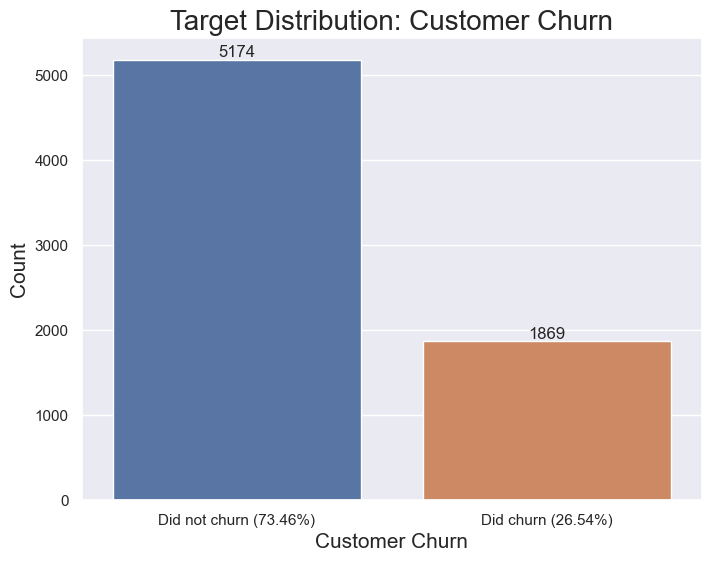

In [21]:
cust_churnNo = tcc_df['Churn'].value_counts()[0]
cust_churnYes = tcc_df['Churn'].value_counts()[1]
churnNo_per = cust_churnNo / tcc_df.shape[0] * 100
churnYes_per = cust_churnYes / tcc_df.shape[0] * 100

print('{} of {} customers churned and {} of {} customers did not churn.'.format(cust_churnYes, tcc_df.shape[0], cust_churnNo, tcc_df.shape[0]))
print('The percentage of customers that churned is {:.2f}% and the percentage of customers that did not churn is {:.2f}%.'.format(churnYes_per, churnNo_per))

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['Churn'])
plt.xticks(range(2), ['Did not churn ({:.2f}%)'.format(churnNo_per), 'Did churn ({:.2f}%)'.format(churnYes_per)])
plt.xlabel('Customer Churn', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Target Distribution: Customer Churn', fontsize = 20)
ax.bar_label(ax.containers[0]);

## Insights:
- **1869 of 7043** customers churned and **5174 of 7043** customers did not churn.
- The percentage of customers that **churned is 26.54%** and the percentage of customers that **did not churn is 73.46%.**

## Univariate Analysis
### Categorical Features

[Text(0, 0, '3488'), Text(0, 0, '3555')]

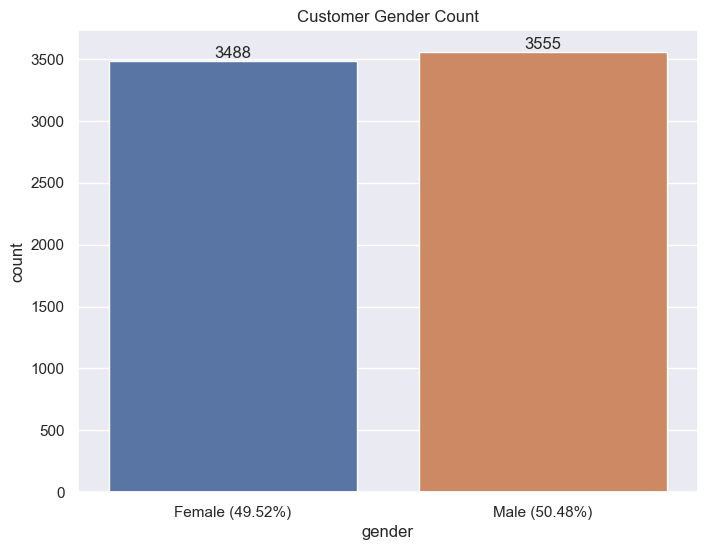

In [22]:
female_per = tcc_df['gender'].value_counts()[1] / tcc_df.shape[0] * 100
male_per = tcc_df['gender'].value_counts()[0] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['gender'])
plt.xticks(range(2), ['Female ({:.2f}%)'.format(female_per), 'Male ({:.2f}%)'.format(male_per)])
plt.title('Customer Gender Count')
ax.bar_label(ax.containers[0])

[Text(0, 0, '5901'), Text(0, 0, '1142')]

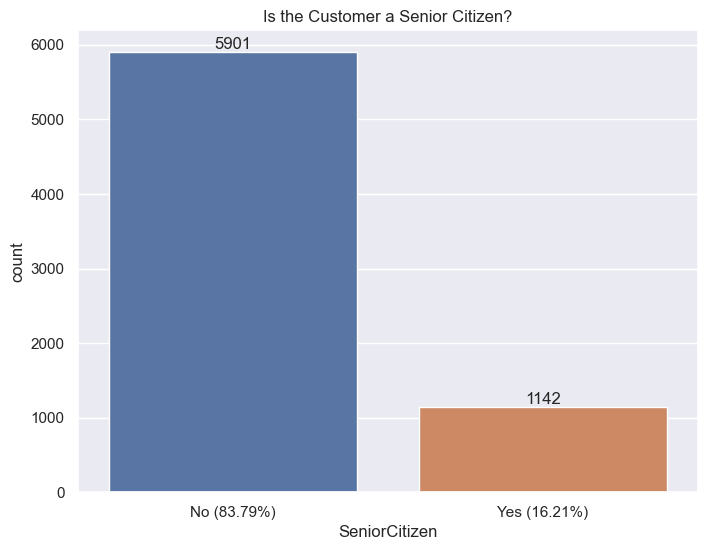

In [121]:
scNo_per = tcc_df['SeniorCitizen'].value_counts()[0] / tcc_df.shape[0] * 100
scYes_per = tcc_df['SeniorCitizen'].value_counts()[1] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['SeniorCitizen'])
plt.title('Is the Customer a Senior Citizen?')
plt.xticks(range(2), ['No ({:.2f}%)'.format(scNo_per), 'Yes ({:.2f}%)'.format(scYes_per)])
ax.bar_label(ax.containers[0])

[Text(0, 0, '3402'), Text(0, 0, '3641')]

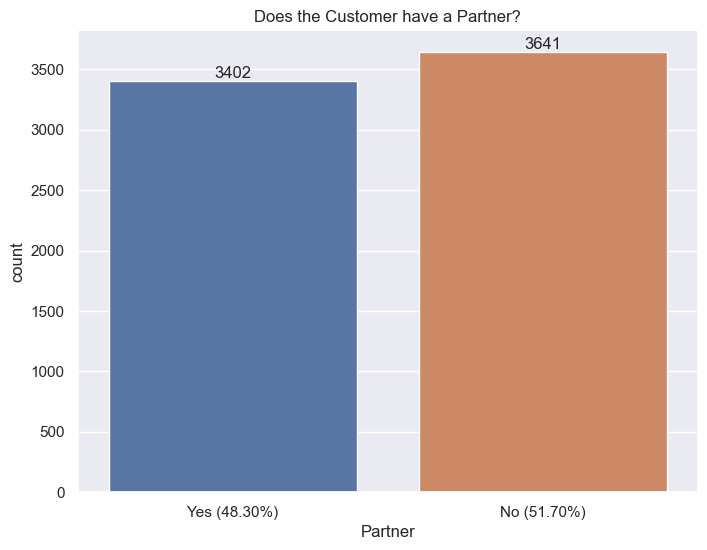

In [24]:
ptNo_per = tcc_df['Partner'].value_counts()[0] / tcc_df.shape[0] * 100
ptYes_per = tcc_df['Partner'].value_counts()[1] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['Partner'])
plt.xticks(range(2), ['Yes ({:.2f}%)'.format(ptYes_per), 'No ({:.2f}%)'.format(ptNo_per)])
plt.title('Does the Customer have a Partner?')
ax.bar_label(ax.containers[0])

[Text(0, 0, '4933'), Text(0, 0, '2110')]

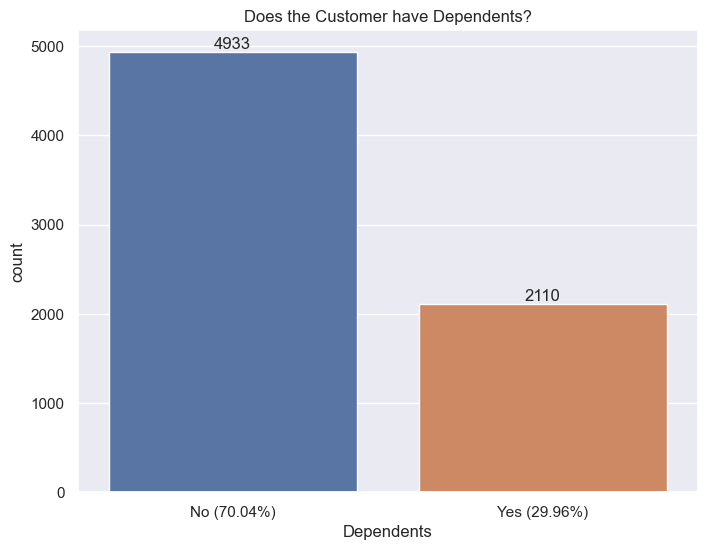

In [25]:
depNo_per = tcc_df['Dependents'].value_counts()[0] / tcc_df.shape[0] * 100
depYes_per = tcc_df['Dependents'].value_counts()[1] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['Dependents'])
plt.xticks(range(2), ['No ({:.2f}%)'.format(depNo_per), 'Yes ({:.2f}%)'.format(depYes_per)])
plt.title('Does the Customer have Dependents?')
ax.bar_label(ax.containers[0])

[Text(0, 0, '682'), Text(0, 0, '6361')]

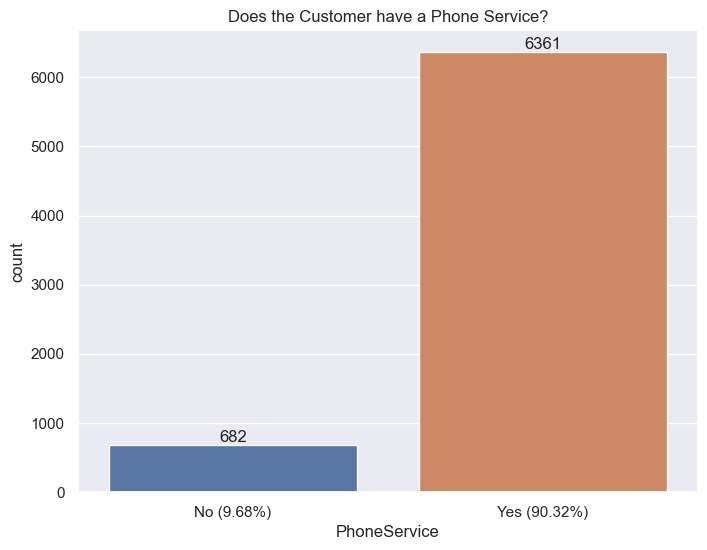

In [26]:
psNo_per = tcc_df['PhoneService'].value_counts()[1] / tcc_df.shape[0] * 100
psYes_per = tcc_df['PhoneService'].value_counts()[0] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['PhoneService'])
plt.xticks(range(2), ['No ({:.2f}%)'.format(psNo_per), 'Yes ({:.2f}%)'.format(psYes_per)])
plt.title('Does the Customer have a Phone Service?')
ax.bar_label(ax.containers[0])

[Text(0, 0, '682'), Text(0, 0, '3390'), Text(0, 0, '2971')]

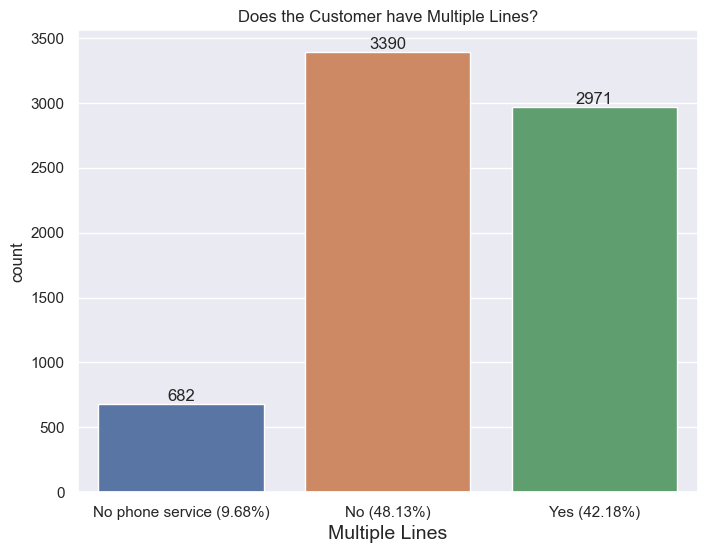

In [27]:
mlNo_per = tcc_df['MultipleLines'].value_counts()[0] / tcc_df.shape[0] * 100
mlYes_per = tcc_df['MultipleLines'].value_counts()[1] / tcc_df.shape[0] * 100
mlNps_per = tcc_df['MultipleLines'].value_counts()[2] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['MultipleLines'])
plt.xticks(range(3), ['No phone service ({:.2f}%)'.format(mlNps_per), 'No ({:.2f}%)'.format(mlNo_per), 'Yes ({:.2f}%)'.format(mlYes_per)])
plt.title('Does the Customer have Multiple Lines?')
plt.xlabel('Multiple Lines', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '2421'), Text(0, 0, '3096'), Text(0, 0, '1526')]

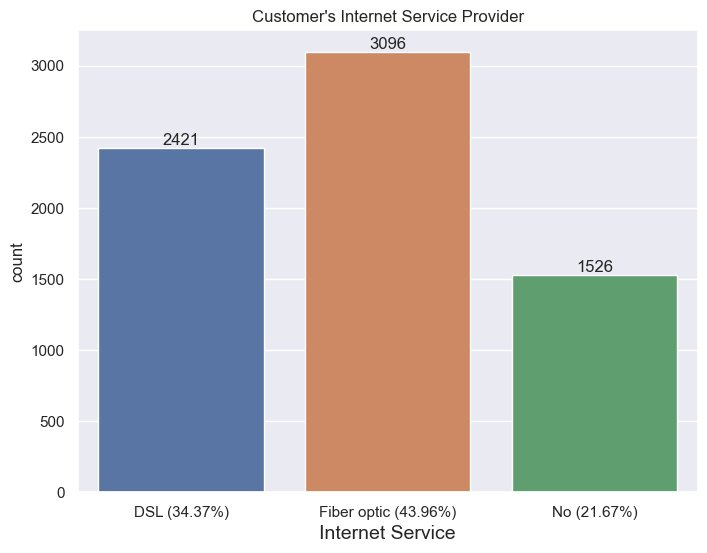

In [28]:
isFO_per = tcc_df['InternetService'].value_counts()[0] / tcc_df.shape[0] * 100
isDSL_per = tcc_df['InternetService'].value_counts()[1] / tcc_df.shape[0] * 100
isNo_per = tcc_df['InternetService'].value_counts()[2] / tcc_df.shape[0] * 100


plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['InternetService'])
plt.xticks(range(3), ['DSL ({:.2f}%)'.format(isDSL_per), 'Fiber optic ({:.2f}%)'.format(isFO_per), 'No ({:.2f}%)'.format(isNo_per)])
plt.title("Customer's Internet Service Provider")
plt.xlabel('Internet Service', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '3498'), Text(0, 0, '2019'), Text(0, 0, '1526')]

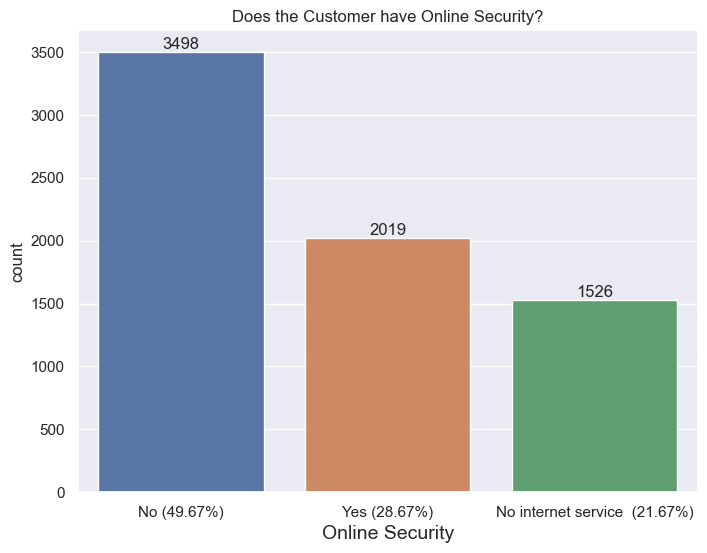

In [29]:
osNo_per = tcc_df['OnlineSecurity'].value_counts()[0] / tcc_df.shape[0] * 100
osYes_per = tcc_df['OnlineSecurity'].value_counts()[1] / tcc_df.shape[0] * 100
osNis_per = tcc_df['OnlineSecurity'].value_counts()[2] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['OnlineSecurity'])
plt.xticks(range(3), ['No ({:.2f}%)'.format(osNo_per), 'Yes ({:.2f}%)'.format(osYes_per), 'No internet service  ({:.2f}%)'.format(osNis_per)])
plt.title("Does the Customer have Online Security?")
plt.xlabel('Online Security', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '2429'), Text(0, 0, '3088'), Text(0, 0, '1526')]

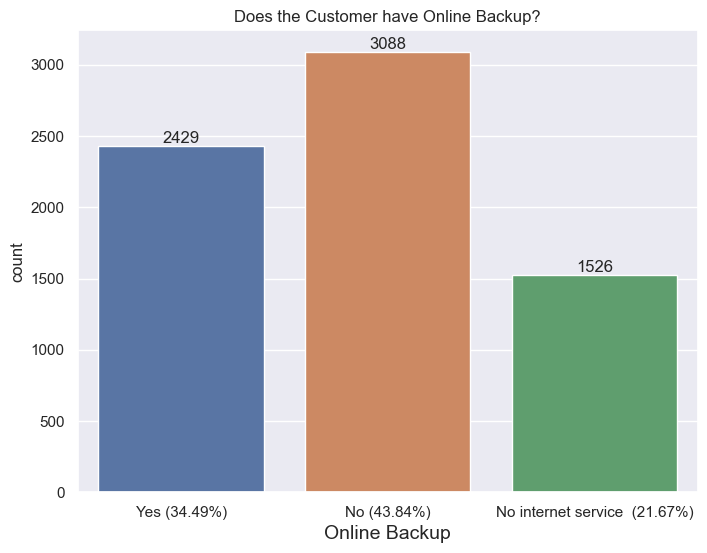

In [30]:
obNo_per = tcc_df['OnlineBackup'].value_counts()[0] / tcc_df.shape[0] * 100
obYes_per = tcc_df['OnlineBackup'].value_counts()[1] / tcc_df.shape[0] * 100
obNis_per = tcc_df['OnlineBackup'].value_counts()[2] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['OnlineBackup'])
plt.xticks(range(3), ['Yes ({:.2f}%)'.format(obYes_per), 'No ({:.2f}%)'.format(obNo_per), 'No internet service  ({:.2f}%)'.format(obNis_per)])
plt.title("Does the Customer have Online Backup?")
plt.xlabel('Online Backup', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '3095'), Text(0, 0, '2422'), Text(0, 0, '1526')]

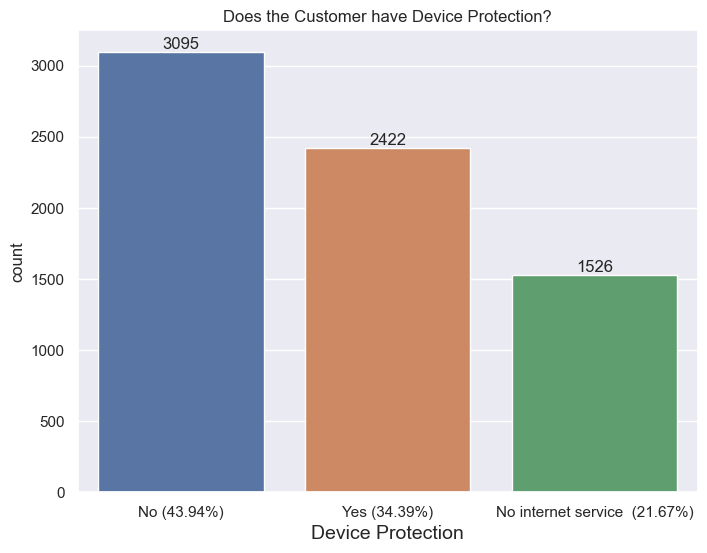

In [31]:
dpNo_per = tcc_df['DeviceProtection'].value_counts()[0] / tcc_df.shape[0] * 100
dpYes_per = tcc_df['DeviceProtection'].value_counts()[1] / tcc_df.shape[0] * 100
dpNis_per = tcc_df['DeviceProtection'].value_counts()[2] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['DeviceProtection'])
plt.xticks(range(3), ['No ({:.2f}%)'.format(dpNo_per), 'Yes ({:.2f}%)'.format(dpYes_per), 'No internet service  ({:.2f}%)'.format(dpNis_per)])
plt.title("Does the Customer have Device Protection?")
plt.xlabel('Device Protection', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '3473'), Text(0, 0, '2044'), Text(0, 0, '1526')]

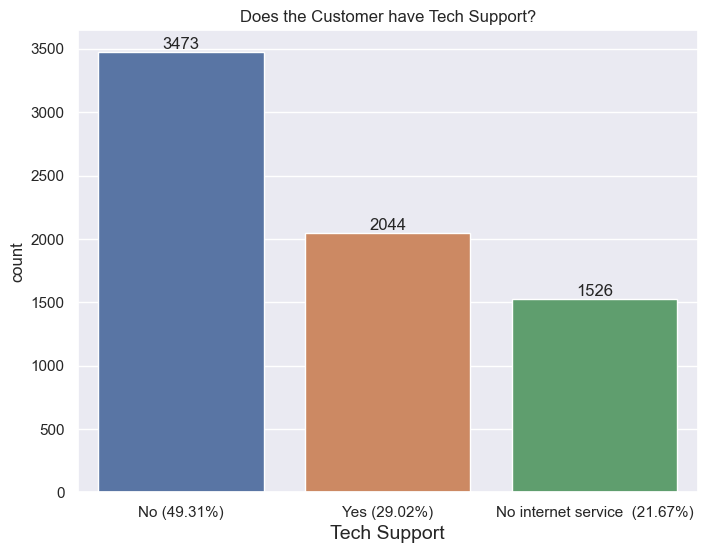

In [32]:
tsNo_per = tcc_df['TechSupport'].value_counts()[0] / tcc_df.shape[0] * 100
tsYes_per = tcc_df['TechSupport'].value_counts()[1] / tcc_df.shape[0] * 100
tsNis_per = tcc_df['TechSupport'].value_counts()[2] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['TechSupport'])
plt.xticks(range(3), ['No ({:.2f}%)'.format(tsNo_per), 'Yes ({:.2f}%)'.format(tsYes_per), 'No internet service  ({:.2f}%)'.format(tsNis_per)])
plt.title("Does the Customer have Tech Support?")
plt.xlabel('Tech Support', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '2810'), Text(0, 0, '2707'), Text(0, 0, '1526')]

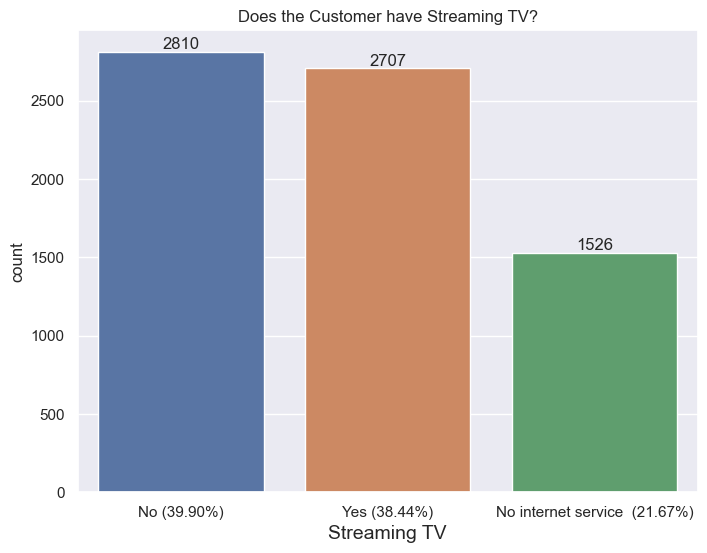

In [33]:
stNo_per = tcc_df['StreamingTV'].value_counts()[0] / tcc_df.shape[0] * 100
stYes_per = tcc_df['StreamingTV'].value_counts()[1] / tcc_df.shape[0] * 100
stNis_per = tcc_df['StreamingTV'].value_counts()[2] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['StreamingTV'])
plt.xticks(range(3), ['No ({:.2f}%)'.format(stNo_per), 'Yes ({:.2f}%)'.format(stYes_per), 'No internet service  ({:.2f}%)'.format(stNis_per)])
plt.title("Does the Customer have Streaming TV?")
plt.xlabel('Streaming TV', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '2785'), Text(0, 0, '2732'), Text(0, 0, '1526')]

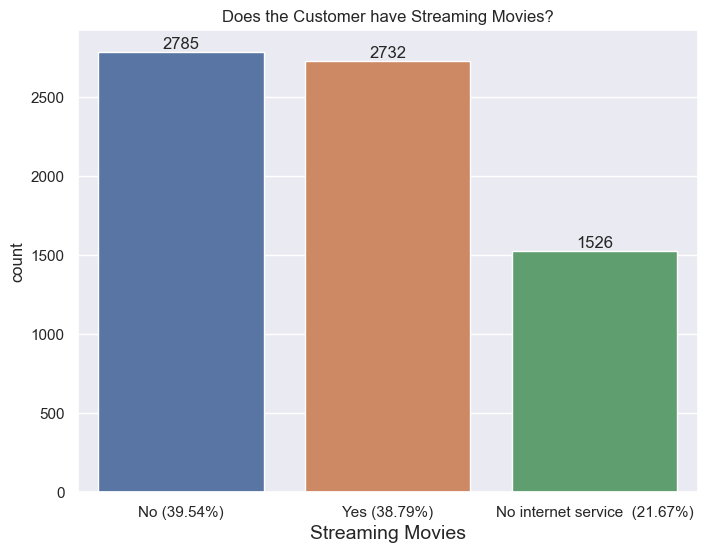

In [34]:
stmNo_per = tcc_df['StreamingMovies'].value_counts()[0] / tcc_df.shape[0] * 100
stmYes_per = tcc_df['StreamingMovies'].value_counts()[1] / tcc_df.shape[0] * 100
stmNis_per = tcc_df['StreamingMovies'].value_counts()[2] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['StreamingMovies'])
plt.xticks(range(3), ['No ({:.2f}%)'.format(stmNo_per), 'Yes ({:.2f}%)'.format(stmYes_per), 'No internet service  ({:.2f}%)'.format(stmNis_per)])
plt.title("Does the Customer have Streaming Movies?")
plt.xlabel('Streaming Movies', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '3875'), Text(0, 0, '1473'), Text(0, 0, '1695')]

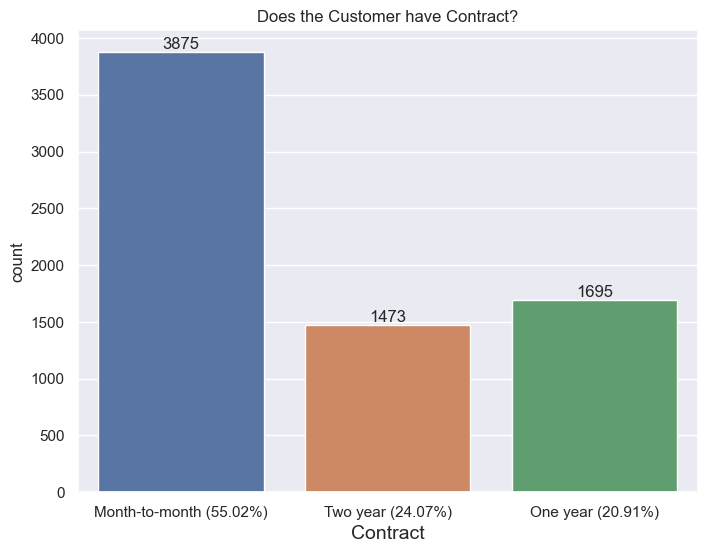

In [35]:
ctm2m_per = tcc_df['Contract'].value_counts()[0] / tcc_df.shape[0] * 100
ct2y_per = tcc_df['Contract'].value_counts()[1] / tcc_df.shape[0] * 100
ct1y_per = tcc_df['Contract'].value_counts()[2] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['Contract'])
plt.xticks(range(3), ['Month-to-month ({:.2f}%)'.format(ctm2m_per), 'Two year ({:.2f}%)'.format(ct2y_per), 'One year ({:.2f}%)'.format(ct1y_per)])
plt.title("Does the Customer have Contract?")
plt.xlabel('Contract', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '4171'), Text(0, 0, '2872')]

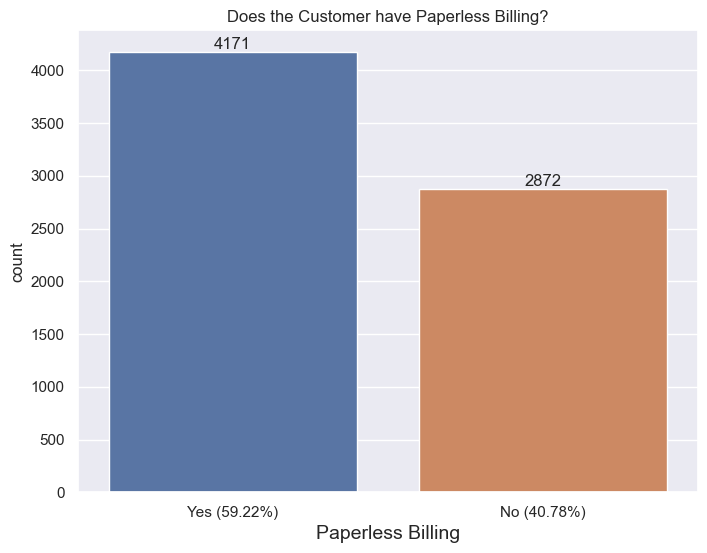

In [36]:
pbYes_per = tcc_df['PaperlessBilling'].value_counts()[0] / tcc_df.shape[0] * 100
pbNo_per = tcc_df['PaperlessBilling'].value_counts()[1] / tcc_df.shape[0] * 100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= tcc_df['PaperlessBilling'])
plt.xticks(range(2), ['Yes ({:.2f}%)'.format(pbYes_per), 'No ({:.2f}%)'.format(pbNo_per)])
plt.title('Does the Customer have Paperless Billing?')
plt.xlabel('Paperless Billing', fontsize = 14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '2365'),
 Text(0, 0, '1612'),
 Text(0, 0, '1544'),
 Text(0, 0, '1522')]

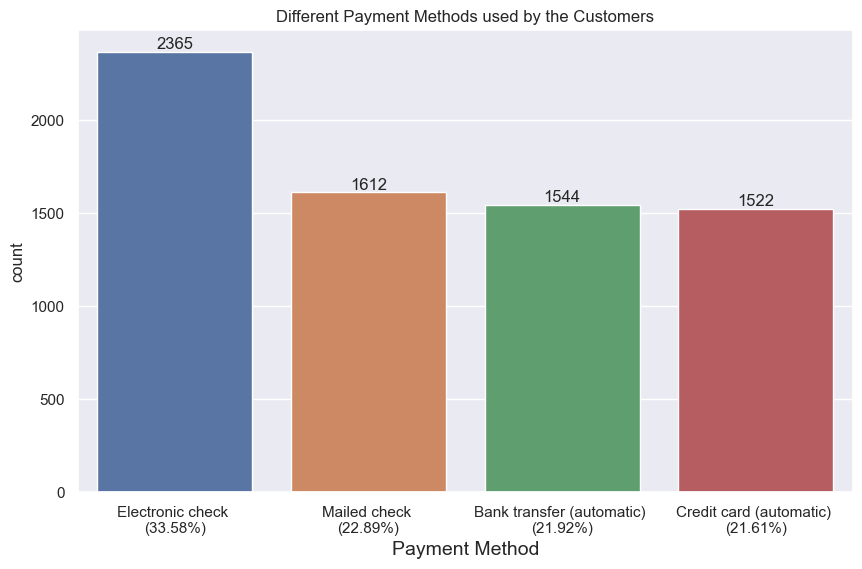

In [37]:
pmEC_per = tcc_df['PaymentMethod'].value_counts()[0] / tcc_df.shape[0] * 100
pmMC_per = tcc_df['PaymentMethod'].value_counts()[1] / tcc_df.shape[0] * 100
pmBT_per = tcc_df['PaymentMethod'].value_counts()[2] / tcc_df.shape[0] * 100
pmCC_per = tcc_df['PaymentMethod'].value_counts()[3] / tcc_df.shape[0] * 100

plt.figure(figsize = (10,6))
ax = sns.countplot(x= tcc_df['PaymentMethod'])
plt.xticks(range(4), ['Electronic check \n({:.2f}%)'.format(pmEC_per), 'Mailed check \n({:.2f}%)'.format(pmMC_per), 'Bank transfer (automatic) \n({:.2f}%)'.format(pmBT_per), 'Credit card (automatic) \n({:.2f}%)'.format(pmCC_per)])
plt.title("Different Payment Methods used by the Customers")
plt.xlabel('Payment Method', fontsize = 14)
ax.bar_label(ax.containers[0])

In [38]:
#tcc_df['PaymentMethod'].value_counts()

## Insights:
- Male to Female (or **Gender**) ratio of customers do not vary by much.
- More than 80% of the customers are not **Senior Citizens**.
- Customer with partner to customer without **partner** ratio does not vary by much.
- Approximately 70% of the Customers do not have **dependents**.
- Over 90% of the customers have a **Phone service**.
- More than 53% of customers who have a Phone service have multiple lines. Over 48% of total customers have **Multiple lines**.
- Almost 44% of customers use Fiber optic, 34% use DSL and 22% do not have **Internet Service**.
- Approximately 50% of customers do not have **Online Security** and 29% does. 
- Approximately 44% of customers do not have **Online Backup** and 34.50% does.
- Approximately 44% of customers do not have **Device Protection** and 34.40% does.
- Approximately 49% of customers do not have  **Tech Support** and 29% does.
- Approximately 40% of customers do not have  **Streaming TV** and 38% does.
- Approximately 40% of customers do not have  **Streaming Movies** and 39% does.
- Approximately 55% of customers have a Month-to-month contract, 24% have a Two year contract and 21% have a One year **contract**.
- Approximately 41% of customers do not have **Paperless Billing** and 59% does.
- Approximately 34% of customers use Electronic check, 23% use Mailed check, 22% use Bank transfer (automatic) and 22% use Credit card (automatic) as **Payment Method**.


### Continuous Features

Text(0, 0.5, 'Count of Customers')

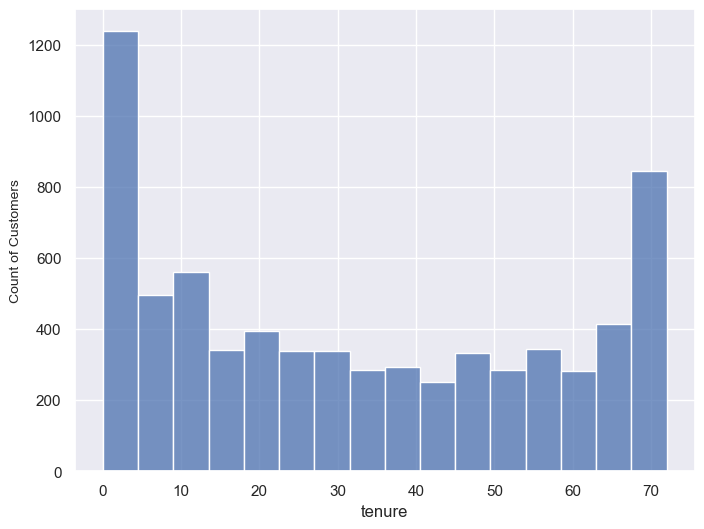

In [39]:
plt.figure(figsize = (8,6))
sns.histplot(tcc_df['tenure'])
plt.ylabel('Count of Customers', fontsize = 10)

<Axes: xlabel='tenure'>

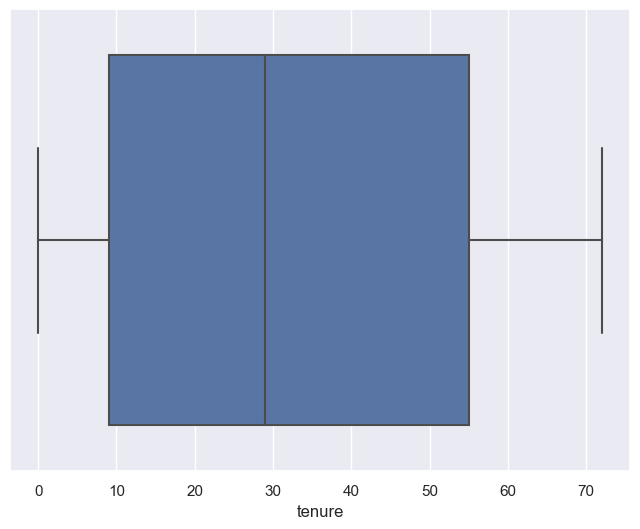

In [75]:
plt.figure(figsize = (8,6))
sns.boxplot(x = tcc_df['tenure'])

Text(0, 0.5, 'Count of Customers')

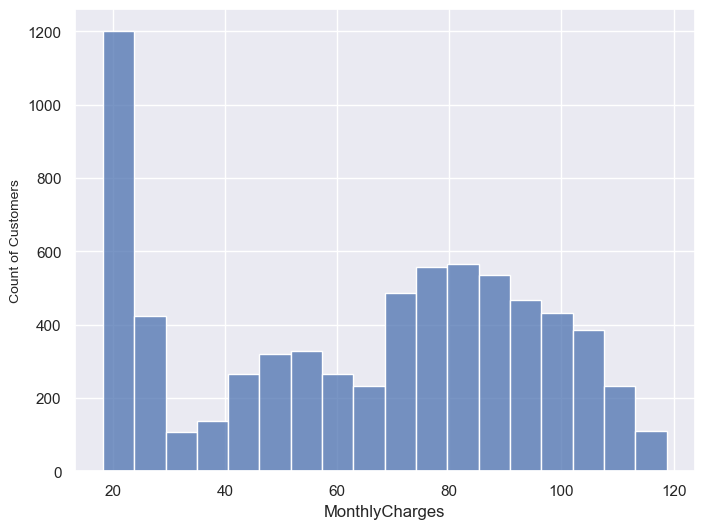

In [41]:
plt.figure(figsize = (8,6))
sns.histplot(tcc_df['MonthlyCharges'])
plt.ylabel('Count of Customers', fontsize = 10)

<Axes: xlabel='MonthlyCharges'>

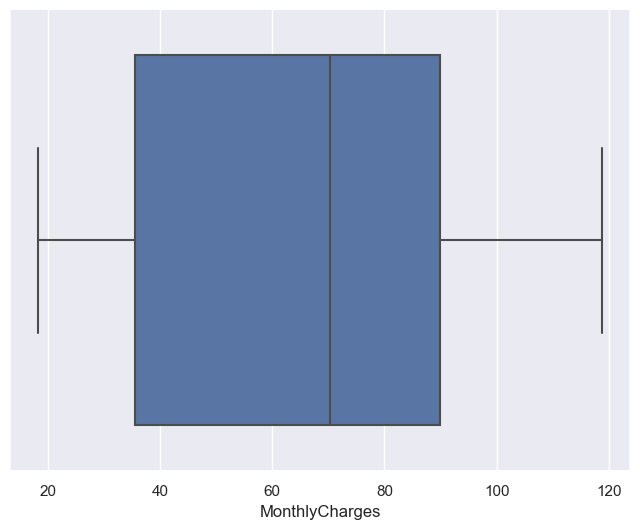

In [42]:
plt.figure(figsize = (8,6))
sns.boxplot(x = tcc_df['MonthlyCharges'])

Text(0, 0.5, 'Count of Customers')

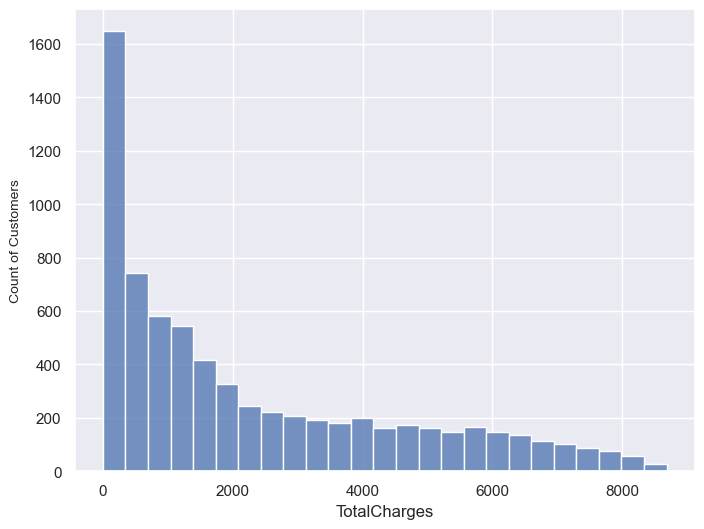

In [43]:
plt.figure(figsize = (8,6))
sns.histplot(tcc_df['TotalCharges'])
plt.ylabel('Count of Customers', fontsize = 10)

<Axes: xlabel='TotalCharges'>

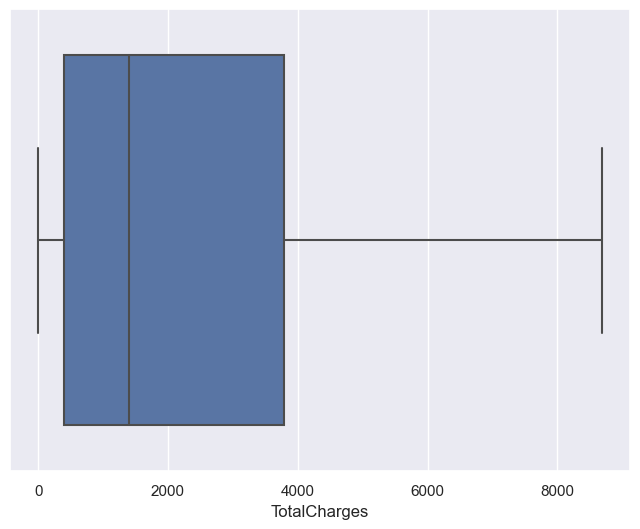

In [44]:
plt.figure(figsize = (8,6))
sns.boxplot(x = tcc_df['TotalCharges'])

## Insights:
- We observe a peak/sudden increase in the count of passengers with **tenure** < 5 which indicates that a lot of new customers buy the services but after a few months less than half are retained. There is also another peak at around maximum tenure, which hints that they could be classified as the loyal customers for years.
- The maximum customer count pays the least **MonthyCharges** but the count decreases for higher charges. Also, ignoring the least monthly charges paying customers, the rest of the distribution follows almost a normal distribution.
- There is a sudden and then a steady decrease in the count of customers as **TotalCharges** increase. This further proves that majority of the customers are not being retained.

## Bivariate Analysis

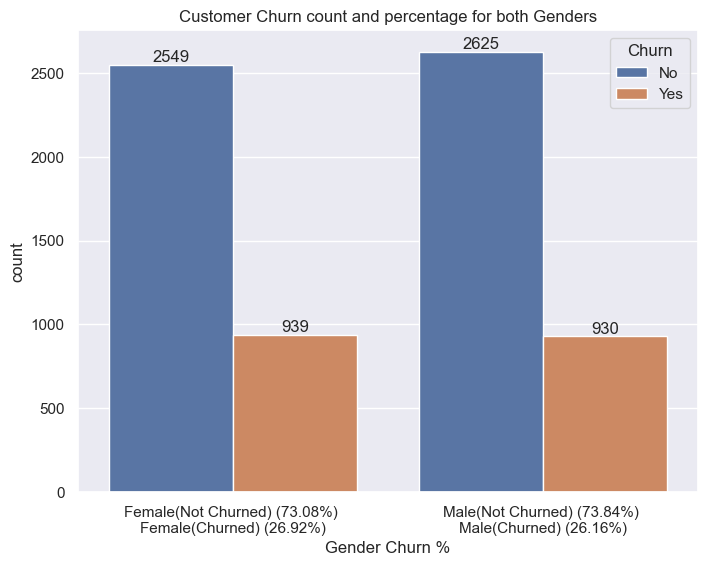

In [45]:
#gender vs Churn
fem_churn_no_per = tcc_df.groupby('gender')['Churn'].value_counts()[0]/tcc_df['gender'].value_counts()[1] *100
fem_churn_yes_per = tcc_df.groupby('gender')['Churn'].value_counts()[1]/tcc_df['gender'].value_counts()[1] *100
male_churn_no_per = tcc_df.groupby('gender')['Churn'].value_counts()[2]/tcc_df['gender'].value_counts()[0] *100
male_churn_yes_per = tcc_df.groupby('gender')['Churn'].value_counts()[3]/tcc_df['gender'].value_counts()[0] *100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= 'gender', hue= 'Churn', data = tcc_df)
plt.xticks([0,1], ['Female(Not Churned) ({:.2f}%) \nFemale(Churned) ({:.2f}%)'.format(fem_churn_no_per, fem_churn_yes_per), 'Male(Not Churned) ({:.2f}%) \nMale(Churned) ({:.2f}%)'.format(male_churn_no_per, male_churn_yes_per)])
plt.title('Customer Churn count and percentage for both Genders')
plt.xlabel('Gender Churn %')
for i in range(2):
    ax.bar_label(ax.containers[i])

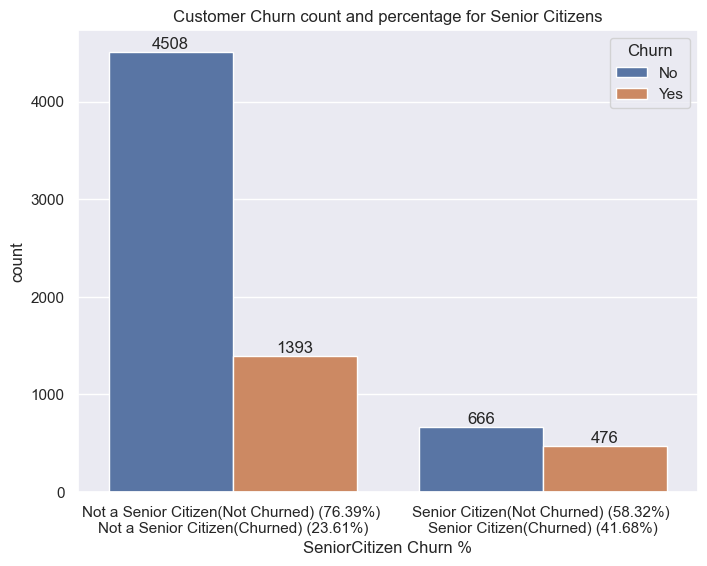

In [130]:
#SeniorCitizen vs Churn
scno_churn_no_per = tcc_df.groupby('SeniorCitizen')['Churn'].value_counts()[0]/tcc_df['SeniorCitizen'].value_counts()[0] *100
scno_churn_yes_per = tcc_df.groupby('SeniorCitizen')['Churn'].value_counts()[1]/tcc_df['SeniorCitizen'].value_counts()[0] *100
scyes_churn_no_per = tcc_df.groupby('SeniorCitizen')['Churn'].value_counts()[2]/tcc_df['SeniorCitizen'].value_counts()[1] *100
scyes_churn_yes_per = tcc_df.groupby('SeniorCitizen')['Churn'].value_counts()[3]/tcc_df['SeniorCitizen'].value_counts()[1] *100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= 'SeniorCitizen', hue= 'Churn', data = tcc_df)
plt.xticks([0,1], ['Not a Senior Citizen(Not Churned) ({:.2f}%) \nNot a Senior Citizen(Churned) ({:.2f}%)'.format(scno_churn_no_per, scno_churn_yes_per), 'Senior Citizen(Not Churned) ({:.2f}%) \nSenior Citizen(Churned) ({:.2f}%)'.format(scyes_churn_no_per, scyes_churn_yes_per)])
plt.title('Customer Churn count and percentage for Senior Citizens')
plt.xlabel('SeniorCitizen Churn %')
for i in range(2):
    ax.bar_label(ax.containers[i])

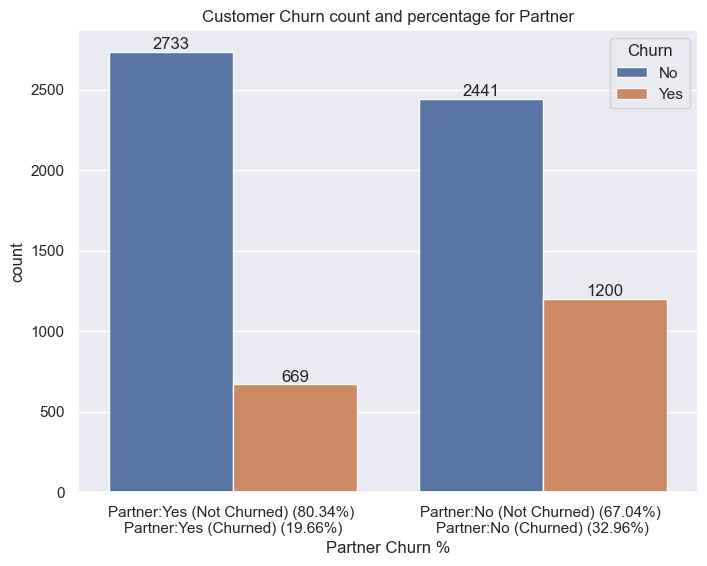

In [47]:
#Partner vs Churn
ptno_churn_no_per = tcc_df.groupby('Partner')['Churn'].value_counts()[0]/tcc_df['Partner'].value_counts()[0] *100
ptno_churn_yes_per = tcc_df.groupby('Partner')['Churn'].value_counts()[1]/tcc_df['Partner'].value_counts()[0] *100
ptyes_churn_no_per = tcc_df.groupby('Partner')['Churn'].value_counts()[2]/tcc_df['Partner'].value_counts()[1] *100
ptyes_churn_yes_per = tcc_df.groupby('Partner')['Churn'].value_counts()[3]/tcc_df['Partner'].value_counts()[1] *100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= 'Partner', hue= 'Churn', data = tcc_df)
plt.xticks([0,1], [ 'Partner:Yes (Not Churned) ({:.2f}%) \nPartner:Yes (Churned) ({:.2f}%)'.format(ptyes_churn_no_per, ptyes_churn_yes_per), 'Partner:No (Not Churned) ({:.2f}%) \nPartner:No (Churned) ({:.2f}%)'.format(ptno_churn_no_per, ptno_churn_yes_per)])
plt.title('Customer Churn count and percentage for Partner')
plt.xlabel('Partner Churn %')
for i in range(2):
    ax.bar_label(ax.containers[i])

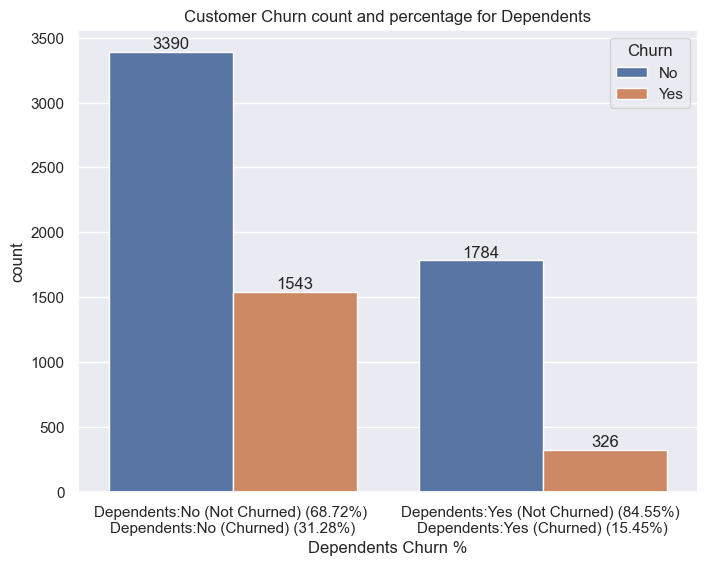

In [80]:
#Dependents vs Churn
depno_churn_no_per = tcc_df.groupby('Dependents')['Churn'].value_counts()[0]/tcc_df['Dependents'].value_counts()[0] *100
depno_churn_yes_per = tcc_df.groupby('Dependents')['Churn'].value_counts()[1]/tcc_df['Dependents'].value_counts()[0] *100
depyes_churn_no_per = tcc_df.groupby('Dependents')['Churn'].value_counts()[2]/tcc_df['Dependents'].value_counts()[1] *100
depyes_churn_yes_per = tcc_df.groupby('Dependents')['Churn'].value_counts()[3]/tcc_df['Dependents'].value_counts()[1] *100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= 'Dependents', hue= 'Churn', data = tcc_df)
plt.xticks([0,1], ['Dependents:No (Not Churned) ({:.2f}%) \nDependents:No (Churned) ({:.2f}%)'.format(depno_churn_no_per, depno_churn_yes_per), 'Dependents:Yes (Not Churned) ({:.2f}%) \nDependents:Yes (Churned) ({:.2f}%)'.format(depyes_churn_no_per, depyes_churn_yes_per)])
plt.title('Customer Churn count and percentage for Dependents')
plt.xlabel('Dependents Churn %')
for i in range(2):
    ax.bar_label(ax.containers[i])

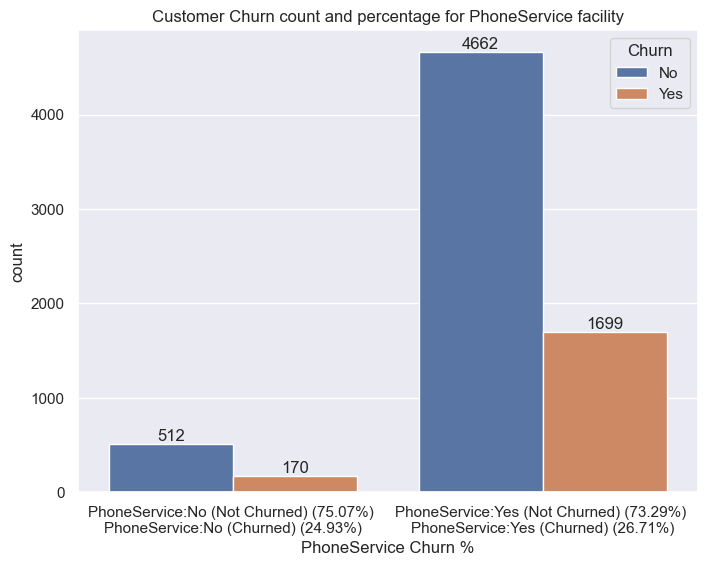

In [79]:
#PhoneService vs Churn
psno_churn_no_per = tcc_df.groupby('PhoneService')['Churn'].value_counts()[0]/tcc_df['PhoneService'].value_counts()[1] *100
psno_churn_yes_per = tcc_df.groupby('PhoneService')['Churn'].value_counts()[1]/tcc_df['PhoneService'].value_counts()[1] *100
psyes_churn_no_per = tcc_df.groupby('PhoneService')['Churn'].value_counts()[2]/tcc_df['PhoneService'].value_counts()[0] *100
psyes_churn_yes_per = tcc_df.groupby('PhoneService')['Churn'].value_counts()[3]/tcc_df['PhoneService'].value_counts()[0] *100

plt.figure(figsize = (8,6))
ax = sns.countplot(x= 'PhoneService', hue= 'Churn', data = tcc_df)
plt.xticks([0,1], ['PhoneService:No (Not Churned) ({:.2f}%) \nPhoneService:No (Churned) ({:.2f}%)'.format(psno_churn_no_per, psno_churn_yes_per), 'PhoneService:Yes (Not Churned) ({:.2f}%) \nPhoneService:Yes (Churned) ({:.2f}%)'.format(psyes_churn_no_per, psyes_churn_yes_per)])
plt.title('Customer Churn count and percentage for PhoneService facility')
plt.xlabel('PhoneService Churn %')
for i in range(2):
    ax.bar_label(ax.containers[i])

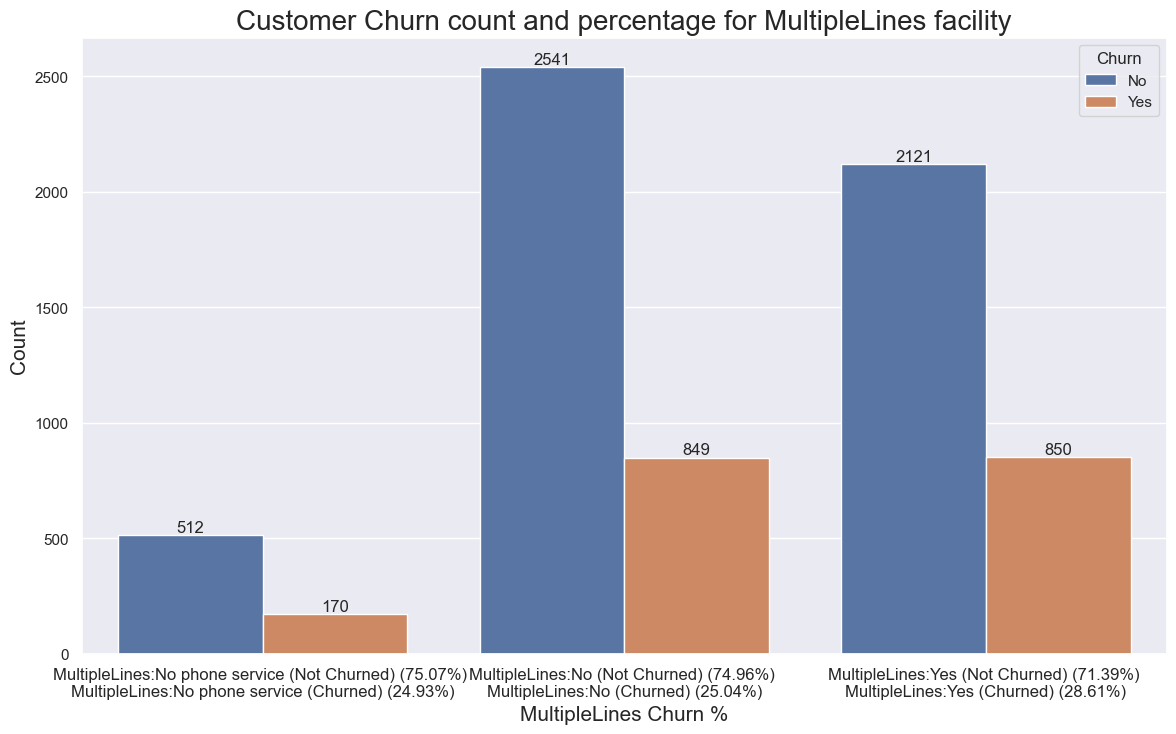

In [78]:
#MultipleLines vs Churn
mlno_churn_no_per = tcc_df.groupby('MultipleLines')['Churn'].value_counts()[0]/tcc_df['MultipleLines'].value_counts()[0] *100
mlno_churn_yes_per = tcc_df.groupby('MultipleLines')['Churn'].value_counts()[1]/tcc_df['MultipleLines'].value_counts()[0] *100
mlnps_churn_no_per = tcc_df.groupby('MultipleLines')['Churn'].value_counts()[2]/tcc_df['MultipleLines'].value_counts()[2] *100
mlnps_churn_yes_per = tcc_df.groupby('MultipleLines')['Churn'].value_counts()[3]/tcc_df['MultipleLines'].value_counts()[2] *100
mlyes_churn_no_per = tcc_df.groupby('MultipleLines')['Churn'].value_counts()[4]/tcc_df['MultipleLines'].value_counts()[1] *100
mlyes_churn_yes_per = tcc_df.groupby('MultipleLines')['Churn'].value_counts()[5]/tcc_df['MultipleLines'].value_counts()[1] *100

plt.figure(figsize = (14,8))
ax = sns.countplot(x= 'MultipleLines', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['MultipleLines:No phone service (Not Churned) ({:.2f}%) \nMultipleLines:No phone service (Churned) ({:.2f}%)'.format(mlnps_churn_no_per, mlnps_churn_yes_per), 'MultipleLines:No (Not Churned) ({:.2f}%) \nMultipleLines:No (Churned) ({:.2f}%)'.format(mlno_churn_no_per, mlno_churn_yes_per), 'MultipleLines:Yes (Not Churned) ({:.2f}%) \nMultipleLines:Yes (Churned) ({:.2f}%)'.format(mlyes_churn_no_per, mlyes_churn_yes_per)], fontsize = 12)
plt.title('Customer Churn count and percentage for MultipleLines facility', fontsize = 20)
plt.xlabel('MultipleLines Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

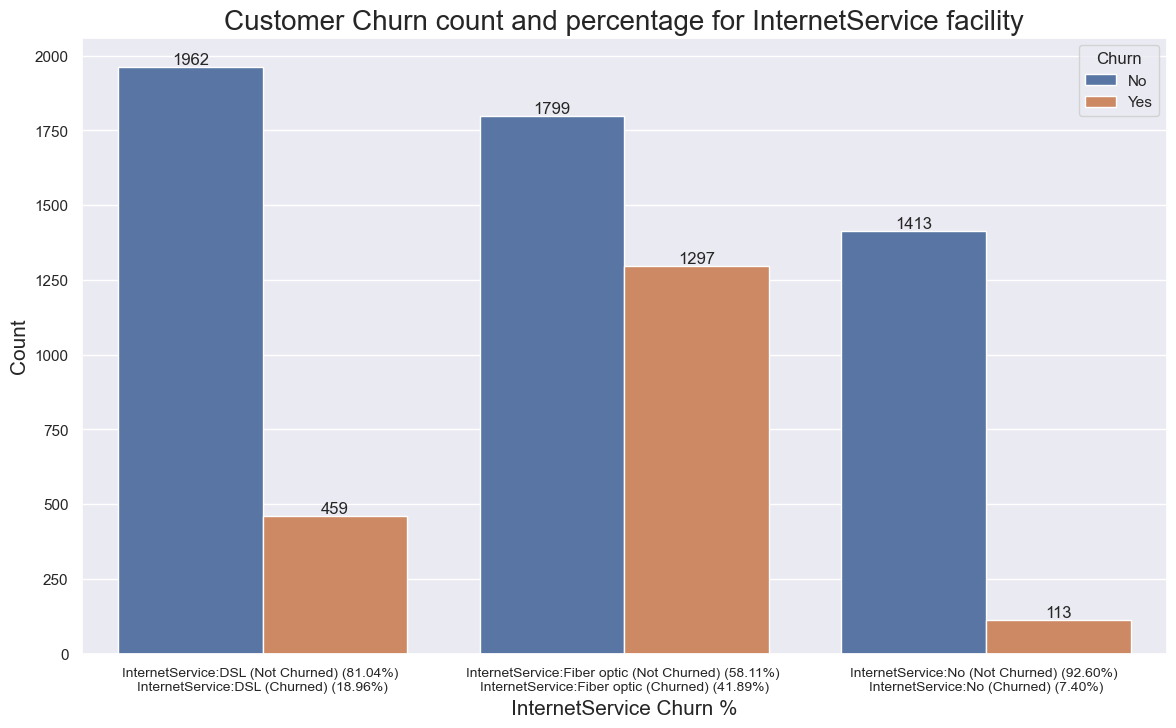

In [77]:
#InternetService vs Churn
isDSL_churn_no_per = tcc_df.groupby('InternetService')['Churn'].value_counts()[0]/tcc_df['InternetService'].value_counts()[1] *100
isDSL_churn_yes_per = tcc_df.groupby('InternetService')['Churn'].value_counts()[1]/tcc_df['InternetService'].value_counts()[1] *100
isFO_churn_no_per = tcc_df.groupby('InternetService')['Churn'].value_counts()[2]/tcc_df['InternetService'].value_counts()[0] *100
isFO_churn_yes_per = tcc_df.groupby('InternetService')['Churn'].value_counts()[3]/tcc_df['InternetService'].value_counts()[0] *100
isno_churn_no_per = tcc_df.groupby('InternetService')['Churn'].value_counts()[4]/tcc_df['InternetService'].value_counts()[2] *100
isno_churn_yes_per = tcc_df.groupby('InternetService')['Churn'].value_counts()[5]/tcc_df['InternetService'].value_counts()[2] *100

plt.figure(figsize = (14,8))
ax = sns.countplot(x= 'InternetService', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['InternetService:DSL (Not Churned) ({:.2f}%) \nInternetService:DSL (Churned) ({:.2f}%)'.format(isDSL_churn_no_per, isDSL_churn_yes_per), 'InternetService:Fiber optic (Not Churned) ({:.2f}%) \nInternetService:Fiber optic (Churned) ({:.2f}%)'.format(isFO_churn_no_per, isFO_churn_yes_per), 'InternetService:No (Not Churned) ({:.2f}%) \nInternetService:No (Churned) ({:.2f}%)'.format(isno_churn_no_per, isno_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for InternetService facility', fontsize = 20)
plt.xlabel('InternetService Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

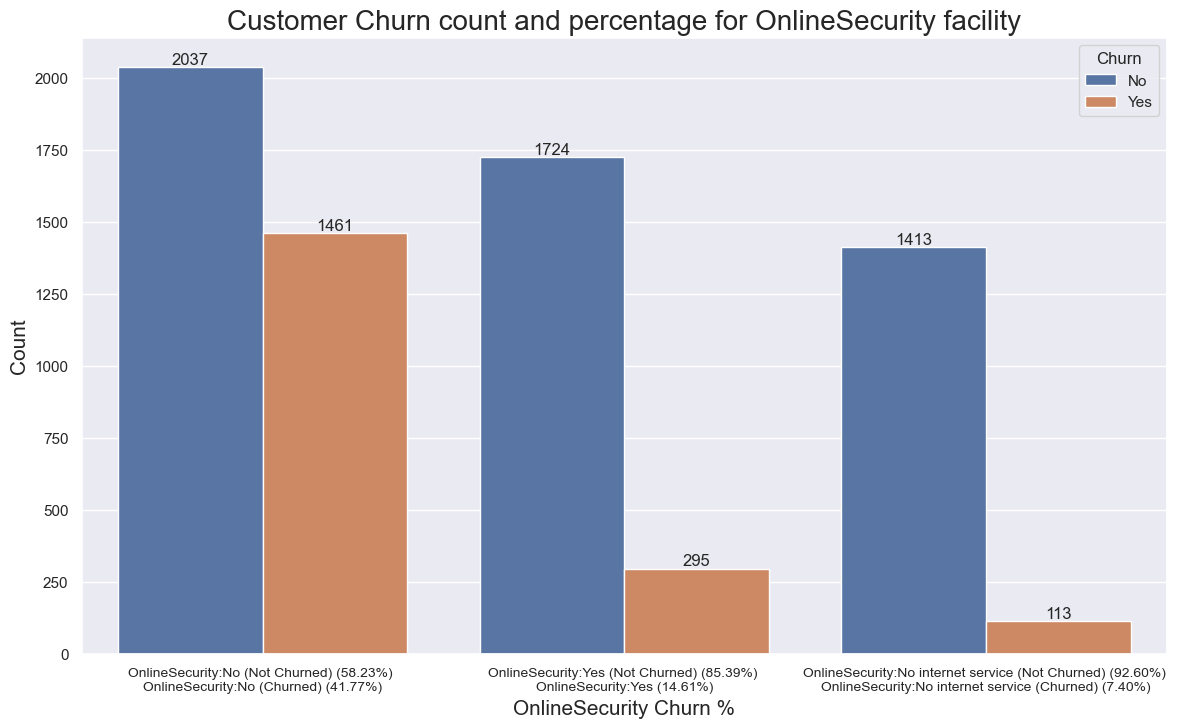

In [52]:
#OnlineSecurity vs Churn
osno_churn_no_per = tcc_df.groupby('OnlineSecurity')['Churn'].value_counts()[0]/tcc_df['OnlineSecurity'].value_counts()[0] *100
osno_churn_yes_per = tcc_df.groupby('OnlineSecurity')['Churn'].value_counts()[1]/tcc_df['OnlineSecurity'].value_counts()[0] *100
osnis_churn_no_per = tcc_df.groupby('OnlineSecurity')['Churn'].value_counts()[2]/tcc_df['OnlineSecurity'].value_counts()[2] *100
osnis_churn_yes_per = tcc_df.groupby('OnlineSecurity')['Churn'].value_counts()[3]/tcc_df['OnlineSecurity'].value_counts()[2] *100
osyes_churn_no_per = tcc_df.groupby('OnlineSecurity')['Churn'].value_counts()[4]/tcc_df['OnlineSecurity'].value_counts()[1] *100
osyes_churn_yes_per = tcc_df.groupby('OnlineSecurity')['Churn'].value_counts()[5]/tcc_df['OnlineSecurity'].value_counts()[1] *100

plt.figure(figsize = (14,8))
ax = sns.countplot(x= 'OnlineSecurity', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['OnlineSecurity:No (Not Churned) ({:.2f}%) \nOnlineSecurity:No (Churned) ({:.2f}%)'.format(osno_churn_no_per, osno_churn_yes_per), 'OnlineSecurity:Yes (Not Churned) ({:.2f}%) \nOnlineSecurity:Yes ({:.2f}%)'.format(osyes_churn_no_per, osyes_churn_yes_per), 'OnlineSecurity:No internet service (Not Churned) ({:.2f}%) \nOnlineSecurity:No internet service (Churned) ({:.2f}%)'.format(osnis_churn_no_per, osnis_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for OnlineSecurity facility', fontsize = 20)
plt.xlabel('OnlineSecurity Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

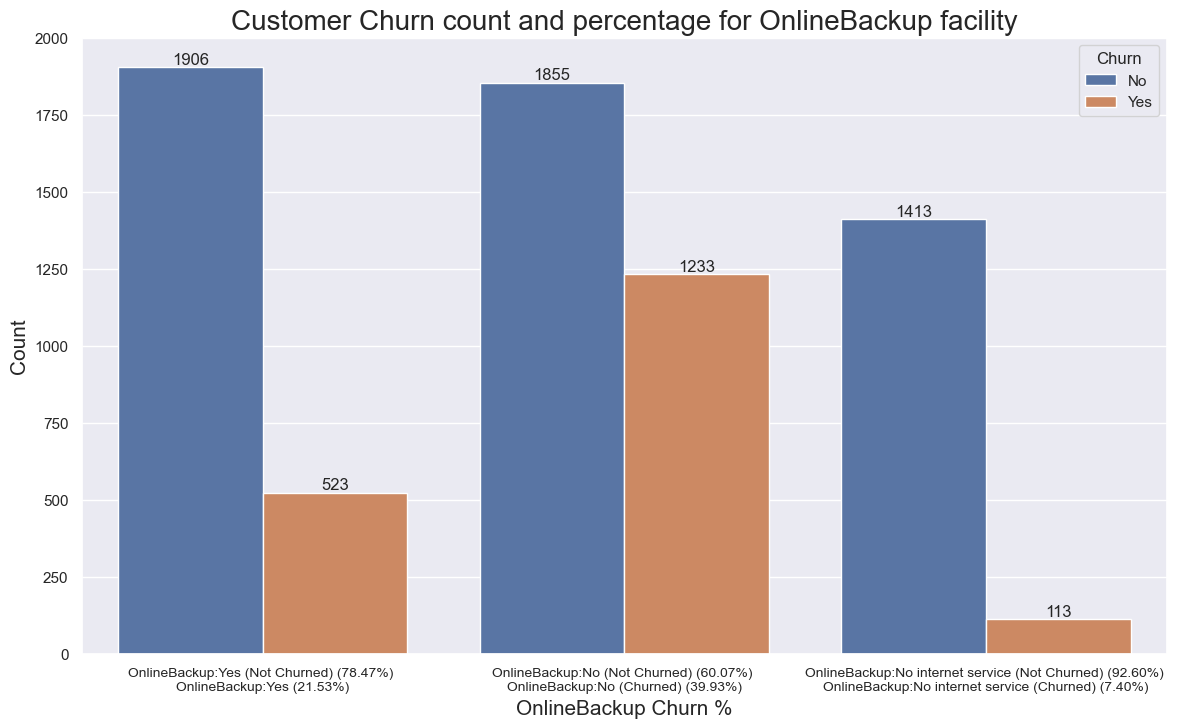

In [53]:
#OnlineBackup vs Churn
obno_churn_no_per = tcc_df.groupby('OnlineBackup')['Churn'].value_counts()[0]/tcc_df['OnlineBackup'].value_counts()[0] *100
obno_churn_yes_per = tcc_df.groupby('OnlineBackup')['Churn'].value_counts()[1]/tcc_df['OnlineBackup'].value_counts()[0] *100
obnis_churn_no_per = tcc_df.groupby('OnlineBackup')['Churn'].value_counts()[2]/tcc_df['OnlineBackup'].value_counts()[2] *100
obnis_churn_yes_per = tcc_df.groupby('OnlineBackup')['Churn'].value_counts()[3]/tcc_df['OnlineBackup'].value_counts()[2] *100
obyes_churn_no_per = tcc_df.groupby('OnlineBackup')['Churn'].value_counts()[4]/tcc_df['OnlineBackup'].value_counts()[1] *100
obyes_churn_yes_per = tcc_df.groupby('OnlineBackup')['Churn'].value_counts()[5]/tcc_df['OnlineBackup'].value_counts()[1] *100

plt.figure(figsize = (14,8))
ax = sns.countplot(x= 'OnlineBackup', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['OnlineBackup:Yes (Not Churned) ({:.2f}%) \nOnlineBackup:Yes ({:.2f}%)'.format(obyes_churn_no_per, obyes_churn_yes_per), 'OnlineBackup:No (Not Churned) ({:.2f}%) \nOnlineBackup:No (Churned) ({:.2f}%)'.format(obno_churn_no_per, obno_churn_yes_per), 'OnlineBackup:No internet service (Not Churned) ({:.2f}%) \nOnlineBackup:No internet service (Churned) ({:.2f}%)'.format(obnis_churn_no_per, obnis_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for OnlineBackup facility', fontsize = 20)
plt.xlabel('OnlineBackup Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

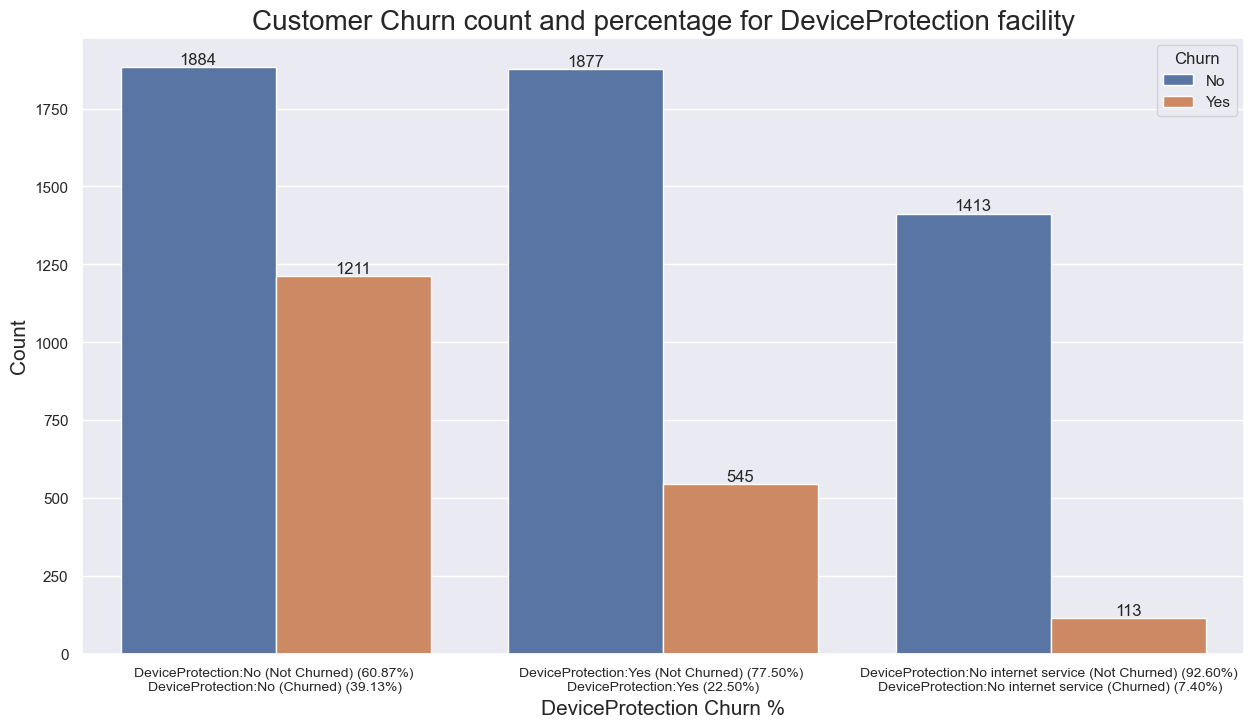

In [54]:
#DeviceProtection vs Churn
dpno_churn_no_per = tcc_df.groupby('DeviceProtection')['Churn'].value_counts()[0]/tcc_df['DeviceProtection'].value_counts()[0] *100
dpno_churn_yes_per = tcc_df.groupby('DeviceProtection')['Churn'].value_counts()[1]/tcc_df['DeviceProtection'].value_counts()[0] *100
dpnis_churn_no_per = tcc_df.groupby('DeviceProtection')['Churn'].value_counts()[2]/tcc_df['DeviceProtection'].value_counts()[2] *100
dpnis_churn_yes_per = tcc_df.groupby('DeviceProtection')['Churn'].value_counts()[3]/tcc_df['DeviceProtection'].value_counts()[2] *100
dpyes_churn_no_per = tcc_df.groupby('DeviceProtection')['Churn'].value_counts()[4]/tcc_df['DeviceProtection'].value_counts()[1] *100
dpyes_churn_yes_per = tcc_df.groupby('DeviceProtection')['Churn'].value_counts()[5]/tcc_df['DeviceProtection'].value_counts()[1] *100

plt.figure(figsize = (15,8))
ax = sns.countplot(x= 'DeviceProtection', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['DeviceProtection:No (Not Churned) ({:.2f}%) \nDeviceProtection:No (Churned) ({:.2f}%)'.format(dpno_churn_no_per, dpno_churn_yes_per), 'DeviceProtection:Yes (Not Churned) ({:.2f}%) \nDeviceProtection:Yes ({:.2f}%)'.format(dpyes_churn_no_per, dpyes_churn_yes_per), 'DeviceProtection:No internet service (Not Churned) ({:.2f}%) \nDeviceProtection:No internet service (Churned) ({:.2f}%)'.format(dpnis_churn_no_per, dpnis_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for DeviceProtection facility', fontsize = 20)
plt.xlabel('DeviceProtection Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

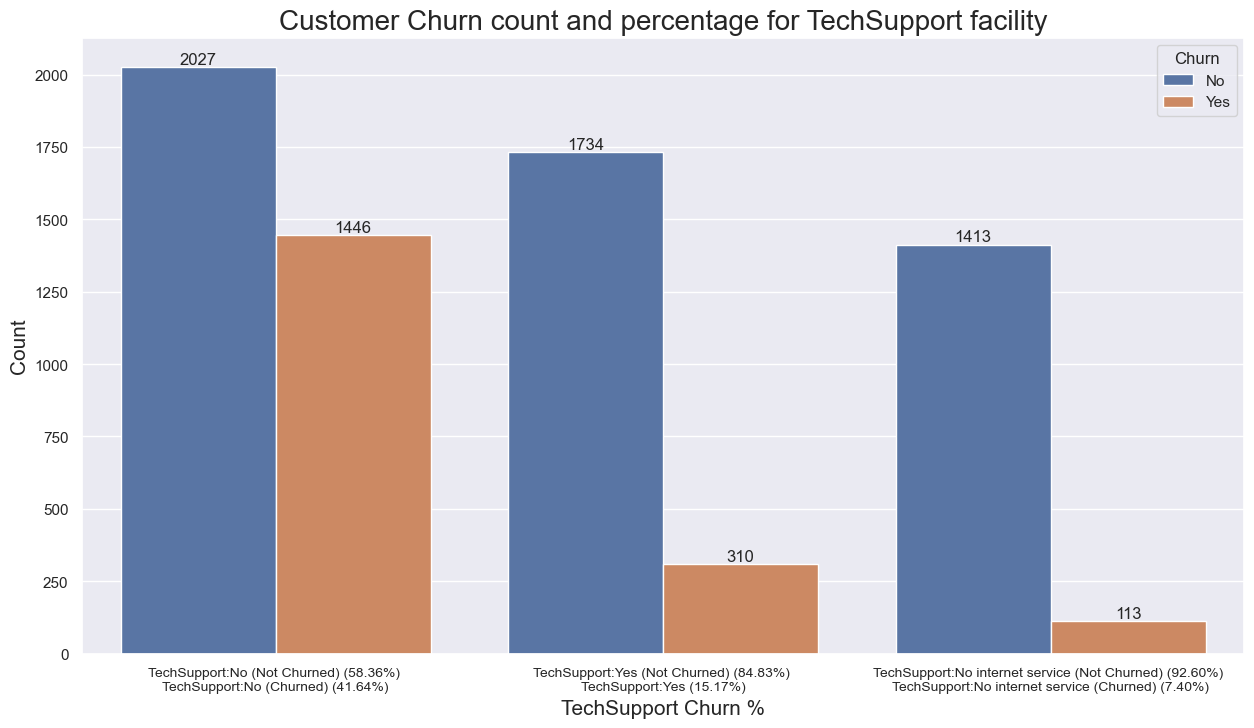

In [55]:
#TechSupport vs Churn
tsno_churn_no_per = tcc_df.groupby('TechSupport')['Churn'].value_counts()[0]/tcc_df['TechSupport'].value_counts()[0] *100
tsno_churn_yes_per = tcc_df.groupby('TechSupport')['Churn'].value_counts()[1]/tcc_df['TechSupport'].value_counts()[0] *100
tsnis_churn_no_per = tcc_df.groupby('TechSupport')['Churn'].value_counts()[2]/tcc_df['TechSupport'].value_counts()[2] *100
tsnis_churn_yes_per = tcc_df.groupby('TechSupport')['Churn'].value_counts()[3]/tcc_df['TechSupport'].value_counts()[2] *100
tsyes_churn_no_per = tcc_df.groupby('TechSupport')['Churn'].value_counts()[4]/tcc_df['TechSupport'].value_counts()[1] *100
tsyes_churn_yes_per = tcc_df.groupby('TechSupport')['Churn'].value_counts()[5]/tcc_df['TechSupport'].value_counts()[1] *100

plt.figure(figsize = (15,8))
ax = sns.countplot(x= 'TechSupport', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['TechSupport:No (Not Churned) ({:.2f}%) \nTechSupport:No (Churned) ({:.2f}%)'.format(tsno_churn_no_per, tsno_churn_yes_per), 'TechSupport:Yes (Not Churned) ({:.2f}%) \nTechSupport:Yes ({:.2f}%)'.format(tsyes_churn_no_per, tsyes_churn_yes_per), 'TechSupport:No internet service (Not Churned) ({:.2f}%) \nTechSupport:No internet service (Churned) ({:.2f}%)'.format(tsnis_churn_no_per, tsnis_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for TechSupport facility', fontsize = 20)
plt.xlabel('TechSupport Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

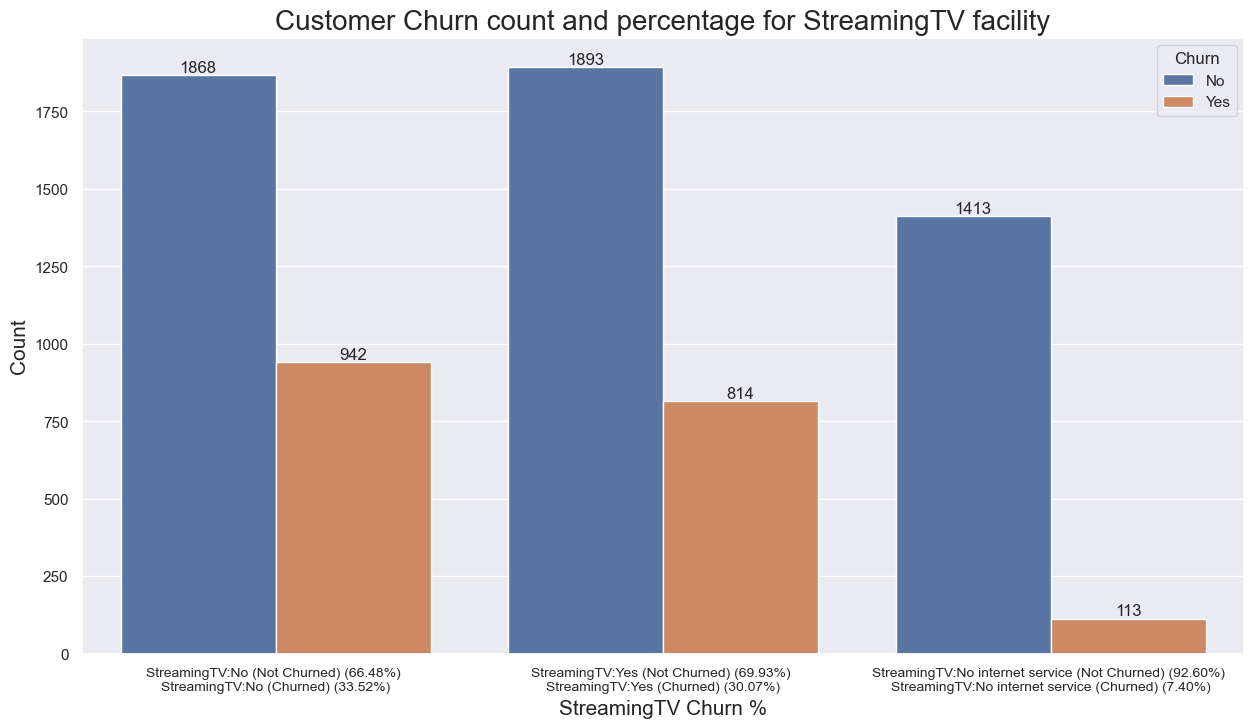

In [82]:
#StreamingTV vs Churn
stno_churn_no_per = tcc_df.groupby('StreamingTV')['Churn'].value_counts()[0]/tcc_df['StreamingTV'].value_counts()[0] *100
stno_churn_yes_per = tcc_df.groupby('StreamingTV')['Churn'].value_counts()[1]/tcc_df['StreamingTV'].value_counts()[0] *100
stnis_churn_no_per = tcc_df.groupby('StreamingTV')['Churn'].value_counts()[2]/tcc_df['StreamingTV'].value_counts()[2] *100
stnis_churn_yes_per = tcc_df.groupby('StreamingTV')['Churn'].value_counts()[3]/tcc_df['StreamingTV'].value_counts()[2] *100
styes_churn_no_per = tcc_df.groupby('StreamingTV')['Churn'].value_counts()[4]/tcc_df['StreamingTV'].value_counts()[1] *100
styes_churn_yes_per = tcc_df.groupby('StreamingTV')['Churn'].value_counts()[5]/tcc_df['StreamingTV'].value_counts()[1] *100

plt.figure(figsize = (15,8))
ax = sns.countplot(x= 'StreamingTV', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['StreamingTV:No (Not Churned) ({:.2f}%) \nStreamingTV:No (Churned) ({:.2f}%)'.format(stno_churn_no_per, stno_churn_yes_per), 'StreamingTV:Yes (Not Churned) ({:.2f}%) \nStreamingTV:Yes (Churned) ({:.2f}%)'.format(styes_churn_no_per, styes_churn_yes_per), 'StreamingTV:No internet service (Not Churned) ({:.2f}%) \nStreamingTV:No internet service (Churned) ({:.2f}%)'.format(stnis_churn_no_per, stnis_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for StreamingTV facility', fontsize = 20)
plt.xlabel('StreamingTV Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

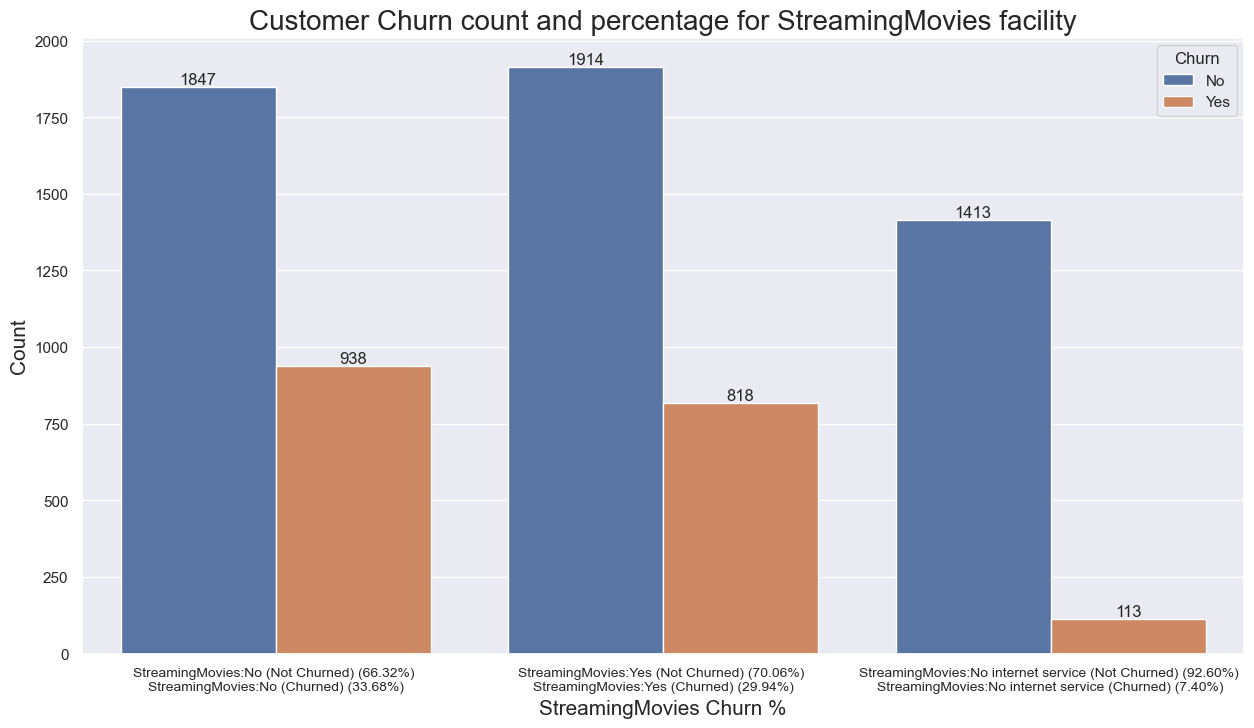

In [81]:
#StreamingMovies vs Churn
stmno_churn_no_per = tcc_df.groupby('StreamingMovies')['Churn'].value_counts()[0]/tcc_df['StreamingMovies'].value_counts()[0] *100
stmno_churn_yes_per = tcc_df.groupby('StreamingMovies')['Churn'].value_counts()[1]/tcc_df['StreamingMovies'].value_counts()[0] *100
stmnis_churn_no_per = tcc_df.groupby('StreamingMovies')['Churn'].value_counts()[2]/tcc_df['StreamingMovies'].value_counts()[2] *100
stmnis_churn_yes_per = tcc_df.groupby('StreamingMovies')['Churn'].value_counts()[3]/tcc_df['StreamingMovies'].value_counts()[2] *100
stmyes_churn_no_per = tcc_df.groupby('StreamingMovies')['Churn'].value_counts()[4]/tcc_df['StreamingMovies'].value_counts()[1] *100
stmyes_churn_yes_per = tcc_df.groupby('StreamingMovies')['Churn'].value_counts()[5]/tcc_df['StreamingMovies'].value_counts()[1] *100

plt.figure(figsize = (15,8))
ax = sns.countplot(x= 'StreamingMovies', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['StreamingMovies:No (Not Churned) ({:.2f}%) \nStreamingMovies:No (Churned) ({:.2f}%)'.format(stmno_churn_no_per, stmno_churn_yes_per), 'StreamingMovies:Yes (Not Churned) ({:.2f}%) \nStreamingMovies:Yes (Churned) ({:.2f}%)'.format(stmyes_churn_no_per, stmyes_churn_yes_per), 'StreamingMovies:No internet service (Not Churned) ({:.2f}%) \nStreamingMovies:No internet service (Churned) ({:.2f}%)'.format(stmnis_churn_no_per, stmnis_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for StreamingMovies facility', fontsize = 20)
plt.xlabel('StreamingMovies Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

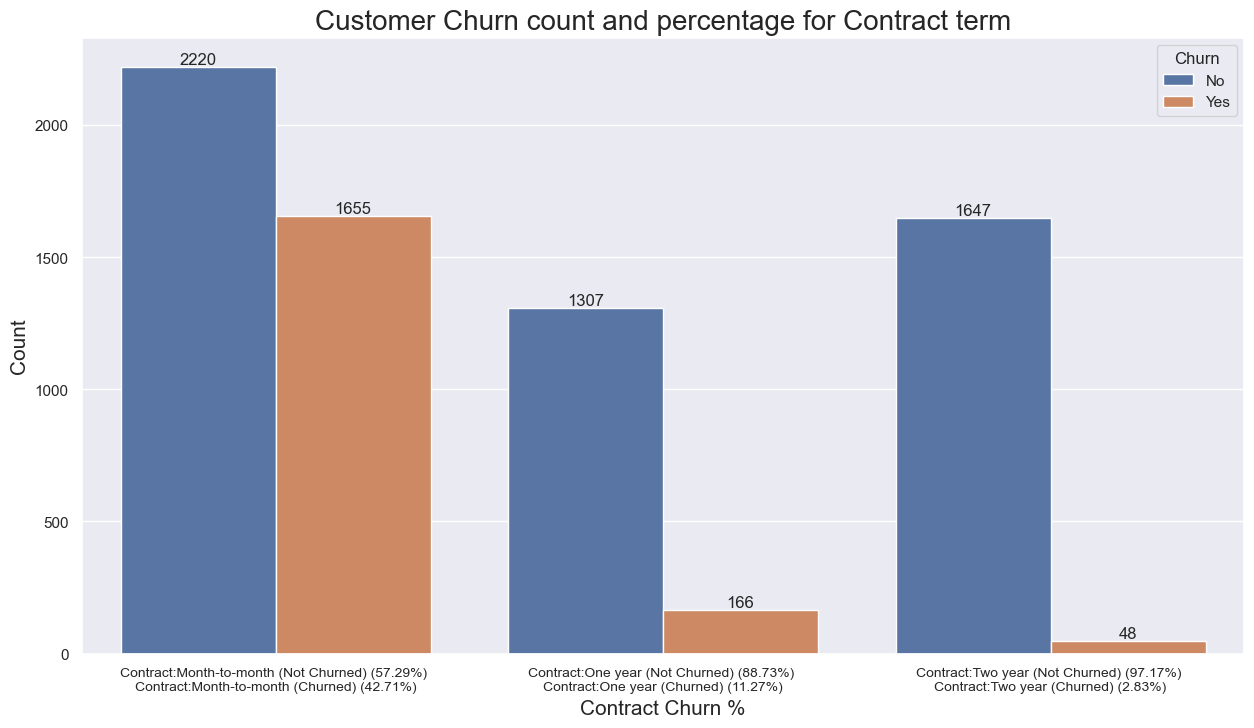

In [58]:
#Contract vs Churn
ctm2m_churn_no_per = tcc_df.groupby('Contract')['Churn'].value_counts()[0]/tcc_df['Contract'].value_counts()[0] *100
ctm2m_churn_yes_per = tcc_df.groupby('Contract')['Churn'].value_counts()[1]/tcc_df['Contract'].value_counts()[0] *100
ct1y_churn_no_per = tcc_df.groupby('Contract')['Churn'].value_counts()[2]/tcc_df['Contract'].value_counts()[2] *100
ct1y_churn_yes_per = tcc_df.groupby('Contract')['Churn'].value_counts()[3]/tcc_df['Contract'].value_counts()[2] *100
ct2y_churn_no_per = tcc_df.groupby('Contract')['Churn'].value_counts()[4]/tcc_df['Contract'].value_counts()[1] *100
ct2y_churn_yes_per = tcc_df.groupby('Contract')['Churn'].value_counts()[5]/tcc_df['Contract'].value_counts()[1] *100

plt.figure(figsize = (15,8))
ax = sns.countplot(x= 'Contract', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2], ['Contract:Month-to-month (Not Churned) ({:.2f}%) \nContract:Month-to-month (Churned) ({:.2f}%)'.format(ctm2m_churn_no_per, ctm2m_churn_yes_per), 'Contract:One year (Not Churned) ({:.2f}%) \nContract:One year (Churned) ({:.2f}%)'.format(ct1y_churn_no_per, ct1y_churn_yes_per), 'Contract:Two year (Not Churned) ({:.2f}%) \nContract:Two year (Churned) ({:.2f}%)'.format(ct2y_churn_no_per, ct2y_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for Contract term', fontsize = 20)
plt.xlabel('Contract Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

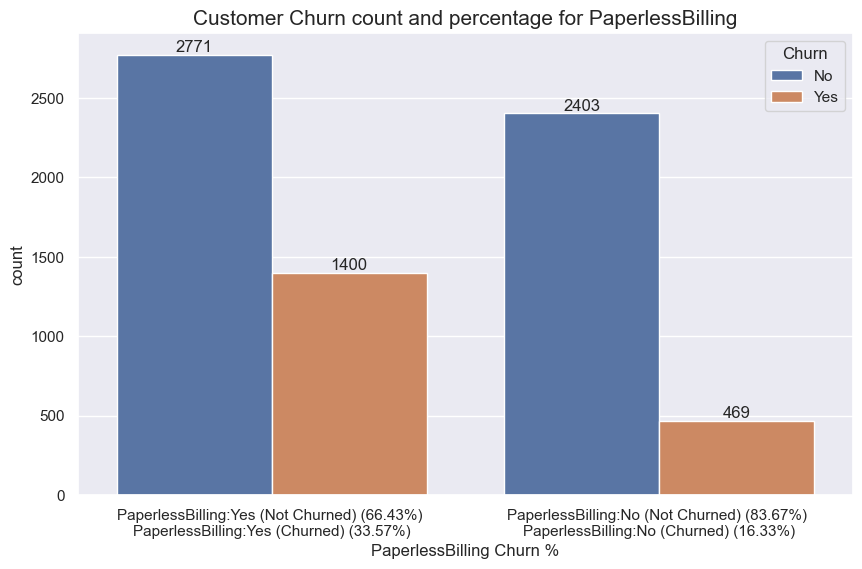

In [83]:
#PaperlessBilling vs Churn
pbno_churn_no_per = tcc_df.groupby('PaperlessBilling')['Churn'].value_counts()[0]/tcc_df['PaperlessBilling'].value_counts()[1] *100
pbno_churn_yes_per = tcc_df.groupby('PaperlessBilling')['Churn'].value_counts()[1]/tcc_df['PaperlessBilling'].value_counts()[1] *100
pbyes_churn_no_per = tcc_df.groupby('PaperlessBilling')['Churn'].value_counts()[2]/tcc_df['PaperlessBilling'].value_counts()[0] *100
pbyes_churn_yes_per = tcc_df.groupby('PaperlessBilling')['Churn'].value_counts()[3]/tcc_df['PaperlessBilling'].value_counts()[0] *100

plt.figure(figsize = (10,6))
ax = sns.countplot(x= 'PaperlessBilling', hue= 'Churn', data = tcc_df)
plt.xticks([0,1], ['PaperlessBilling:Yes (Not Churned) ({:.2f}%) \nPaperlessBilling:Yes (Churned) ({:.2f}%)'.format(pbyes_churn_no_per, pbyes_churn_yes_per), 
                   'PaperlessBilling:No (Not Churned) ({:.2f}%) \nPaperlessBilling:No (Churned) ({:.2f}%)'.format(pbno_churn_no_per, pbno_churn_yes_per)])
plt.title('Customer Churn count and percentage for PaperlessBilling', fontsize = 15)
plt.xlabel('PaperlessBilling Churn %', fontsize = 12)
for i in range(2):
    ax.bar_label(ax.containers[i])

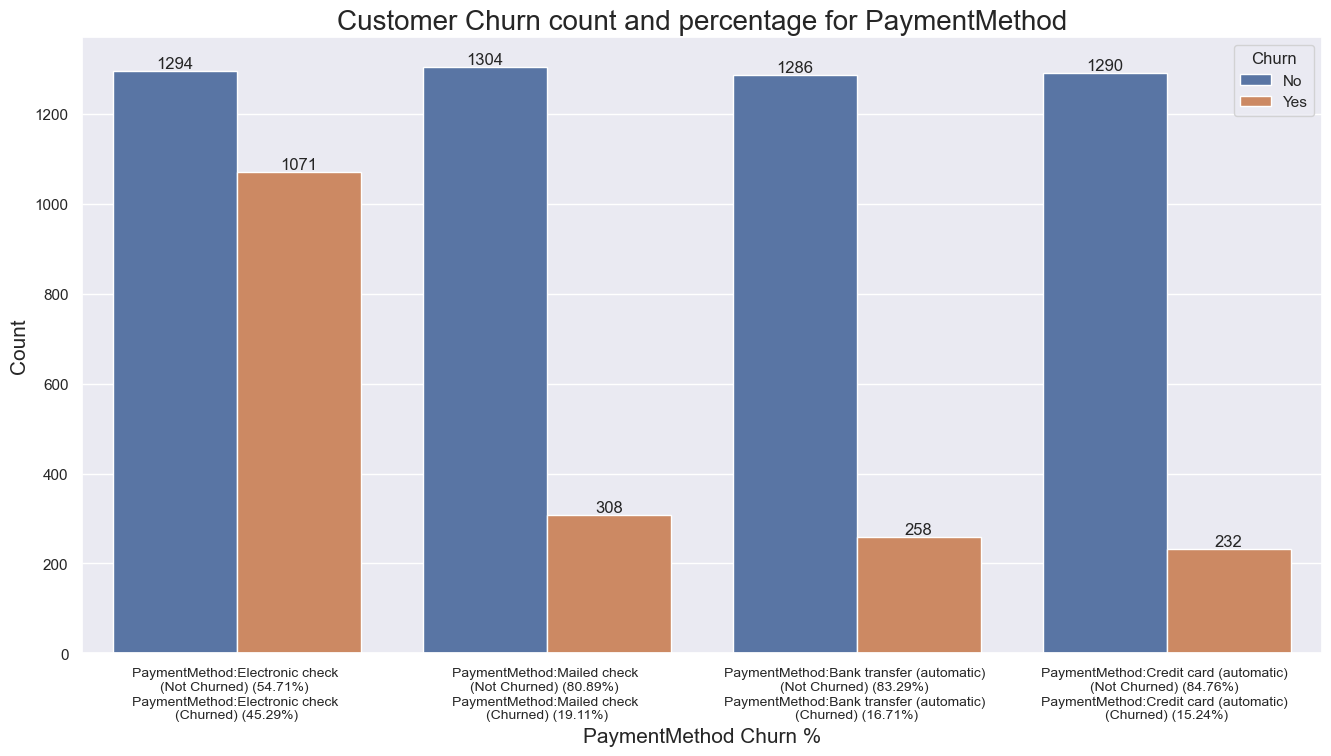

In [60]:
#PaymentMethod vs Churn
pmBT_churn_no_per = tcc_df.groupby('PaymentMethod')['Churn'].value_counts()[0]/tcc_df['PaymentMethod'].value_counts()[2] *100
pmBT_churn_yes_per = tcc_df.groupby('PaymentMethod')['Churn'].value_counts()[1]/tcc_df['PaymentMethod'].value_counts()[2] *100
pmCC_churn_no_per = tcc_df.groupby('PaymentMethod')['Churn'].value_counts()[2]/tcc_df['PaymentMethod'].value_counts()[3] *100
pmCC_churn_yes_per = tcc_df.groupby('PaymentMethod')['Churn'].value_counts()[3]/tcc_df['PaymentMethod'].value_counts()[3] *100
pmEC_churn_no_per = tcc_df.groupby('PaymentMethod')['Churn'].value_counts()[4]/tcc_df['PaymentMethod'].value_counts()[0] *100
pmEC_churn_yes_per = tcc_df.groupby('PaymentMethod')['Churn'].value_counts()[5]/tcc_df['PaymentMethod'].value_counts()[0] *100
pmMC_churn_no_per = tcc_df.groupby('PaymentMethod')['Churn'].value_counts()[6]/tcc_df['PaymentMethod'].value_counts()[1] *100
pmMC_churn_yes_per = tcc_df.groupby('PaymentMethod')['Churn'].value_counts()[7]/tcc_df['PaymentMethod'].value_counts()[1] *100

plt.figure(figsize = (16,8))
ax = sns.countplot(x= 'PaymentMethod', hue= 'Churn', data = tcc_df)
plt.xticks([0,1,2,3], ['PaymentMethod:Electronic check \n(Not Churned) ({:.2f}%) \nPaymentMethod:Electronic check \n(Churned) ({:.2f}%)'.format(pmEC_churn_no_per, pmEC_churn_yes_per),
                     'PaymentMethod:Mailed check \n(Not Churned) ({:.2f}%) \nPaymentMethod:Mailed check \n(Churned) ({:.2f}%)'.format(pmMC_churn_no_per, pmMC_churn_yes_per), 
                     'PaymentMethod:Bank transfer (automatic) \n(Not Churned) ({:.2f}%) \nPaymentMethod:Bank transfer (automatic) \n(Churned) ({:.2f}%)'.format(pmBT_churn_no_per, pmBT_churn_yes_per), 
                     'PaymentMethod:Credit card (automatic) \n(Not Churned) ({:.2f}%) \nPaymentMethod:Credit card (automatic) \n(Churned) ({:.2f}%)'.format(pmCC_churn_no_per, pmCC_churn_yes_per)], fontsize = 10)
plt.title('Customer Churn count and percentage for PaymentMethod', fontsize = 20)
plt.xlabel('PaymentMethod Churn %', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

In [61]:
#tcc_df.groupby('PaymentMethod')['Churn'].value_counts()

In [62]:
#tcc_df['PaymentMethod'].value_counts()

## Insights:
- For **both genders, Churn** percentage is approximately **26-27% 'Yes' and 73-74% 'No.**

- For **customers who are SeniorCitizen, the Churn Yes:No ratio is higher** than for customers who are not. 

      -->Approximately 58% of Senior Citizens do not churn and 42% do churn. 
      -->Approximately 76% of customers who are NOT Senior Citizens do not churn and 24% do churn.
      
- For customers who **do NOT have Partner, the Churn Yes:No ratio is higher** than for customers who do. 

      -->Approximately 80% of customers who have Partner do not churn and 20% do churn. 
      -->Approximately 67% of customers who do NOT have Partner do not churn and 33% do churn.
      
- For customers who **do NOT have Dependents, the Churn Yes:No ratio is higher** than for customers who do. 

      -->Approximately 85% of customers who have Dependents do not churn and 15% do churn. 
      -->Approximately 69% of customers who do NOT have Dependents do not churn and 31% do churn.
      
- For customers who **do NOT have PhoneService and for the ones who do, the Churn Yes:No ratio is almost equal.** 

      -->Approximately 73% of customers who have PhoneService do not churn and 27% do churn. 
      -->Approximately 75% of customers who do NOT have PhoneService do not churn and 25% do churn.
      
- For customers who **do NOT have MultipleLines, for the ones who do and for the ones who do not have MultipleLines due to No Phone Service, the **Churn Yes:No ratio is almost equal.** 

      -->Approximately 75% of customers who do not have MultipleLines due to no PhoneService do not churn and 25% do churn. 
      -->Approximately 75% of customers who do NOT have MultipleLines do not churn and 25% do churn.
      -->Approximately 71% of customers who have MultipleLines do not churn and 29% do churn.
      
- For customers who **have 'Fiber optic' InternetService, the Churn Yes:No ratio is highest** compared to the ones who have 'DSL' and the ones who do not have InternetService. 

      -->Approximately 81% of customers who have DSL InternetService do not churn and 19% do churn. 
      -->Approximately 58% of customers who have Fiber optic InternetService do not churn and 42% do churn.
      -->Approximately 93% of customers who do not have InternetService do not churn and 7% do churn.

- For customers who **do NOT have OnlineSecurity, the Churn Yes:No ratio is higher** than for the ones who do have OnlineSecurity and for the ones who do not have it due to No Internet Service. 

      -->Approximately 58% of customers who do not have OnlineSecurity do not churn and 42% do churn. 
      -->Approximately 85% of customers who do have OnlineSecurity do not churn and 15% do churn.
      -->Approximately 93% of customers who do NOT have OnlineSecurity due to No internet service do not churn and 7% do churn.

- For customers who **do NOT have OnlineBackup, the Churn Yes:No ratio is higher** than for the ones who do have OnlineBackup and for the ones who do not have it due to No Internet Service. 

      -->Approximately 78.50% of customers who do have OnlineBackup do not churn and 21.50% do churn.
      -->Approximately 60% of customers who do not have OnlineBackup do not churn and 40% do churn. 
      -->Approximately 93% of customers who do NOT have OnlineBackup due to No internet service do not churn and 7% do churn.
      
- For customers who **do NOT have DeviceProtection, the Churn Yes:No ratio is higher** than for the ones who do have DeviceProtection and for the ones who do not have it due to No Internet Service. 

      -->Approximately 61% of customers who do not have DeviceProtection do not churn and 39% do churn.
      -->Approximately 77.50% of customers who do have DeviceProtection do not churn and 22.50% do churn. 
      -->Approximately 93% of customers who do NOT have DeviceProtection due to No internet service do not churn and 7% do churn.

- For customers who **do NOT have TechSupport, the Churn Yes:No ratio is higher** than for the ones who do have TechSupport and for the ones who do not have it due to No Internet Service. 

      -->Approximately 58% of customers who do not have TechSupport do not churn and 42% do churn.
      -->Approximately 85% of customers who do have TechSupport do not churn and 15% do churn. 
      -->Approximately 93% of customers who do NOT have TechSupport due to No internet service do not churn and 7% do churn.
      
- For customers who **do NOT have StreamingTV and for the ones who do, the Churn Yes:No ratio is almost equal and higher** than ones who don't have StreamingTV due to no internet service.

      -->Approximately 66.50% of customers who do not have StreamingTV do not churn and 33.50% do churn.
      -->Approximately 70% of customers who do have StreamingTV do not churn and 30% do churn. 
      -->Approximately 93% of customers who do NOT have StreamingTV due to No internet service do not churn and 7% do churn.
      
- For customers who **do NOT have StreamingMovies and for the ones who do, the Churn Yes:No ratio is almost equal and higher** than ones who don't have StreamingMovies due to no internet service.

      -->Approximately 66% of customers who do not have StreamingMovies do not churn and 34% do churn.
      -->Approximately 70% of customers who do have StreamingMovies do not churn and 30% do churn. 
      -->Approximately 93% of customers who do NOT have StreamingMovies due to No internet service do not churn and 7% do churn.
      
- For customers who **have the Month-to-month Contract, the Churn ratio is higher** than for customers who have a One year or a Two year contract.

      -->Approximately 57% of customers who have a Month-to-month Contract do not churn and 43% do churn.
      -->Approximately 89% of customers who have a One year Contract do not churn and 11% do churn. 
      -->Approximately 97% of customers who have a Two year Contract do not churn and 3% do churn.
   
- For customers who **have PaperlessBilling, the Churn Yes:No ratio is higher** than for the ones who do not.

      -->Approximately 66% of customers who have PaperlessBilling do not churn and 34% do churn. 
      -->Approximately 84% of customers who do NOT have PaperlessBilling do not churn and 16% do churn.
      
- For the customers **with PaymentMethod as Electronic check, the Churn ratio is highest** compared to the customers with PaymentMethods as Bank transfer (automatic), Mailed check and Credit card.

      -->Approximately 55% of customers who have PaymentMethod as Electronic check do not churn and 45% do churn.
      -->Approximately 81% of customers who have PaymentMethod as Mailed check do not churn and 19% do churn.
      -->Approximately 83% of customers who have PaymentMethod as Bank transfer (automatic) do not churn and 17% do churn.
      -->Approximately 85% of customers who have PaymentMethod as Credit card (automatic) do not churn and 15% do churn.

<Axes: xlabel='Churn', ylabel='tenure'>

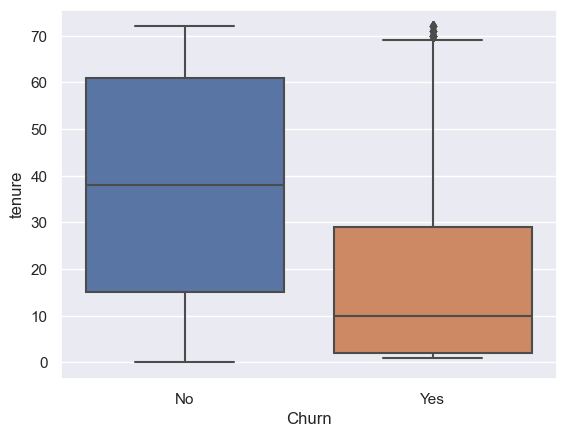

In [63]:
sns.boxplot(x = tcc_df['Churn'], y = tcc_df['tenure'])

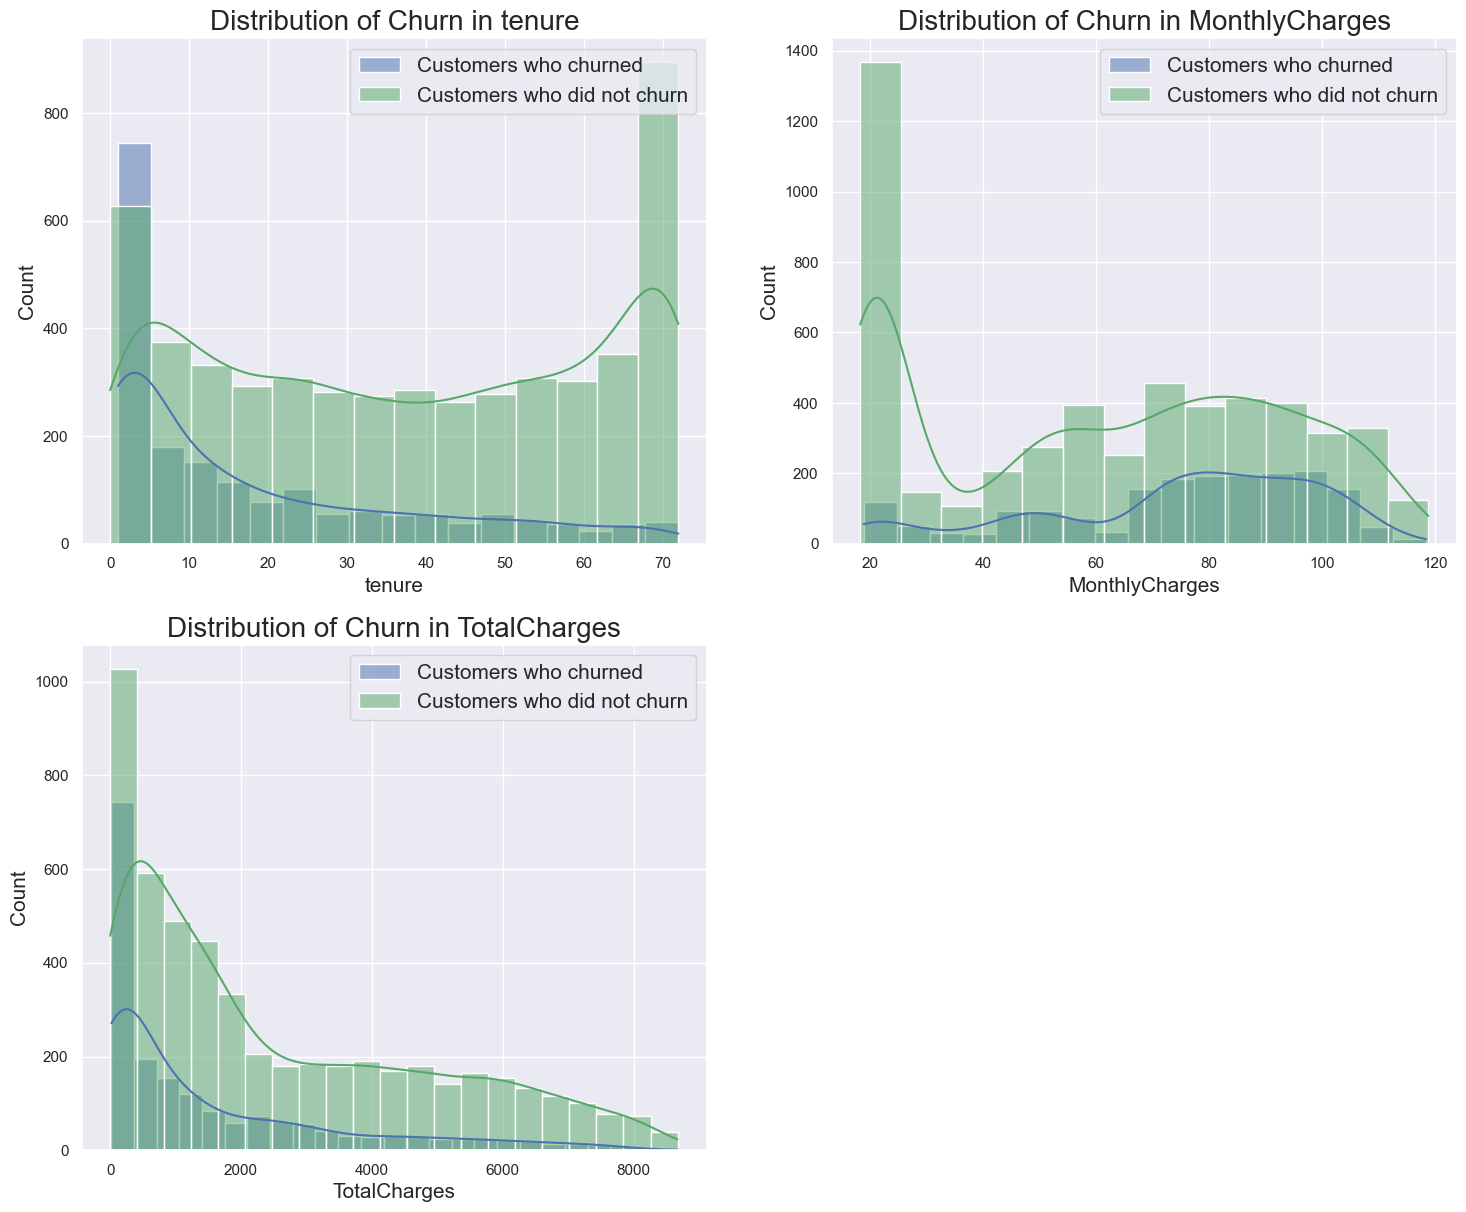

In [64]:
cont_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
churned = tcc_df['Churn'] == 'Yes'
plt.figure(figsize = (10,8))
plt.subplots_adjust(right = 1.5, top = 1.5)

for i, feature in enumerate(cont_features):
    plt.subplot(2,2,i+1)
    sns.histplot(tcc_df[churned][feature], label = 'Customers who churned', kde = True, color = 'b')
    sns.histplot(tcc_df[~churned][feature], label = 'Customers who did not churn', kde = True, color = 'g')
    
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.title('Distribution of Churn in {}'.format(feature), fontsize = 20)
    plt.legend(loc = 'upper right', prop= {'size': 15})
    

## Insights:
### Tenure
- We observe that the count of customers peak at tenure <= 5 months and tenure >= 68 months, with customer count steadily distributed within these boundaries.
- The **number of customers that churned decreases with increasing tenure.** We observe that as tenure increases, the number of customers that churned decreases whereas the number of customers that did not churn decreases then increases.
- Another important observation is that **more than half the customers churn within the tenure of only a few months (<=5 months).** The fraction of customers that churn to the customers that don't churn decreases steadily as the tenure increases.
- As the tenure increases to over 40, the count of customers that did not churn increases and shows a **peak at around tenure = 70 months.** This indicates that **afer about 40 months, the company is able to steadily convert more and more customers to loyal customers.**
### MonthlyCharges
- We observe a **peak at the count of customers for lowest monthly charges and that maximum of these customers do not churn.**
- Also, **for monthly charges < 80, the count of customers that churned is less than half of the count of customers that did not churn. For 80 < monthly charges < 105, the count of customers that churned is almost half of the count of customers that did not churn. And for monthly charges > 105, the count of customers that churned is again less than half of the count of customers that did not churn.
- Therefore, **we observe that maximum customers that churn lie in the range 70 < monthly charges < 105.**
### Total Charges
- **Both the number of customers that churned and the number of customers that did not churn decreases with increase in TotalCharges** and follow a similar looking distribution. It indicates that company is not able to achieve an increase in high paying customers.
- We also observe that **the count/percentage of customers that churn decreases as the TotalCharges increases. This also indicates the presence of loyal customers.**


## Bivariate analysis on categorical and continuous features

In [65]:
tcc_df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  
0              29.85         29.85    No  
1              56.95       1889.50    No  
2              53.85        108.15   Yes  
3              42.30       1840.75    No  
4              70.70        151.65   Yes  
...              ...           ...   ...  
7038           84.80       1990.50    No  
7039          103.20       7362.90    No  
7040           29.60        346.45    No  
7041           74.40        306.60   Yes  
7042          105.65       6844.50    No  

[7043 rows x 21 columns]

## 1) categorical variables wrt tenure

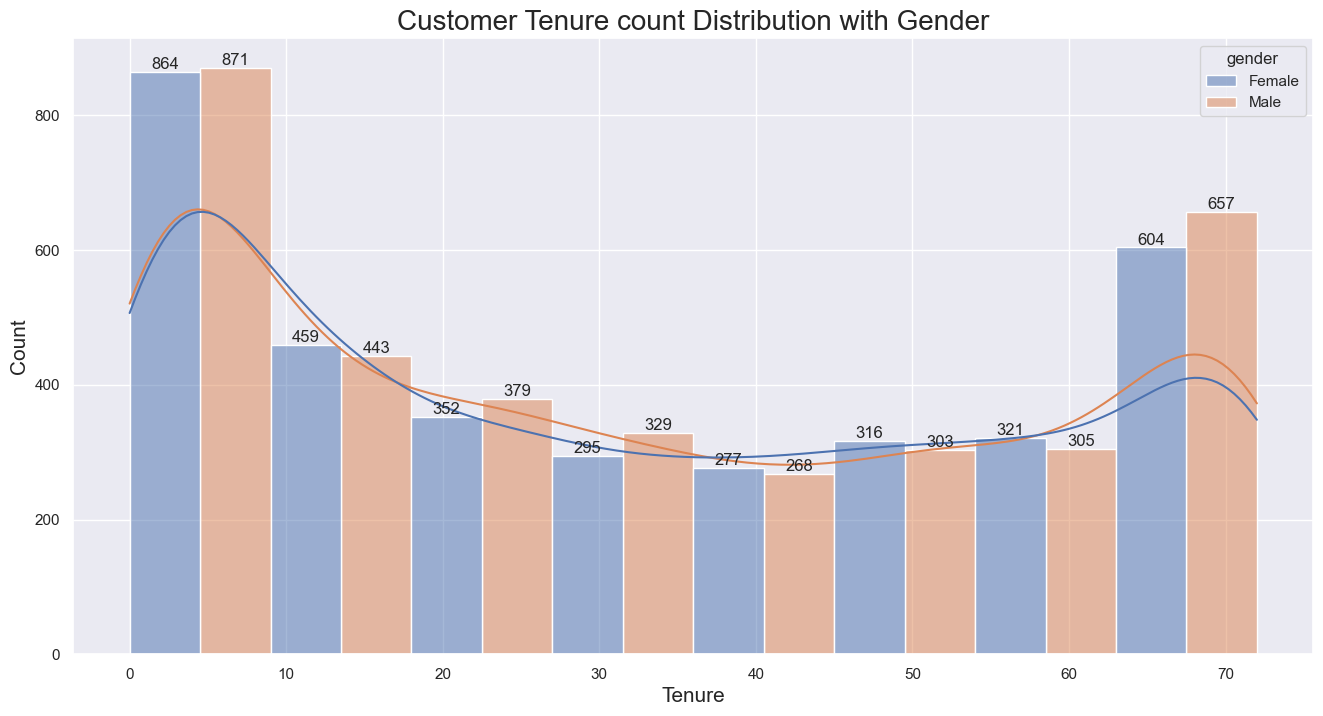

In [66]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['gender'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Distribution with Gender', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

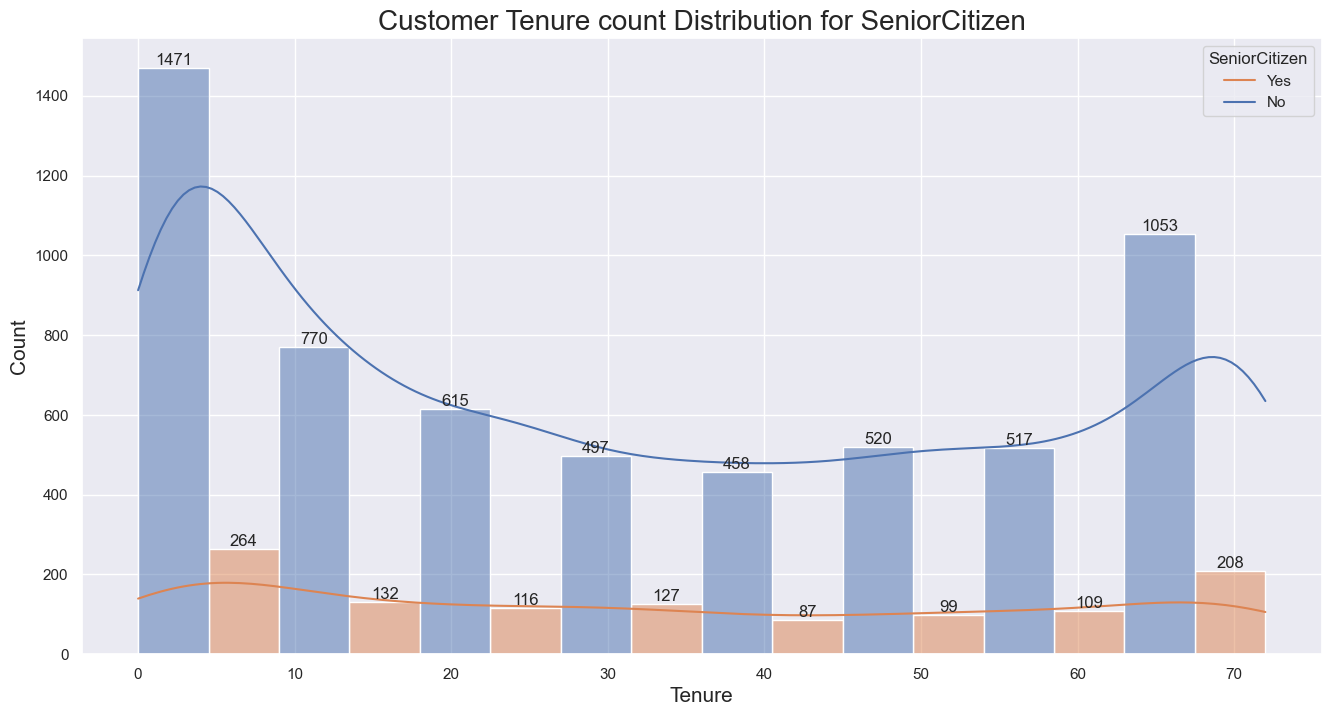

In [131]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['SeniorCitizen'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Distribution for SeniorCitizen', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(['Yes','No'], title = 'SeniorCitizen')
for i in range(2):
    ax.bar_label(ax.containers[i])

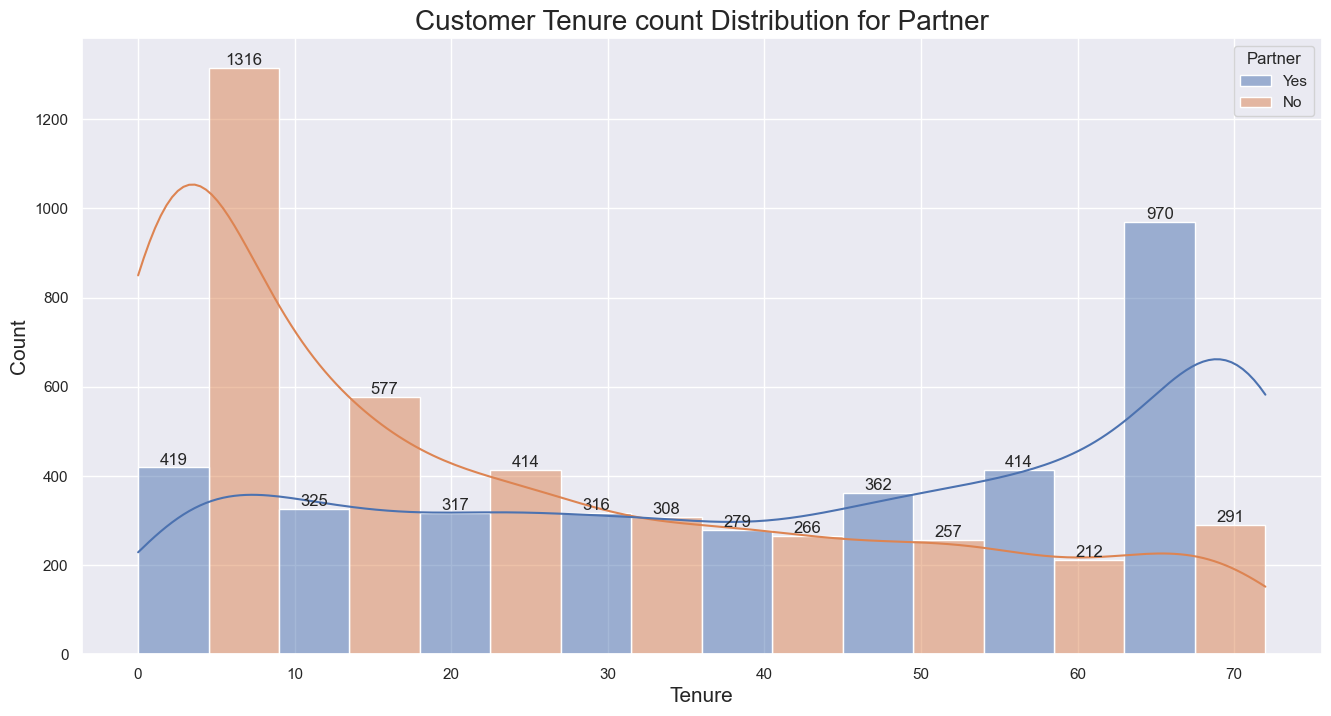

In [68]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['Partner'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Distribution for Partner', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

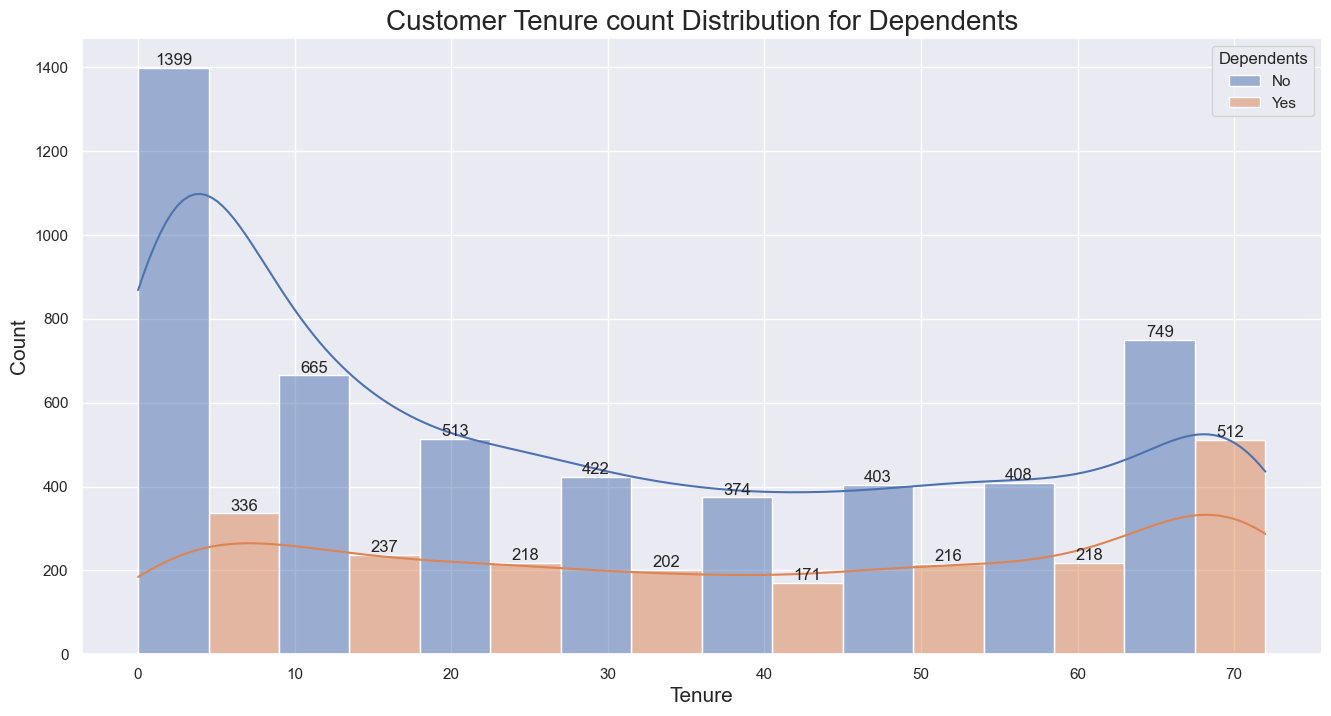

In [69]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['Dependents'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Distribution for Dependents', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

## Insights:
- **Customer Tenure count distribution Curve with Gender: Female or Male is almost completely alike.** Female to Male ratio of customers is almost 1.
### Gender does not affect the Tenure of a Customer.
- **Customer Tenure count distribution Curve for SeniorCitizen is also somewhat similar for customers who are senior citizens are who are not.** Although the count of customers who are not Senior Citizens is always greater, **since number of customers who are Senior Citizens is comparatively lesser than who are not.**
- **For both gender and SeniorCitizen, we also observe that the count of customers peak at tenure <= 5 months and tenure >= 68 months, with customer count steadily distributed within these boundaries.**
### Senior Citizen or Not does not affect the Tenure of a Customer.
- The **Customer Tenure count distribution for customers WITHOUT partners is an almost decreasing curve as tenure increases**, with a significant **peak in Customer count for Tenure less than 10 months.**
- The **Customer Tenure count distribution for customers WITH partners is almost steady at first and then an increasing curve**, with a significant **peak in Customer count for Tenure over 63 months.**
### It seems that customers who have Partners are more likely to become long-term customers and customers who do not have partners are more likely to become short-term customers.
- The **Customer Tenure count distribution curve for customers WITHOUT dependents and for customers WITH dependents differ at minimum (<9 months) and maximum (>63 months) tenure.** 
- We observe a significant **peak in Customer count for Tenure less than 10 months in the Customer Tenure count distribution curve for customers WITHOUT dependents.**
- We observe a significant **peak in Customer count for Tenure over 63 months in the Customer Tenure count distribution curve for customers WITH dependents.**
### It seems that customers who do not have Dependents have a higher tendency to become short-term customers than customers with dependents.

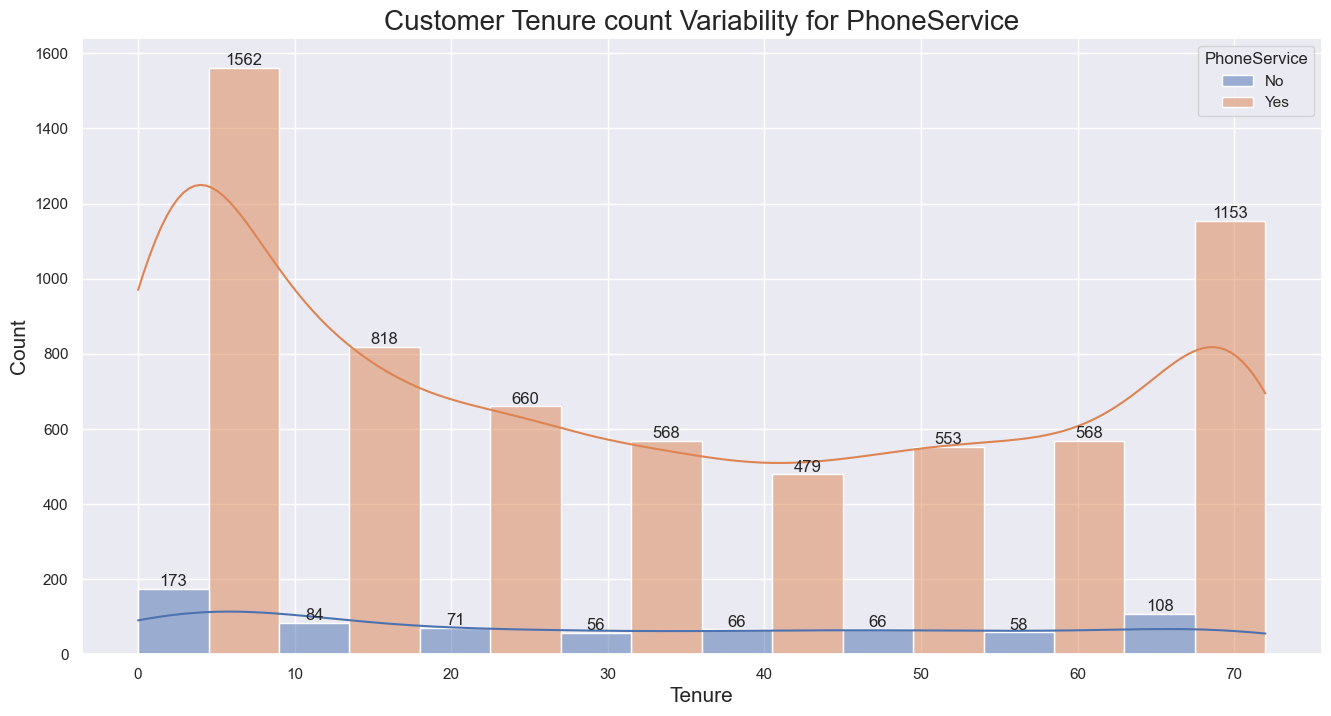

In [70]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['PhoneService'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for PhoneService', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

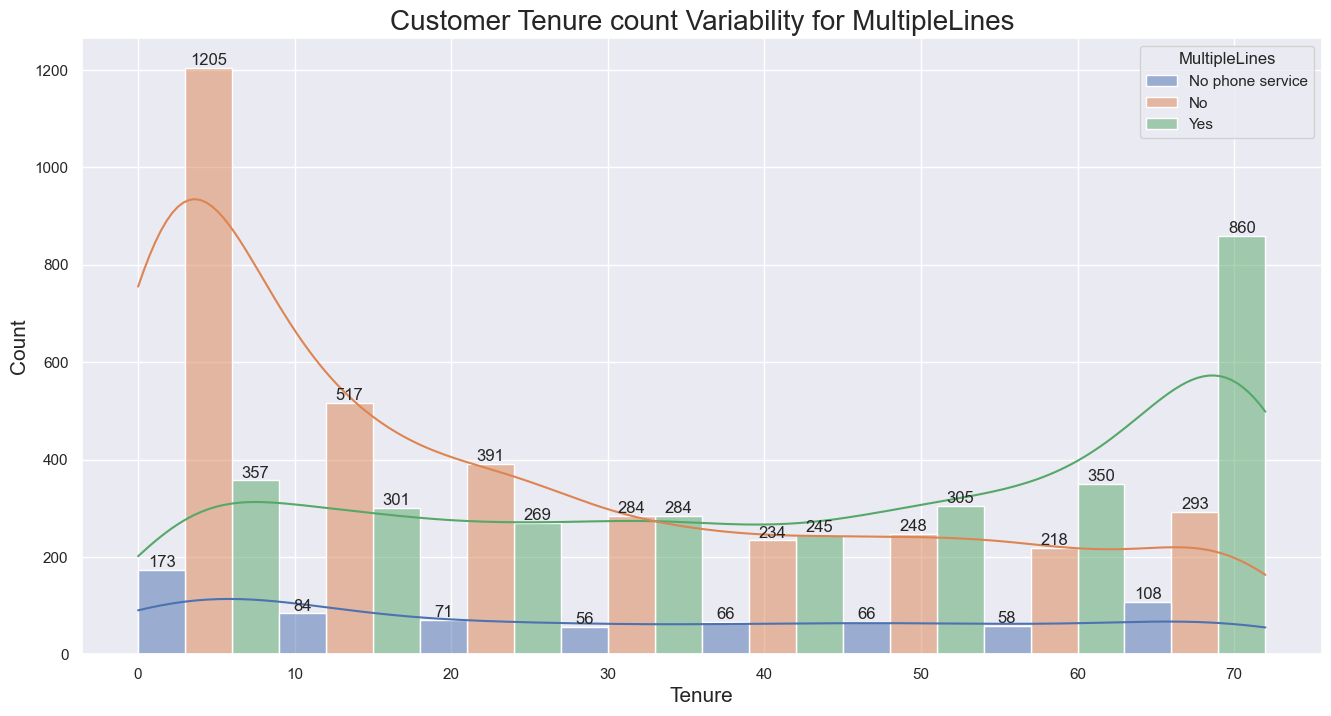

In [71]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['MultipleLines'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for MultipleLines', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

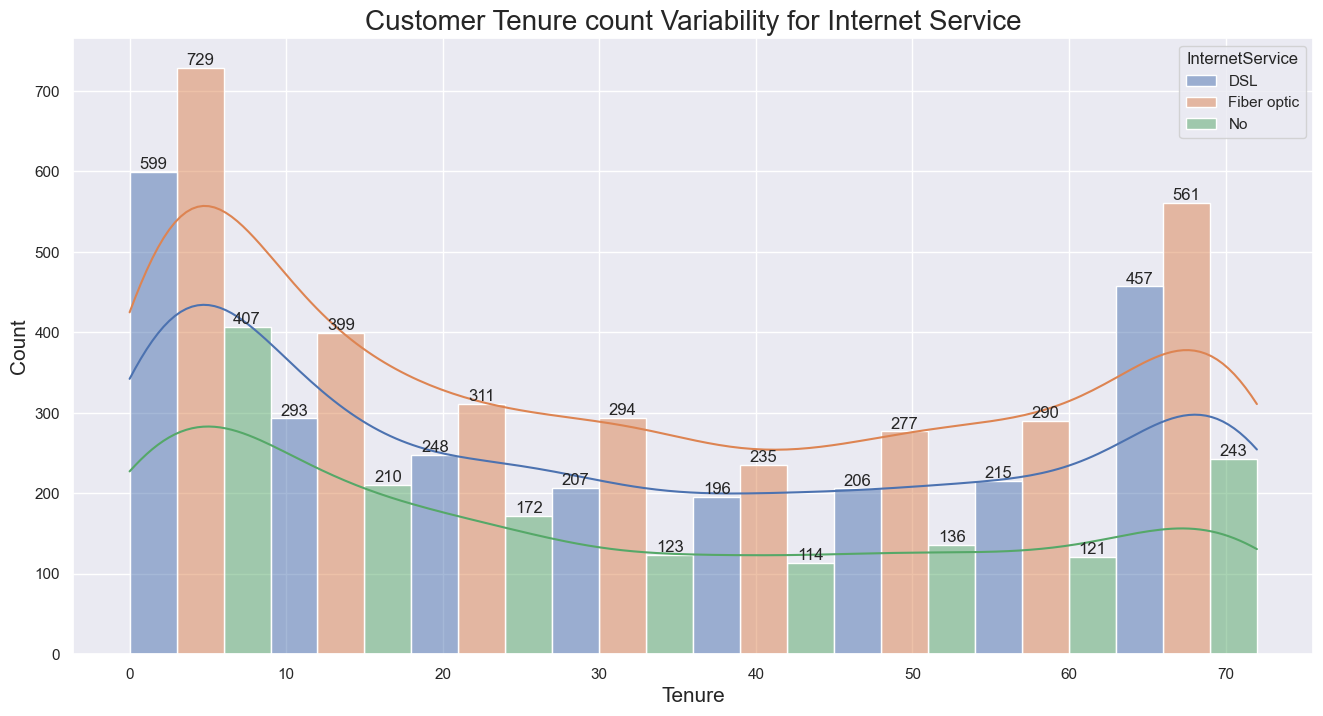

In [88]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['InternetService'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Internet Service', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

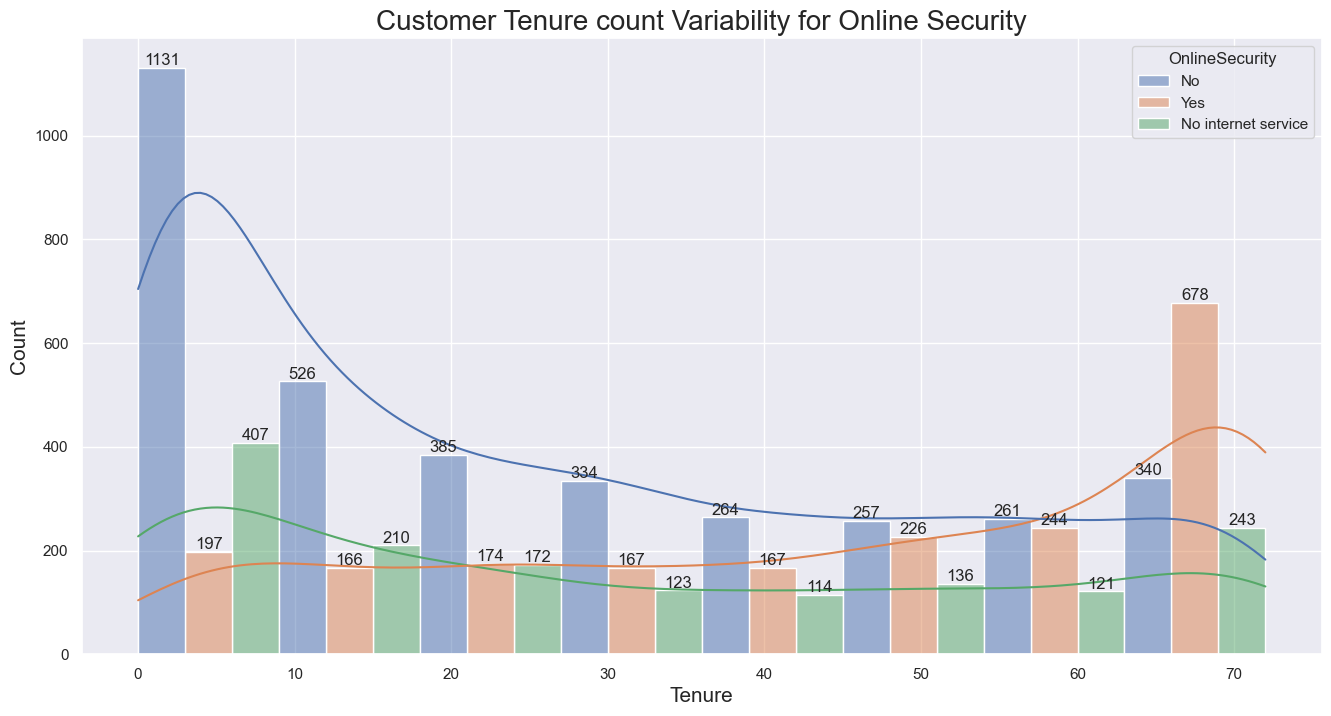

In [90]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['OnlineSecurity'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Online Security', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

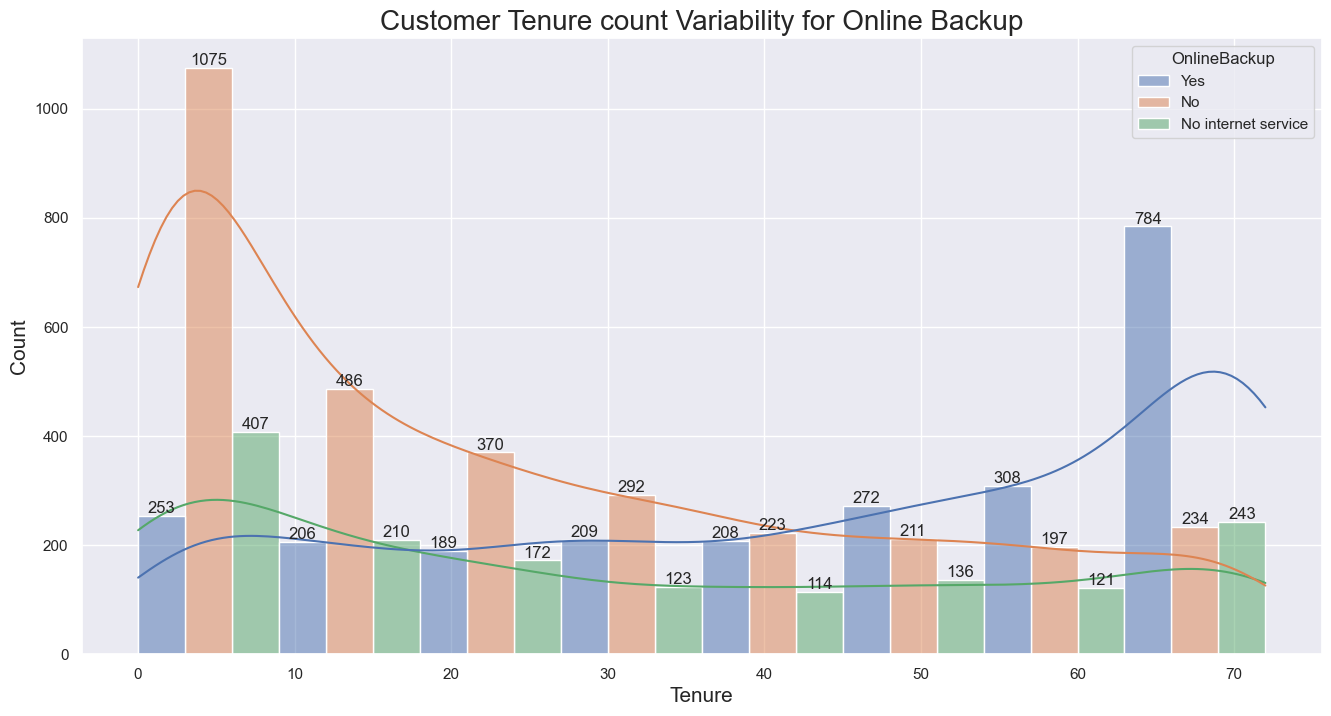

In [91]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['OnlineBackup'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Online Backup', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

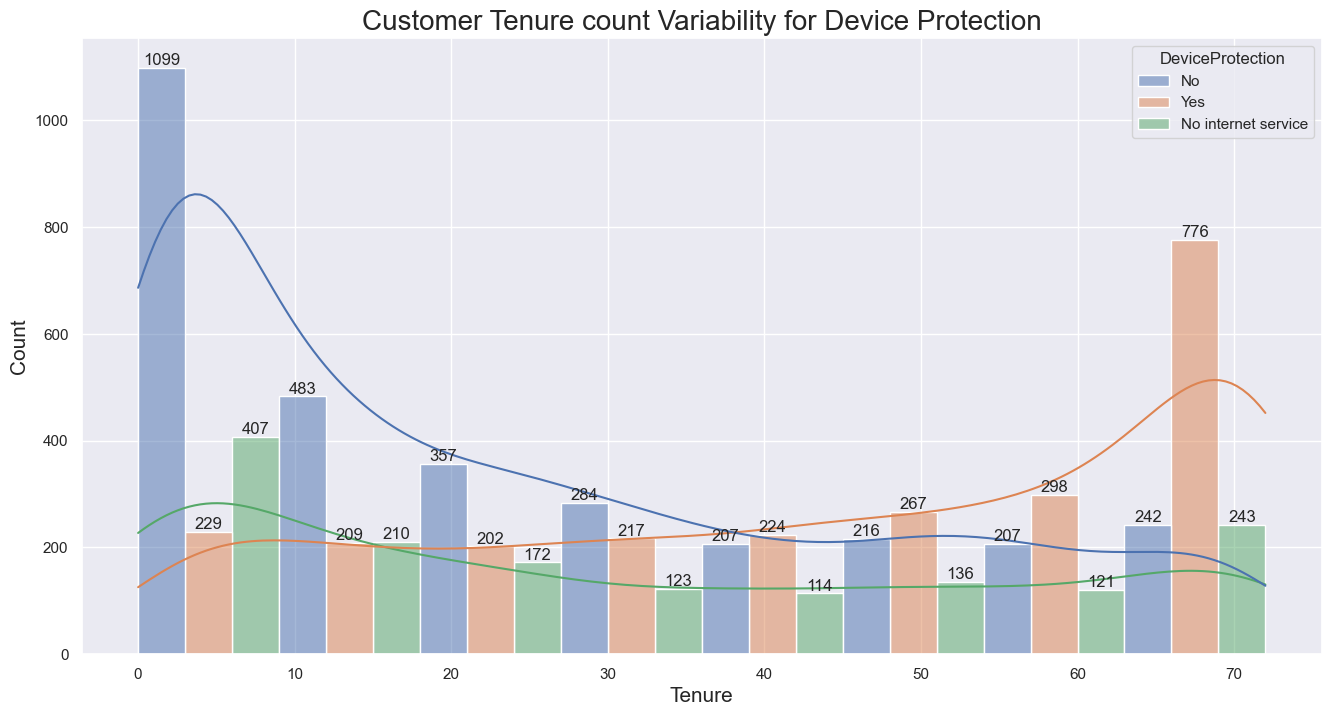

In [93]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['DeviceProtection'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Device Protection', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

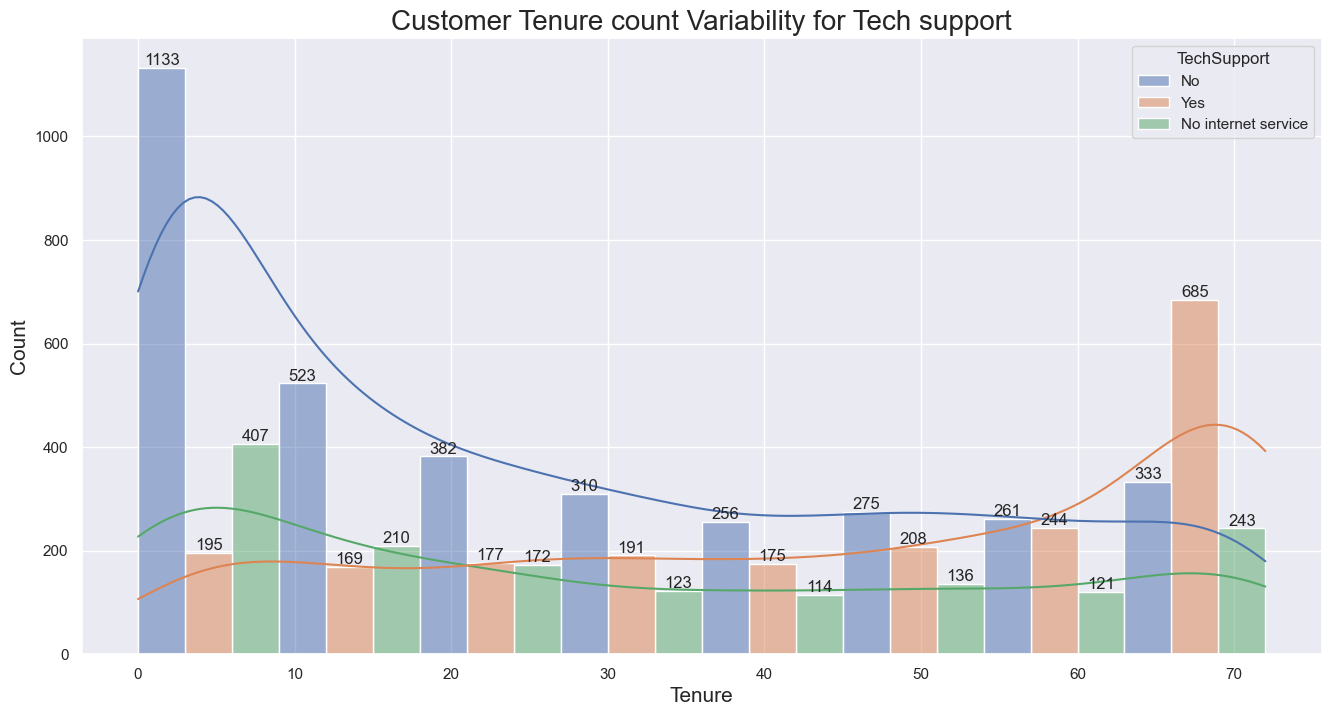

In [94]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['TechSupport'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Tech support', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

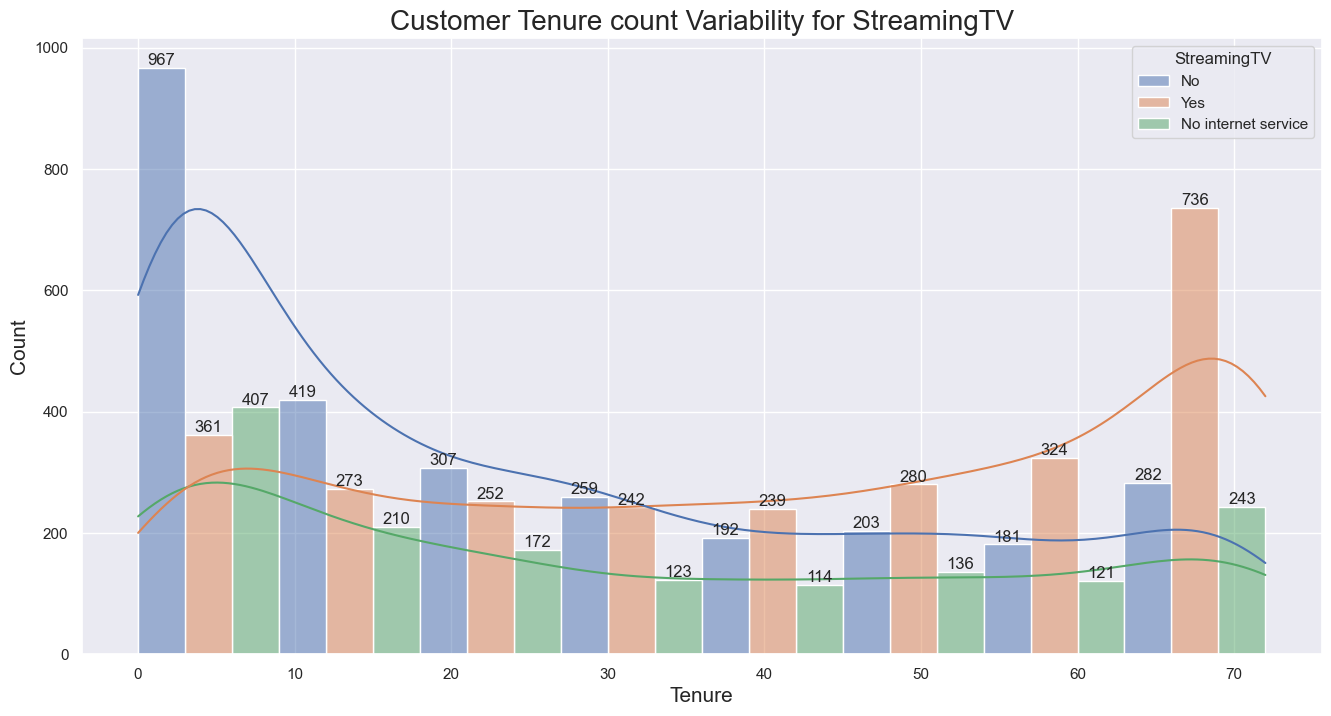

In [95]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['StreamingTV'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for StreamingTV', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

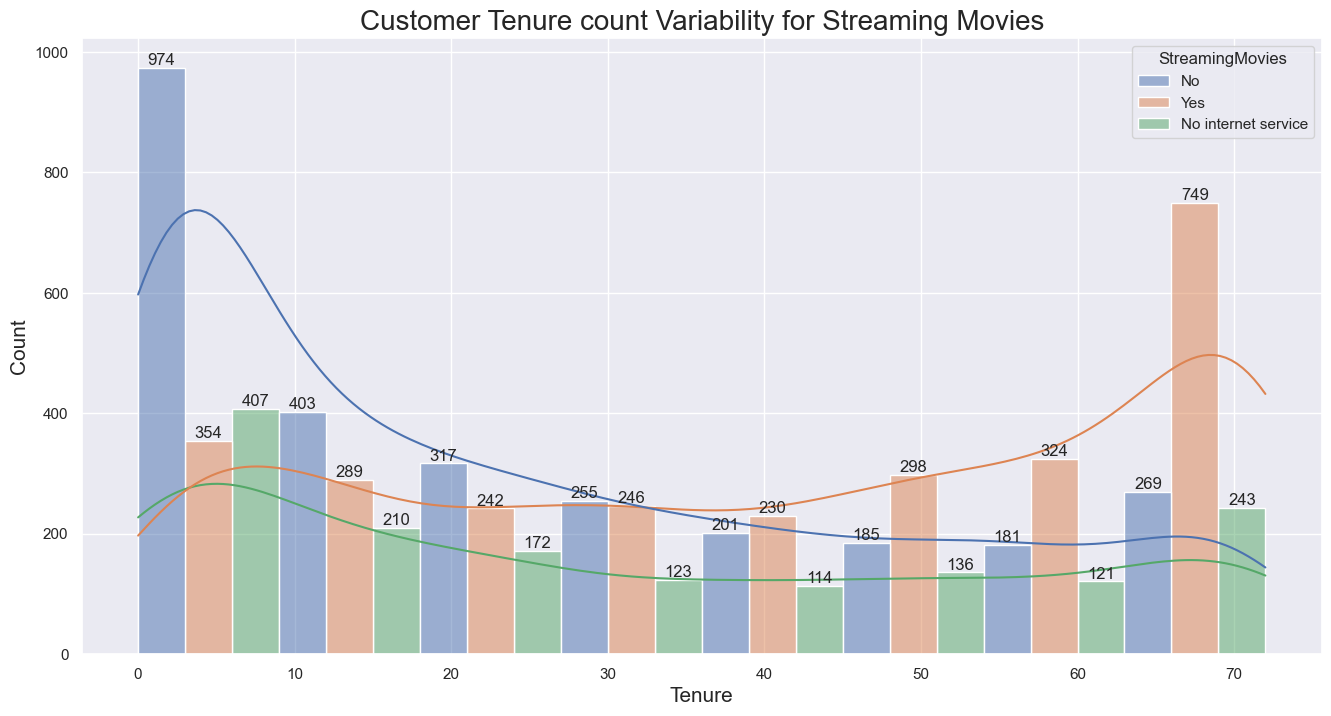

In [96]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['StreamingMovies'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Streaming Movies', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

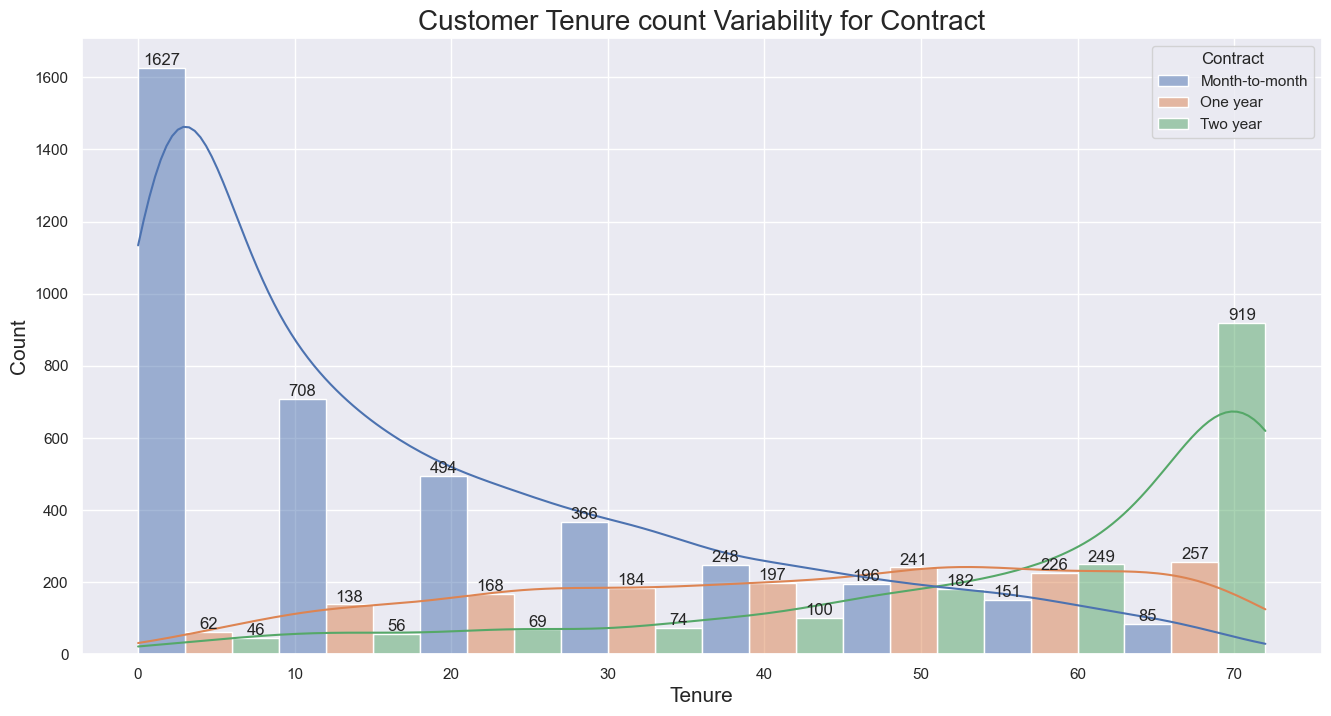

In [97]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['Contract'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Contract', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

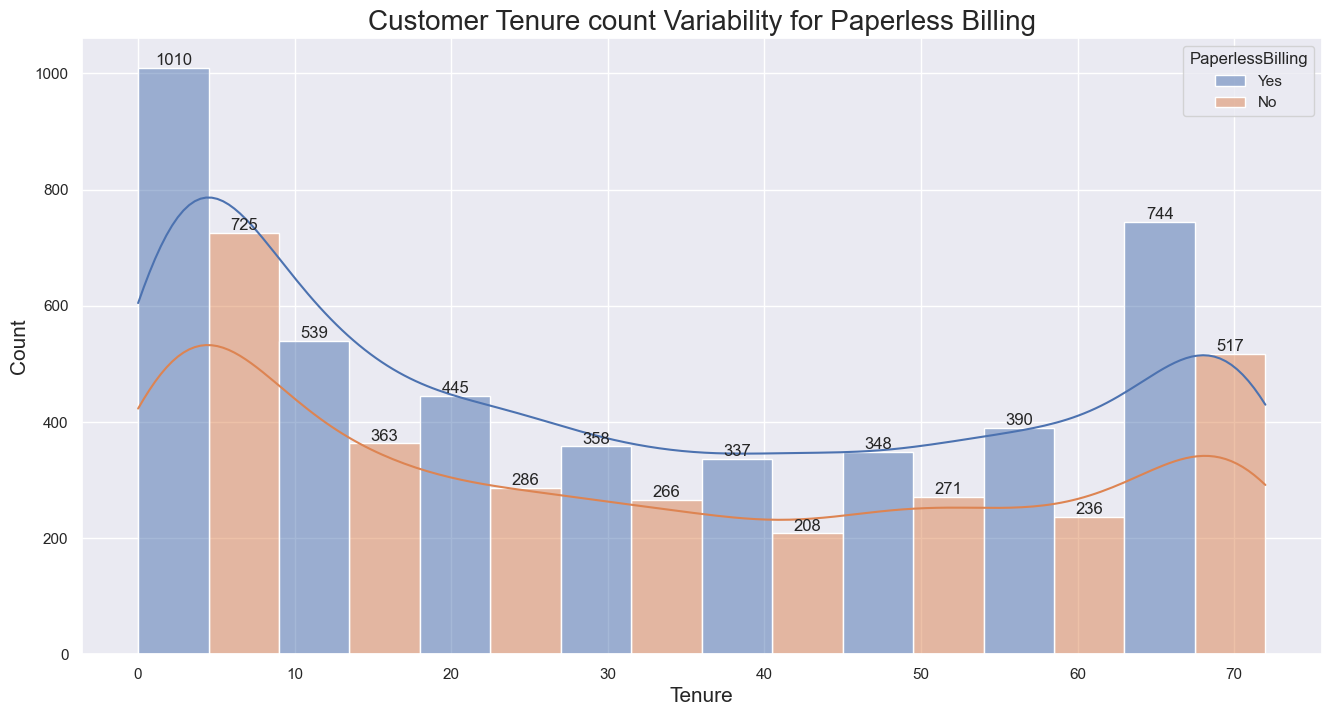

In [99]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['PaperlessBilling'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Paperless Billing', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

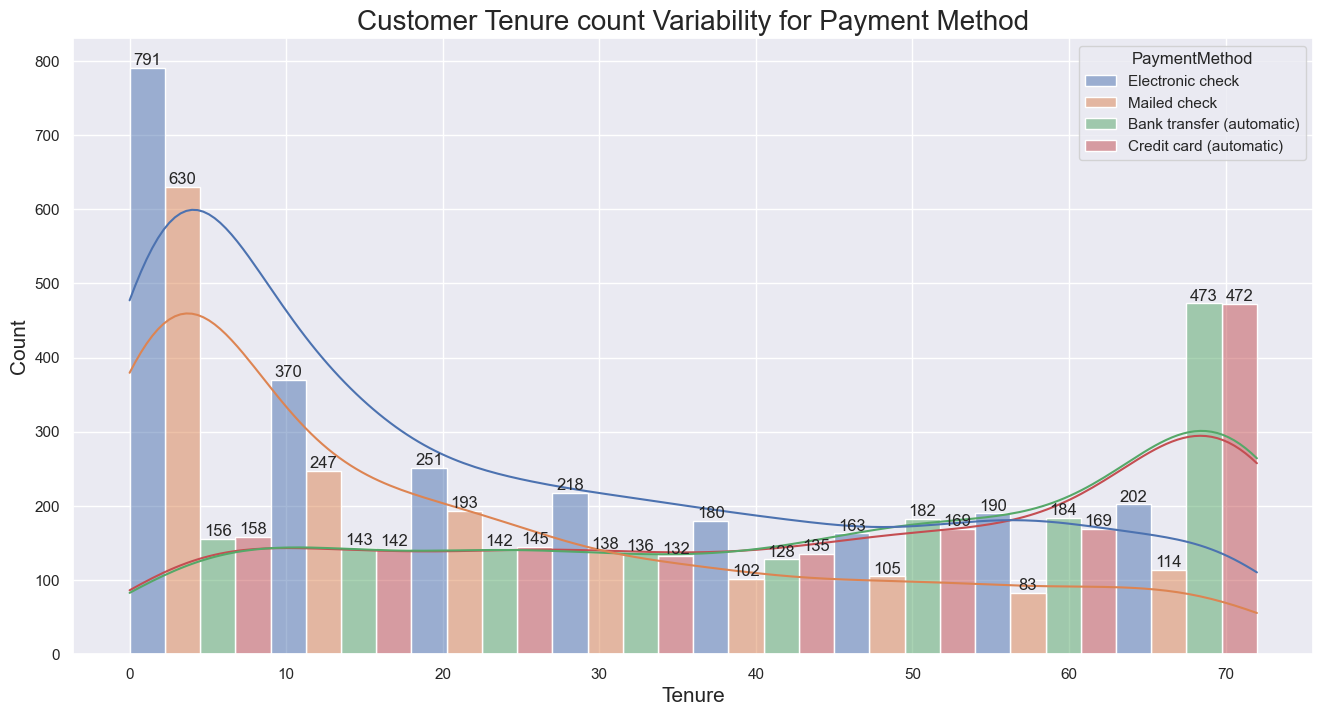

In [101]:
plt.figure(figsize = (16,8))
ax = sns.histplot(x = tcc_df['tenure'], bins = 8, hue = tcc_df['PaymentMethod'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Tenure count Variability for Payment Method', fontsize = 20)
plt.xlabel('Tenure', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(4):
    ax.bar_label(ax.containers[i])

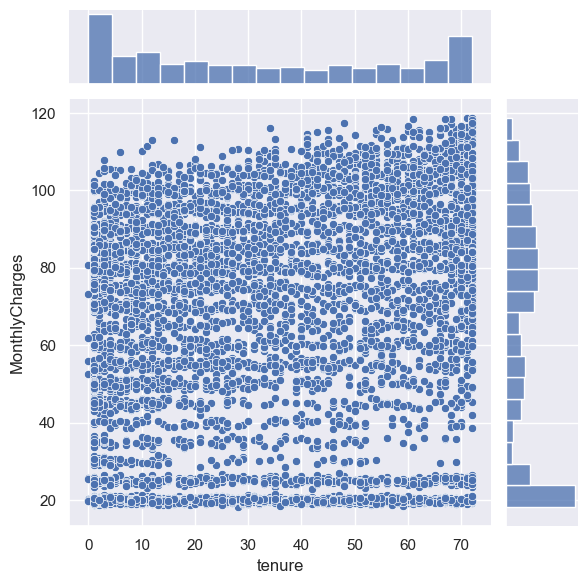

In [105]:
sns.jointplot(x = tcc_df['tenure'], y = tcc_df['MonthlyCharges'])

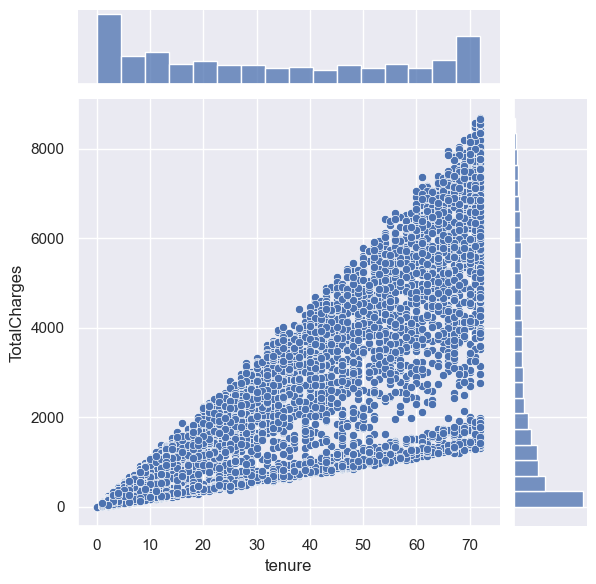

In [106]:
sns.jointplot(x = tcc_df['tenure'], y = tcc_df['TotalCharges'])

## Insights:
- Customers **without Phone service seem to be constant** over the range of tenure.
- We observe customers with **hghest tenures to have Multiple Lines**, whereas customers **without multiple lines decreases with increasing tenure.**
### Customers should be encouraged to get or offered multiple lines to retain them for longer periods.
- **Internet Service** distrbution over tenure seems almost **similar** for all types of customers.
- Customers with **Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies** seem to have **higher tenures** and an increase in it's distributon.
### Customers should be encouraged to get features such as: Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies to retain them for longer periods.
- Customers with **Month-to-month Contracts** do not tend to be long-time customers. **Majority of customers with highest tenures have a two year contract.**
### Customers should be encouraged to take one year or two year contacts.
- Customers with/without **Paperless Billing** have a **similar distribution** over tenure.
- **More customers tend to automatic bank transfer/ credit card payment methods as their tenure increases. Short-term customers prefer electronic/mailed check.**
- There is no decipherable relationship between monthly charges and tenure.
- Total charges increases wth tenure (as expected).

## 2) categorical variables wrt MonthlyCharges

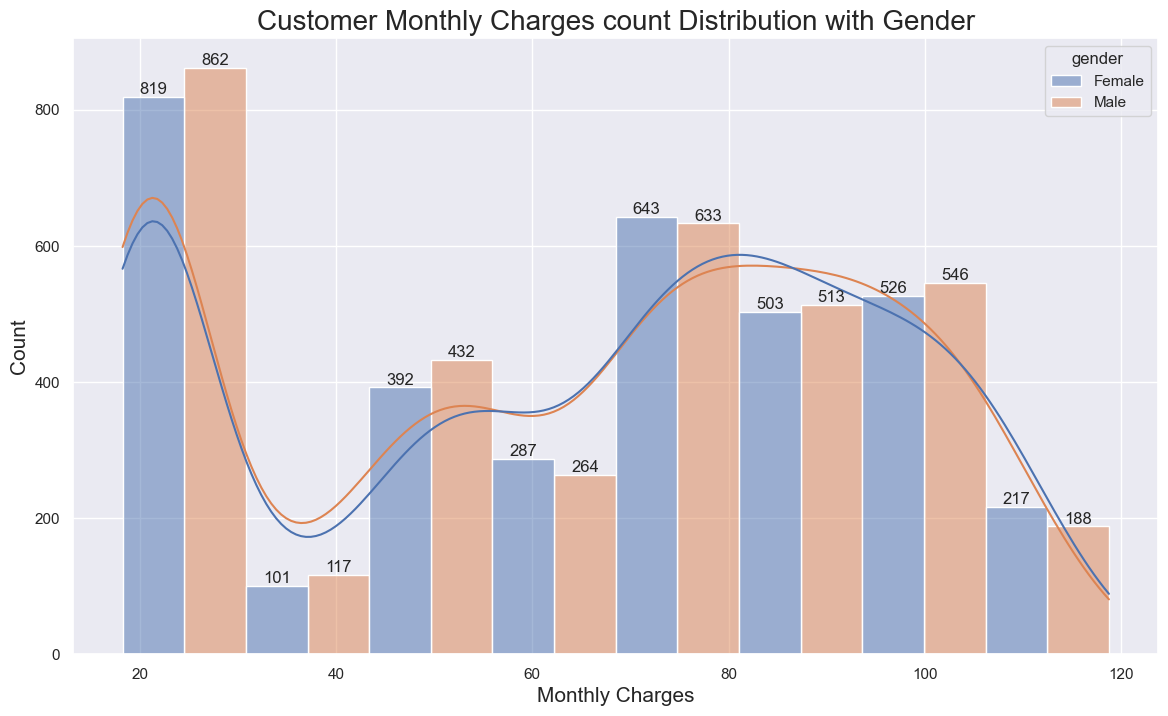

In [108]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['gender'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Gender', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

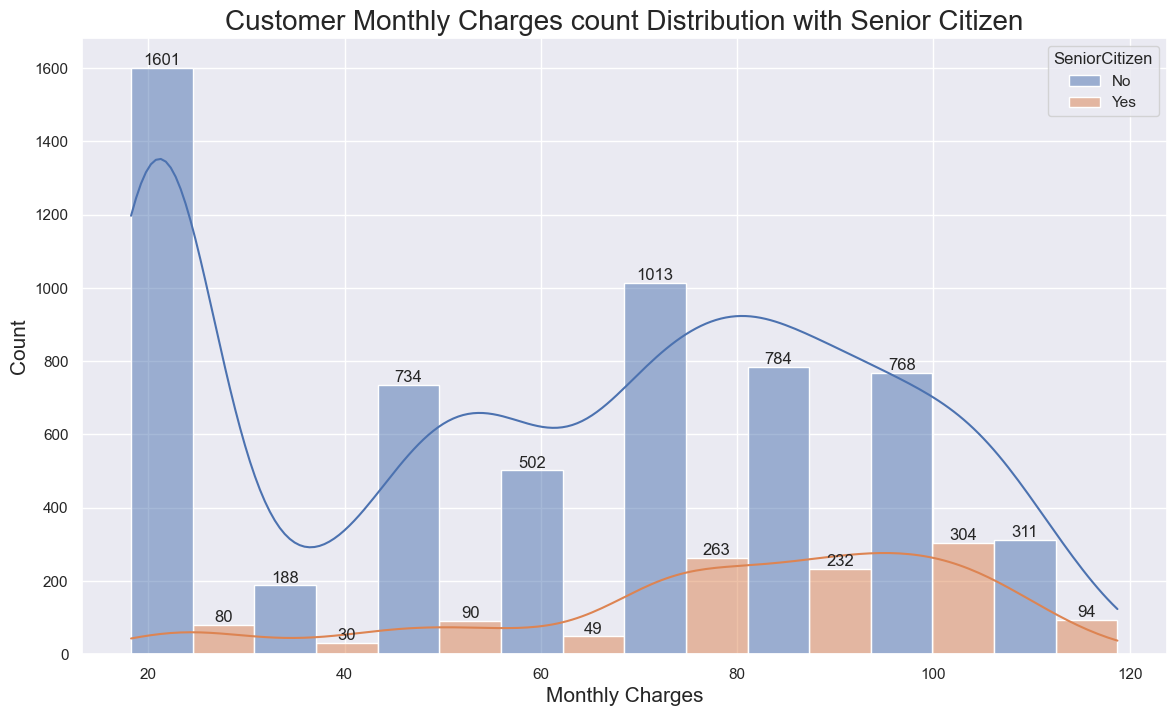

In [132]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['SeniorCitizen'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Senior Citizen', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

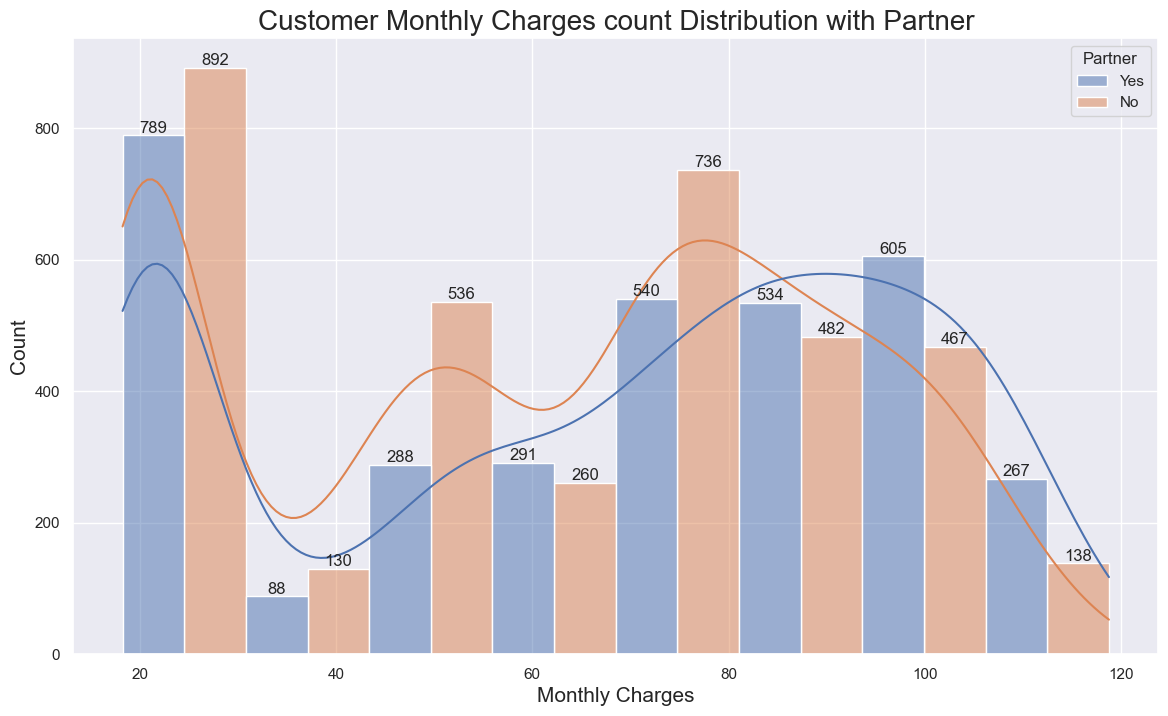

In [133]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['Partner'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Partner', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

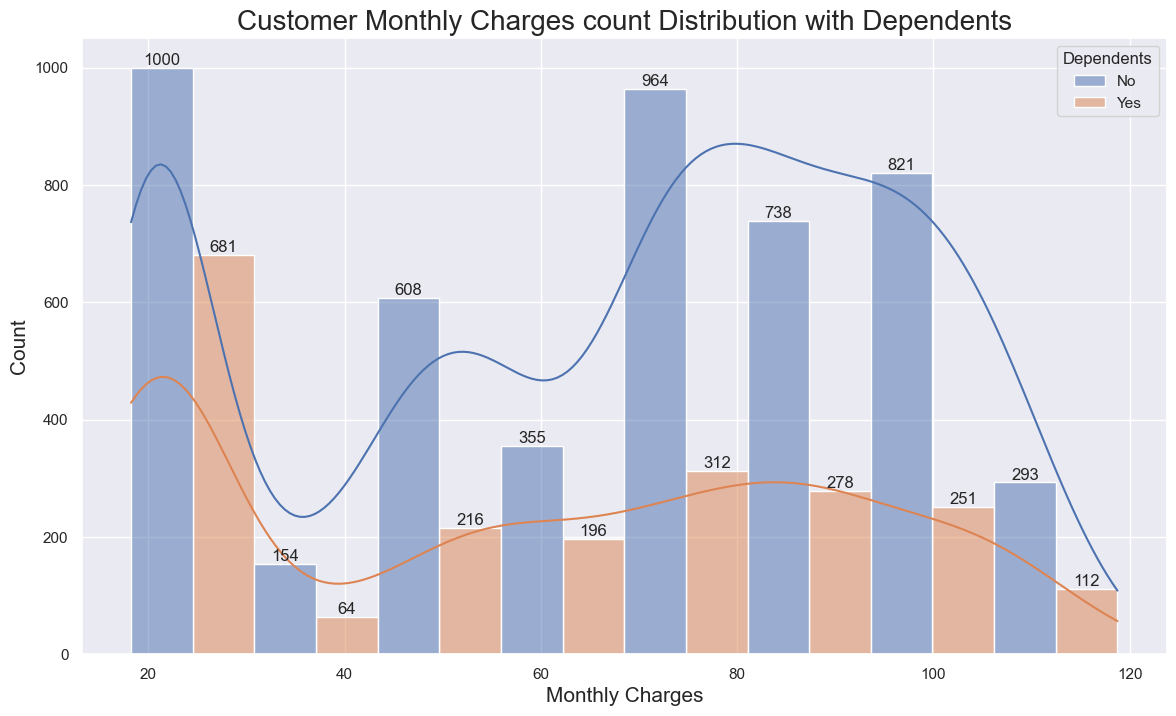

In [134]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['Dependents'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Dependents', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

## Insights:
- **Customer MonthlyCharges distribution Curve with Gender: Female or Male is almost completely alike.** Female to Male ratio of customers is almost unity.
### Gender does not affect the Monthly Charges of a Customer.
- **Customer MonthlyCharges distribution Curve for SeniorCitizen is also somewhat similar for customers who are senior citizens are who are not.** Although the count of customers who are not Senior Citizens is always greater, **since number of customers who are Senior Citizens is comparatively lesser than who are not.**
- **Although, we notice that customers that are not senior citizen do tend more towards lower monthly charges.**
### Senior Citizen or Not does not greatly affect the Monthly Charges of a Customer.
- **Customer MonthlyCharges distribution Curve with Partners is almost completely alike.** 
### Partner does not affect the Monthly Charges of a Customer.
- **Customer MonthlyCharges distribution Curve with Dependents is almost completely alike.** 
### Dependents does not affect the Monthly Charges of a Customer.

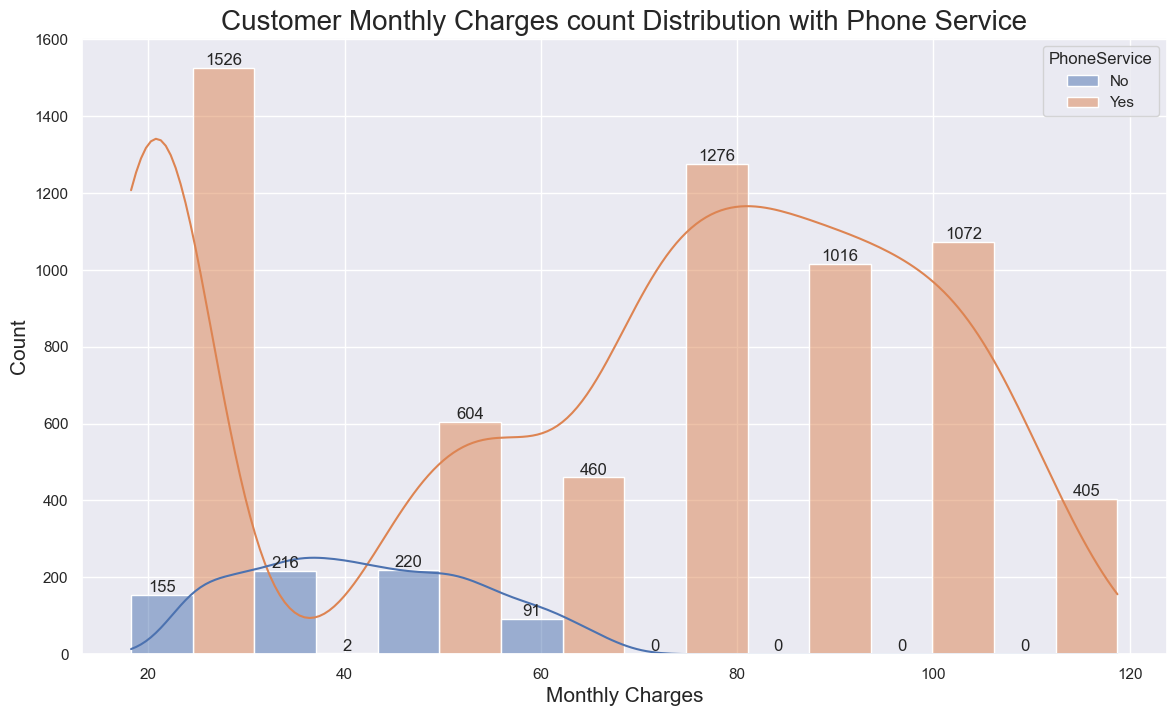

In [136]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['PhoneService'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Phone Service', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

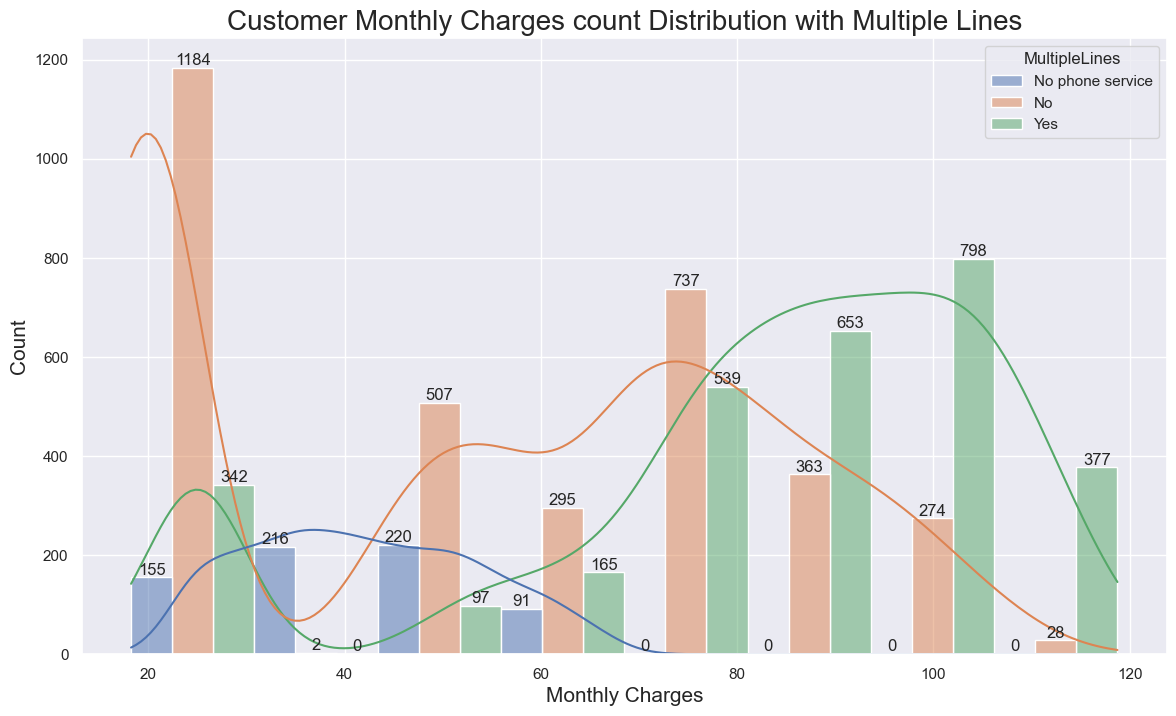

In [138]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['MultipleLines'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Multiple Lines', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

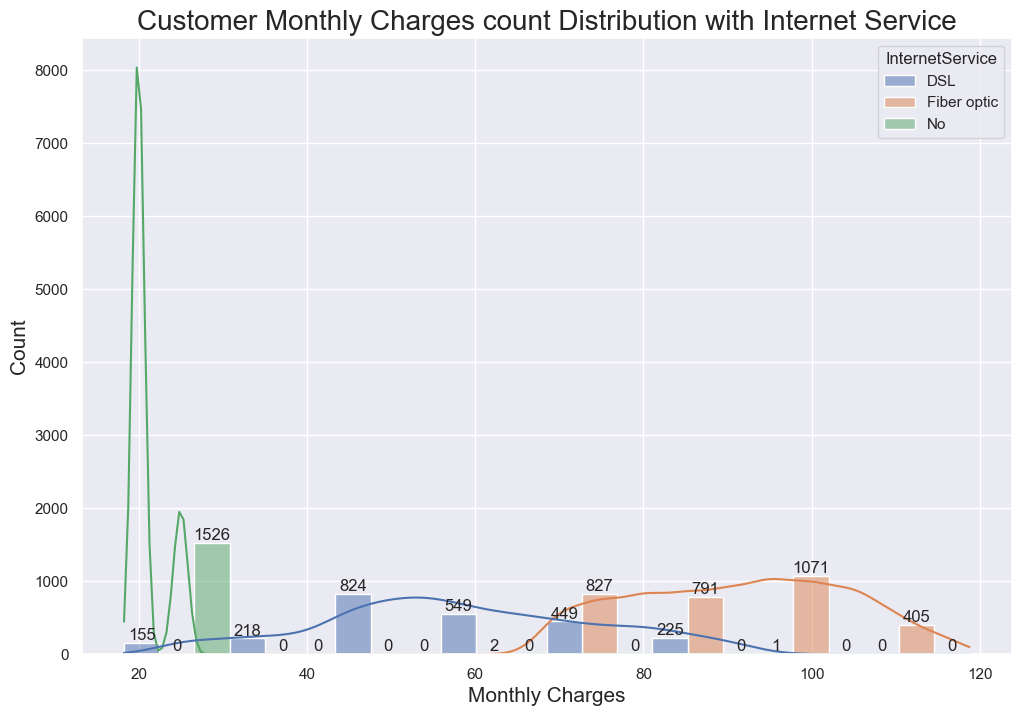

In [148]:
plt.figure(figsize = (12,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['InternetService'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Internet Service', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

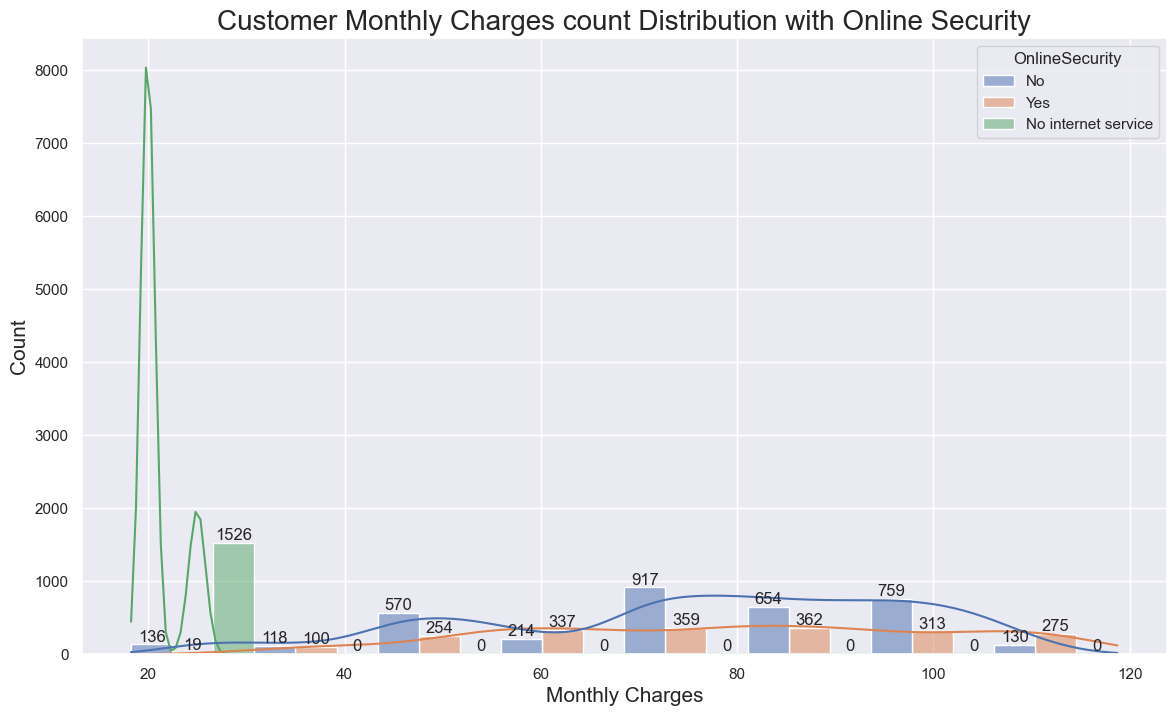

In [142]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['OnlineSecurity'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Online Security', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

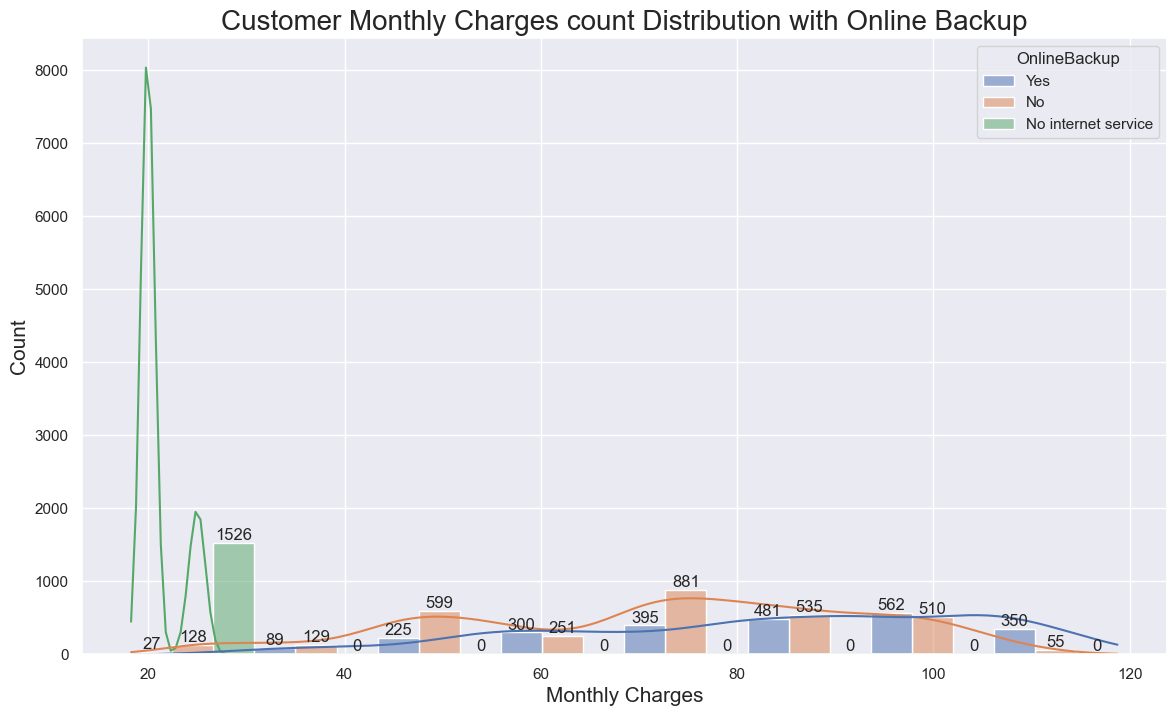

In [144]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['OnlineBackup'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Online Backup', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

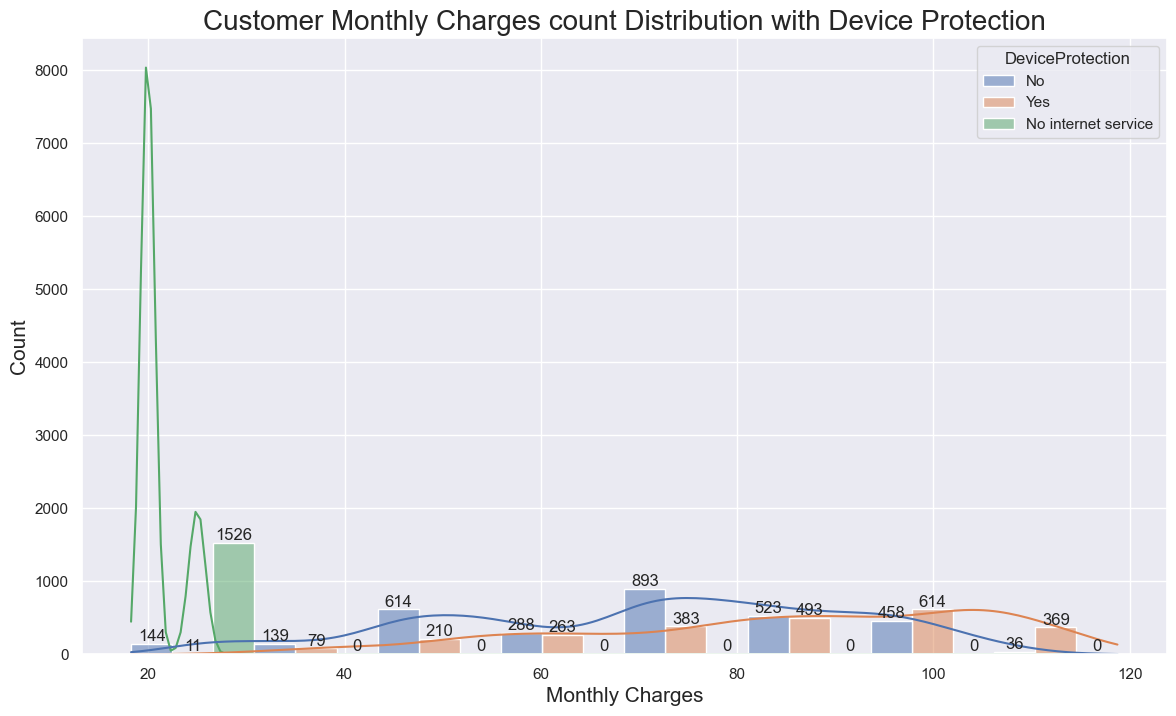

In [145]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['DeviceProtection'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Device Protection', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

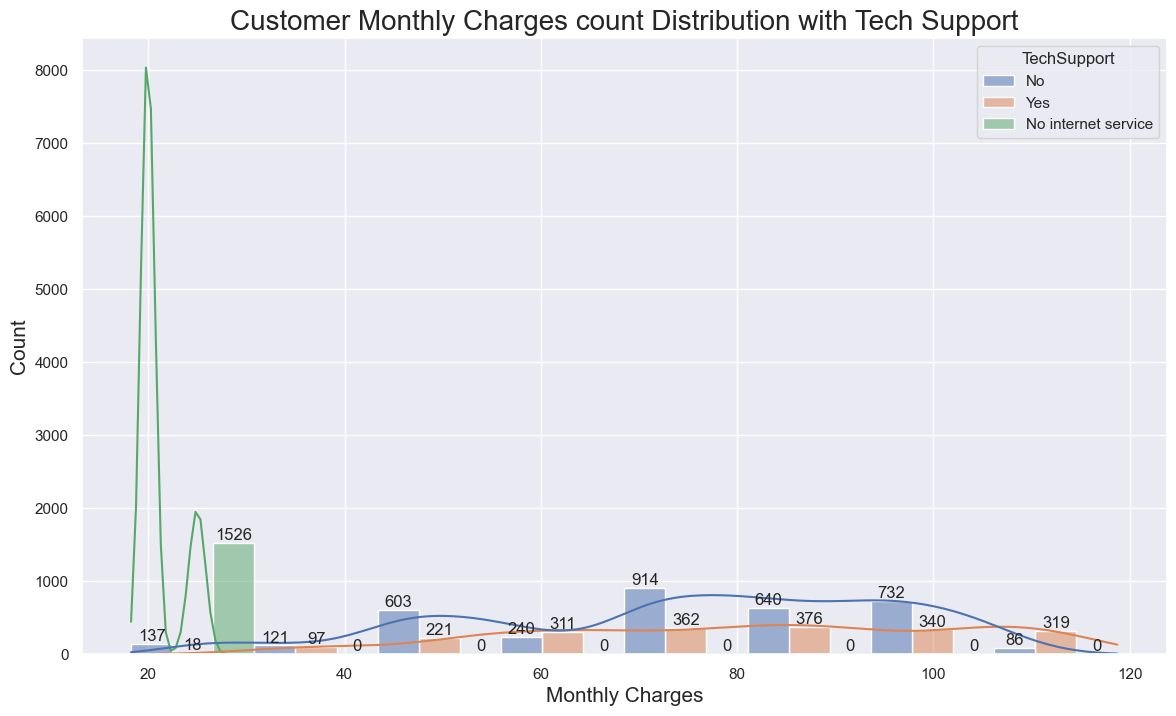

In [150]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['TechSupport'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Tech Support', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

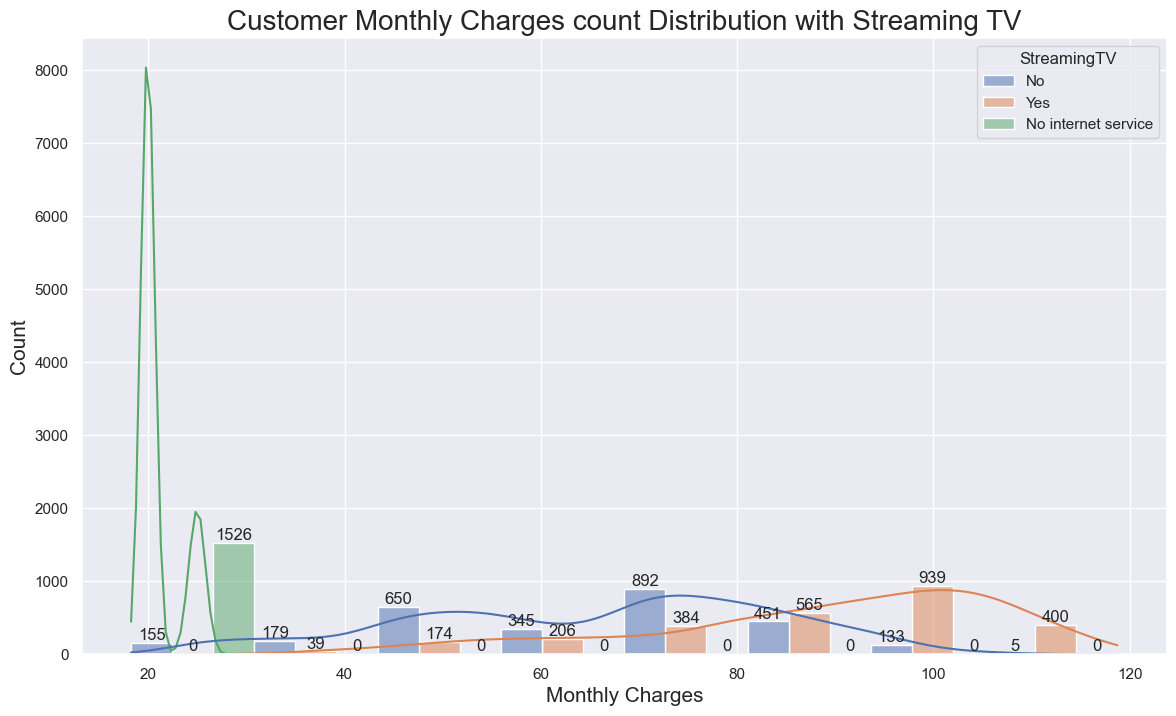

In [154]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['StreamingTV'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Streaming TV', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

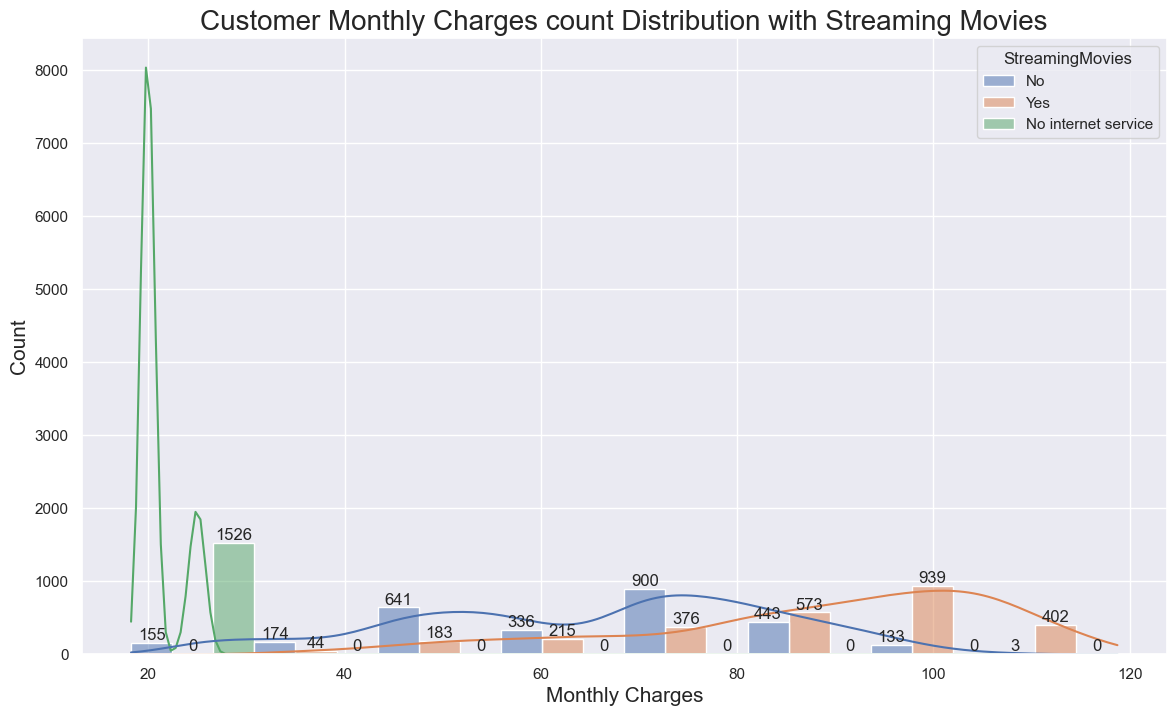

In [153]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['StreamingMovies'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Streaming Movies', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

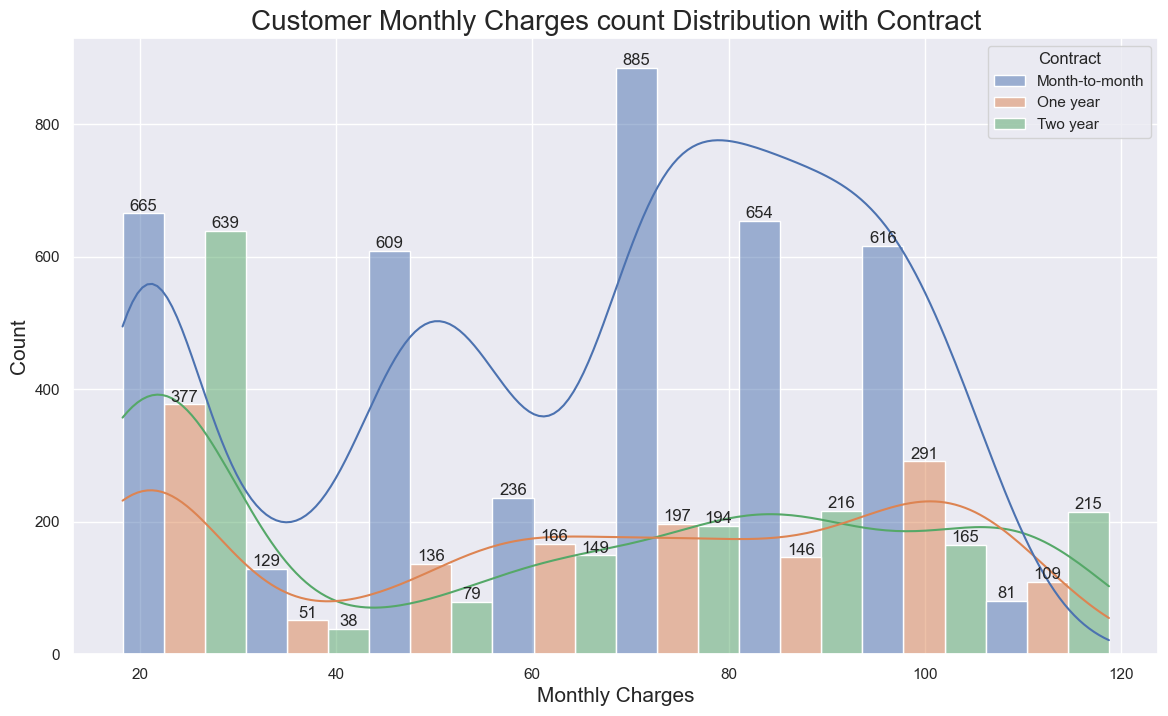

In [157]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['Contract'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Contract', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

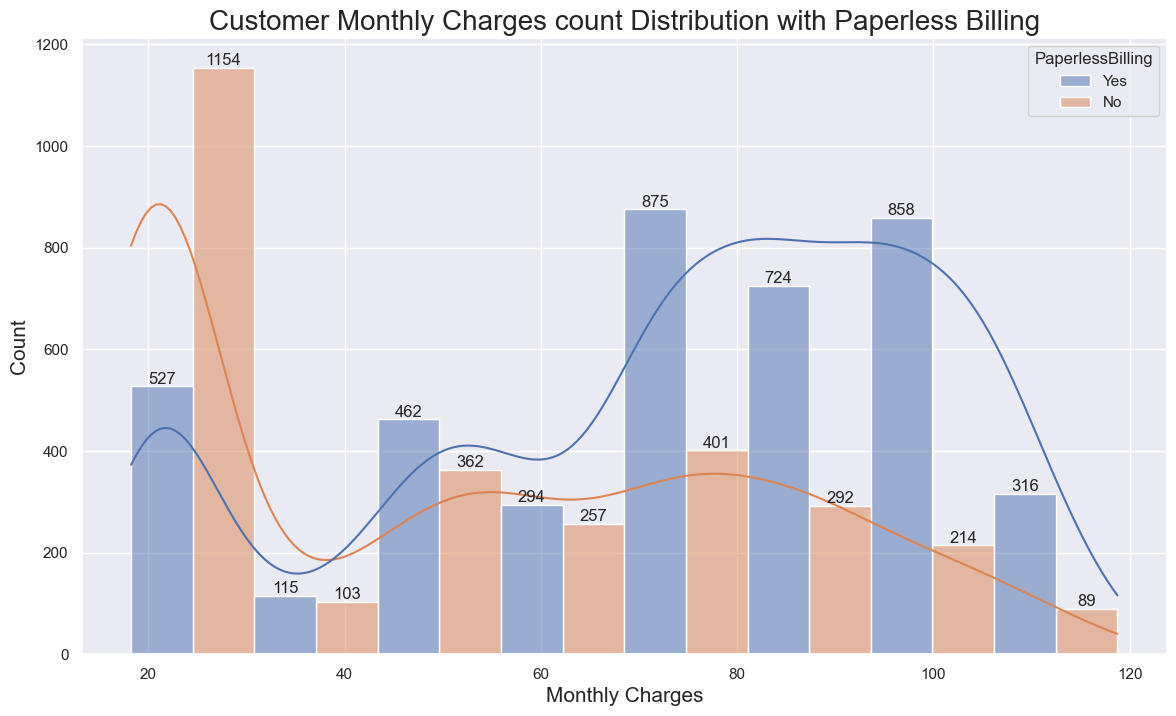

In [158]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['PaperlessBilling'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Paperless Billing', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

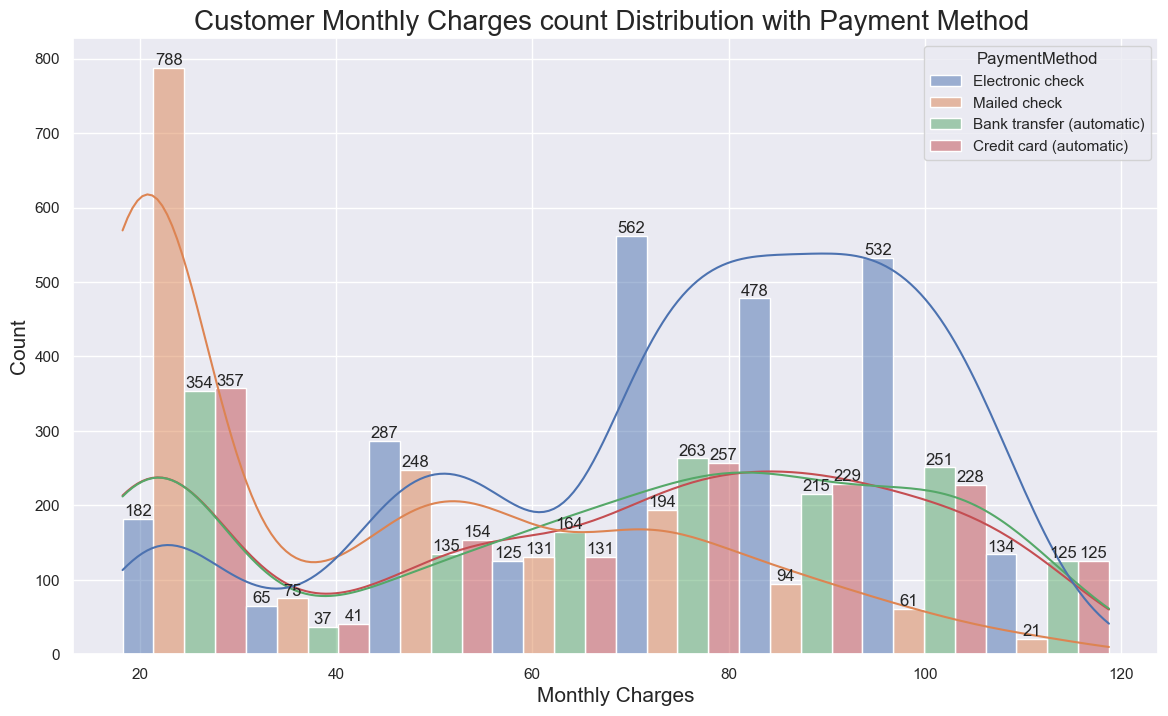

In [160]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['MonthlyCharges'], bins = 8, hue = tcc_df['PaymentMethod'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Monthly Charges count Distribution with Payment Method ', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(4):
    ax.bar_label(ax.containers[i])

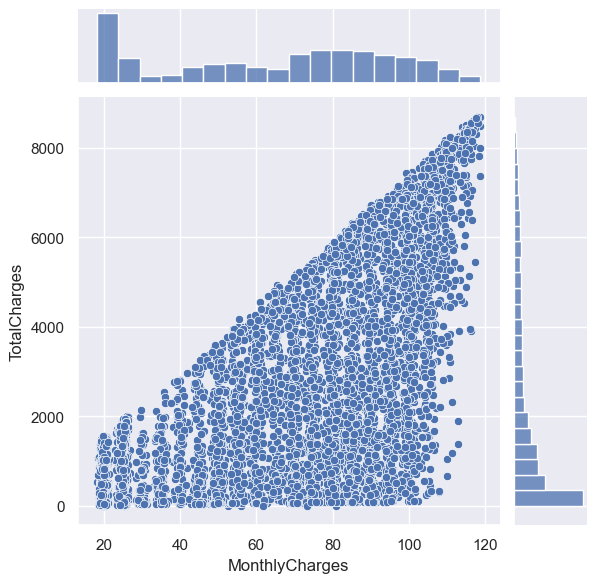

In [161]:
sns.jointplot(x = tcc_df['MonthlyCharges'], y = tcc_df['TotalCharges'])

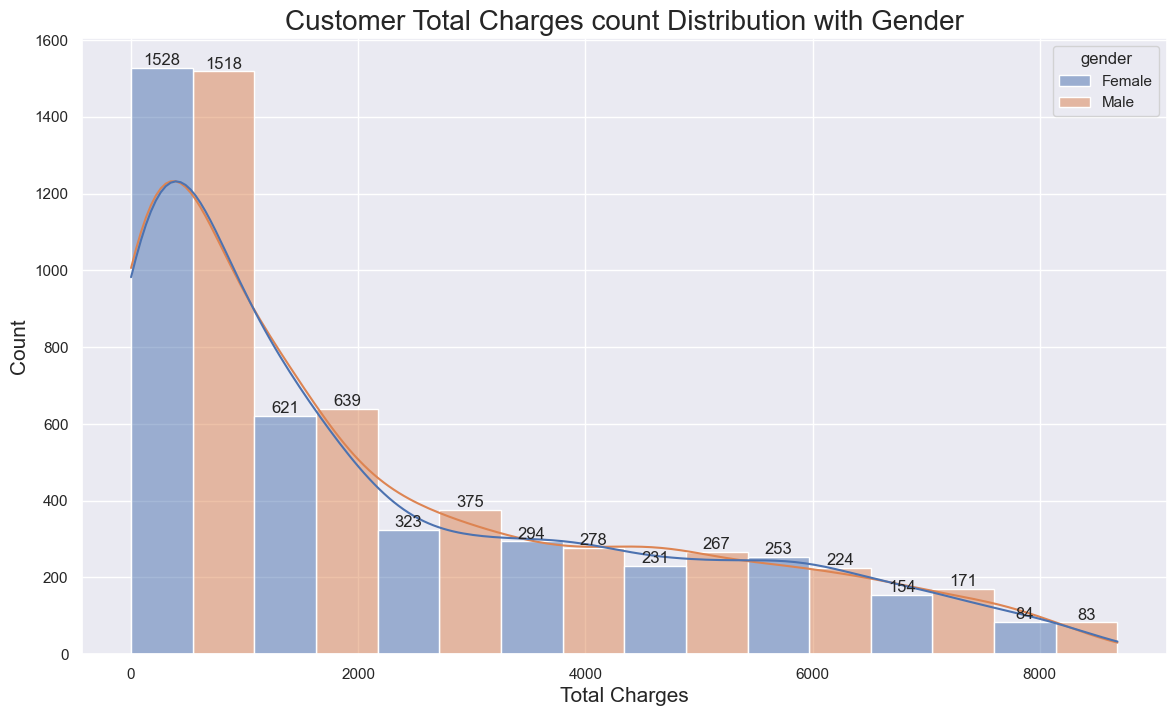

In [165]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['gender'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Gender', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

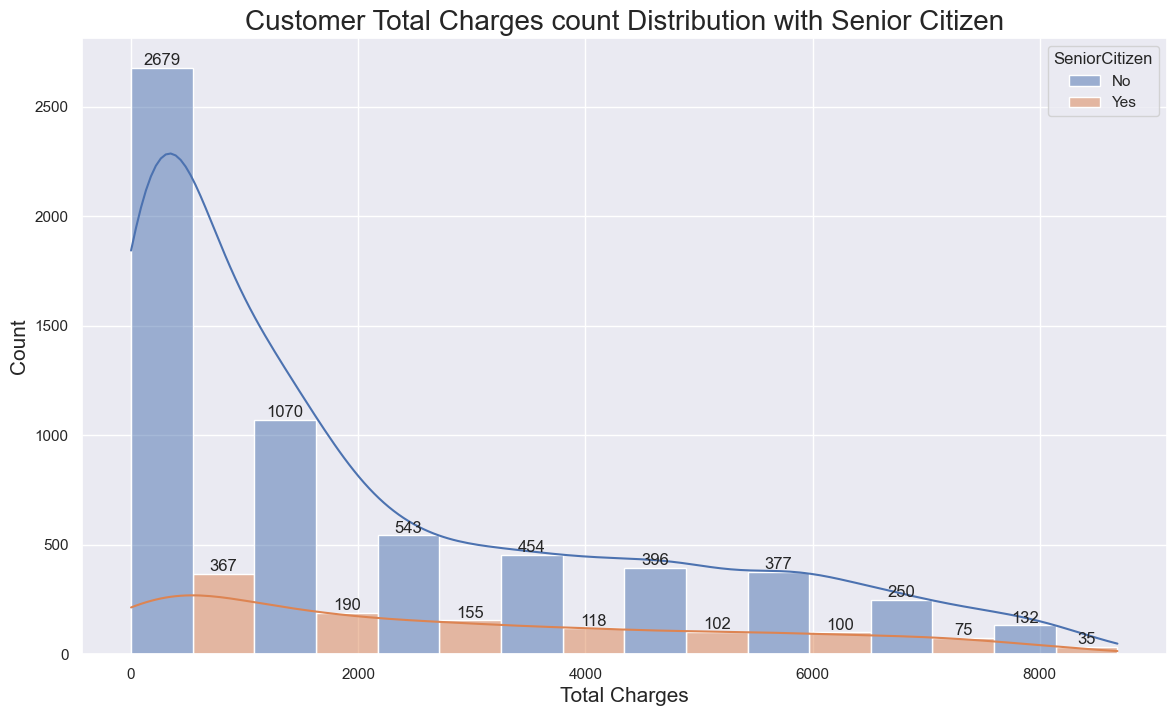

In [166]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['SeniorCitizen'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Senior Citizen', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

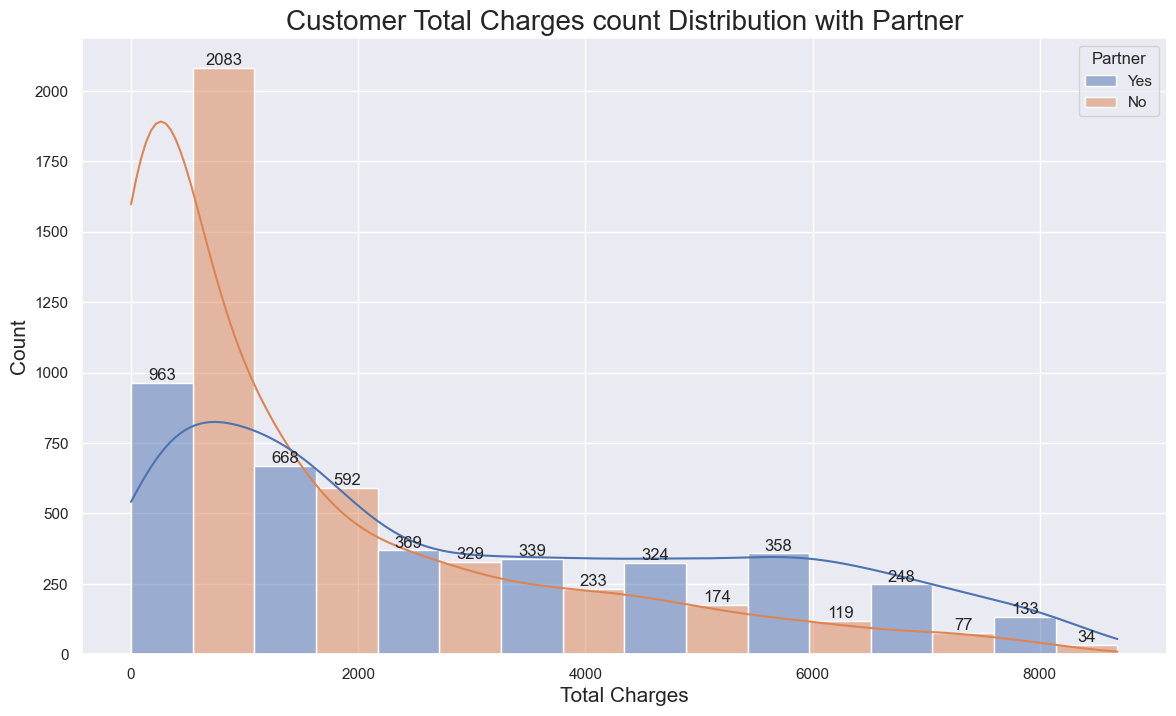

In [167]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['Partner'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Partner', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

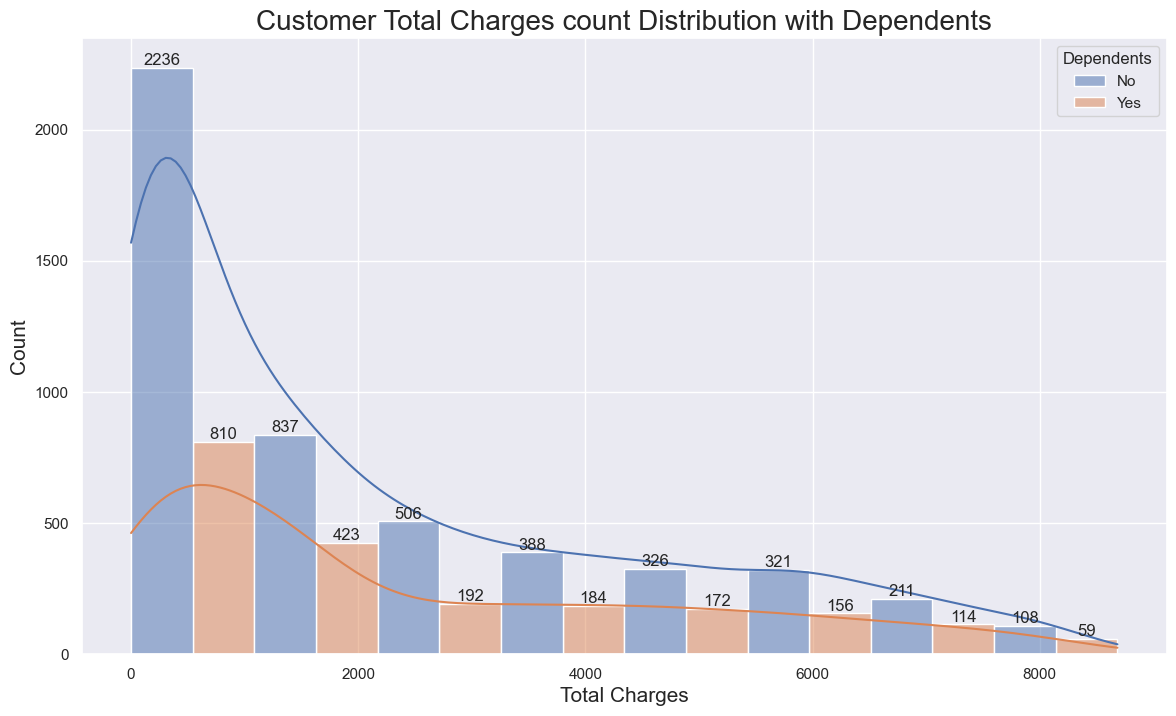

In [168]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['Dependents'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Dependents', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

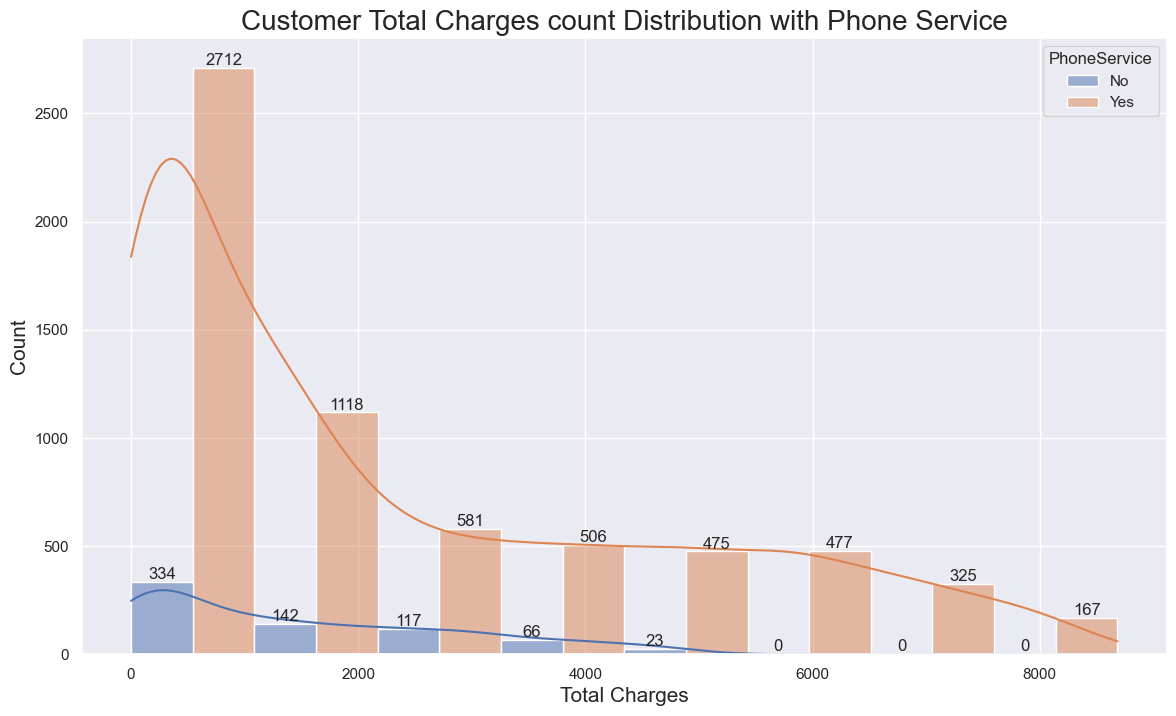

In [169]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['PhoneService'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Phone Service', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

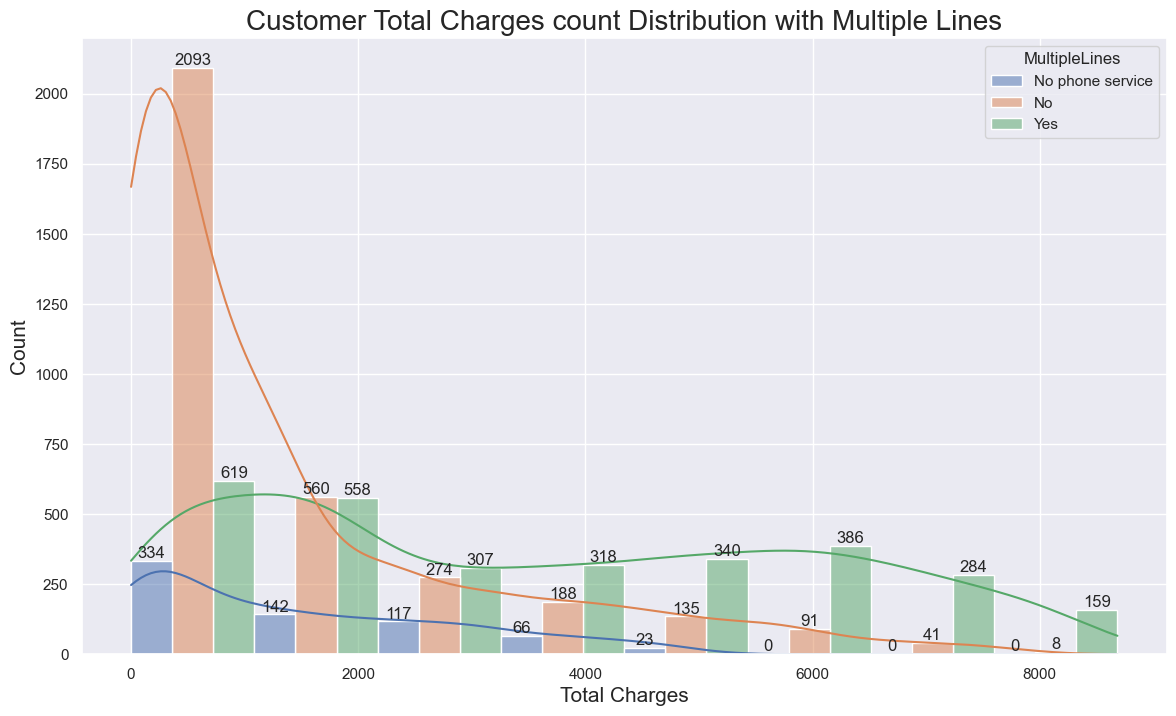

In [171]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['MultipleLines'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Multiple Lines', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

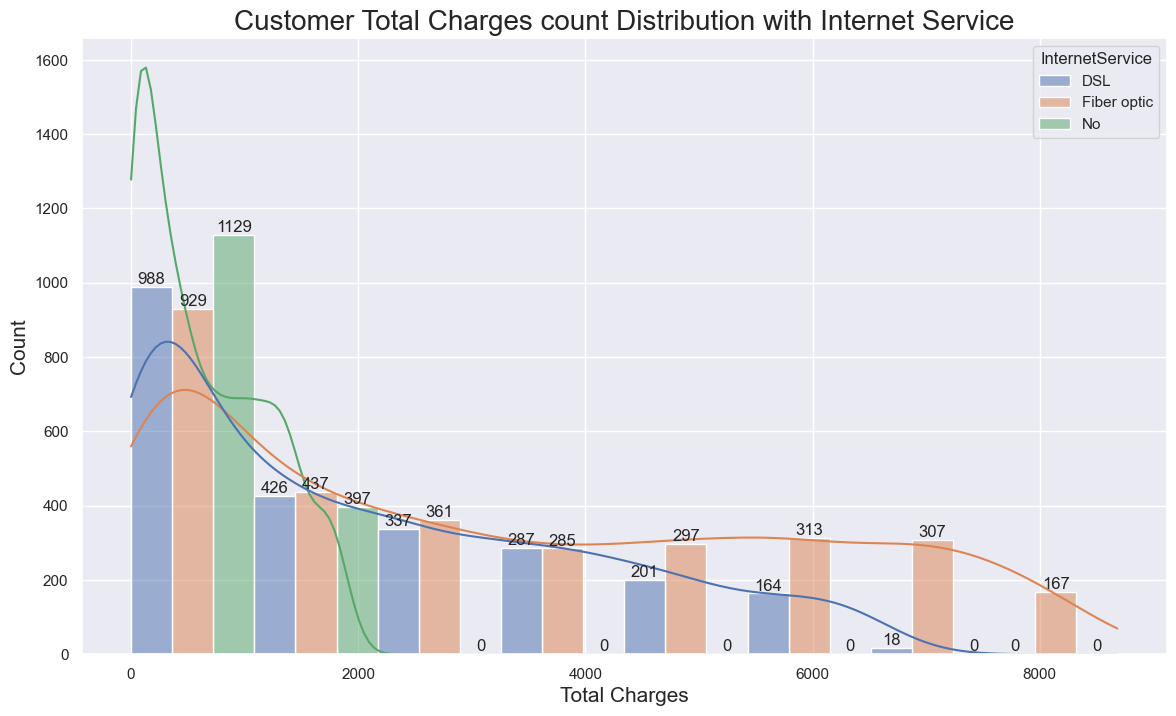

In [173]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['InternetService'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Internet Service', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

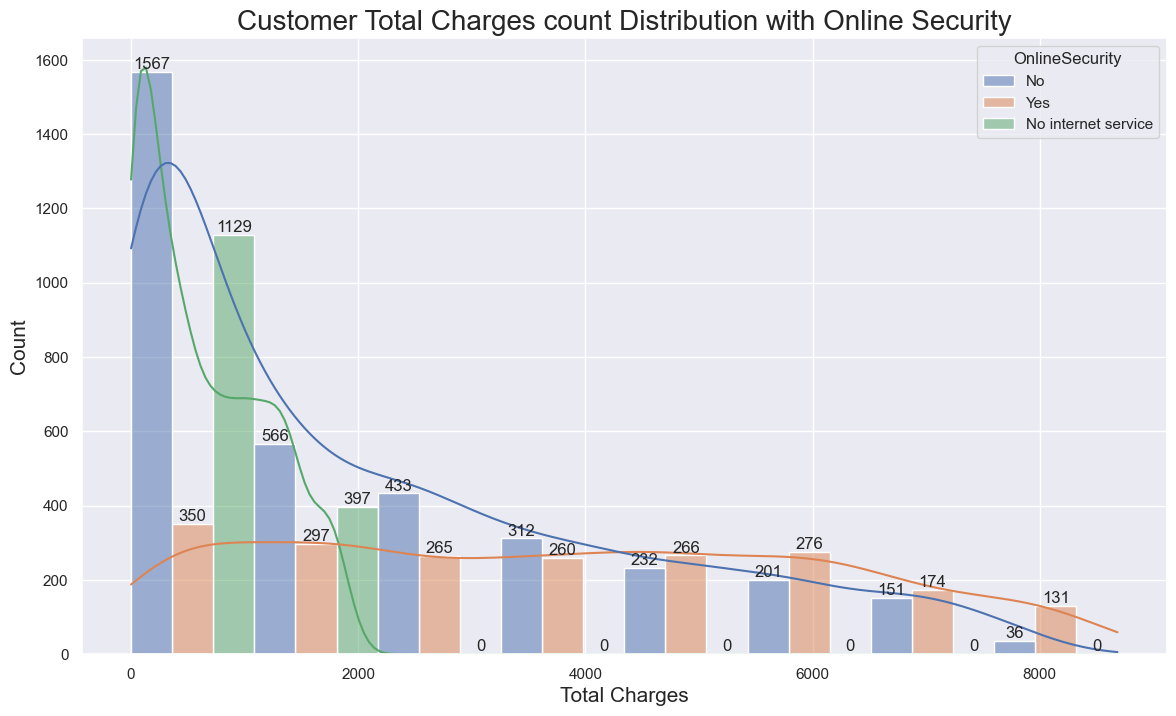

In [181]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['OnlineSecurity'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Online Security', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

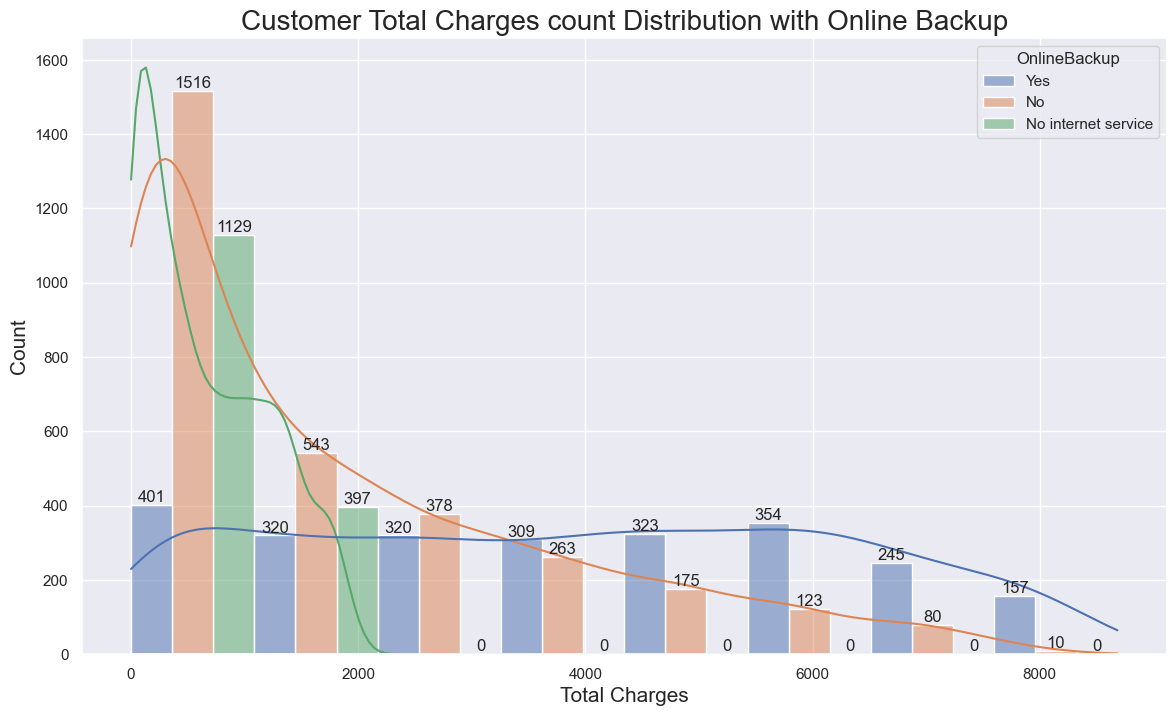

In [182]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['OnlineBackup'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Online Backup', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

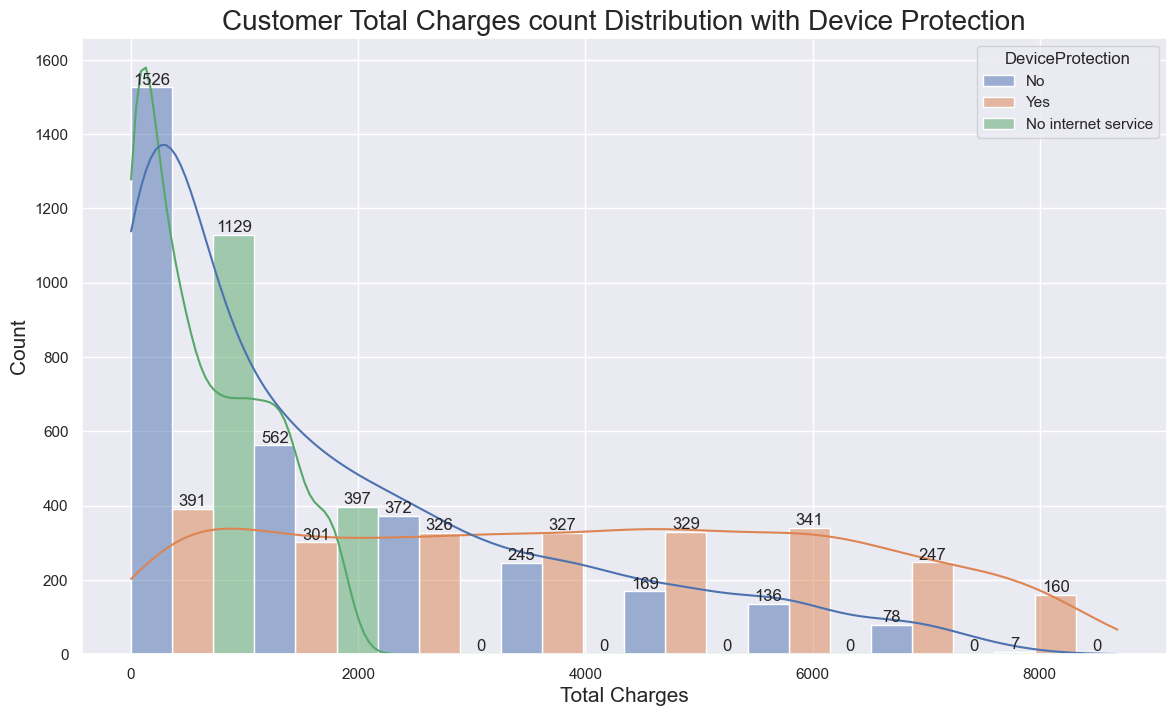

In [183]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['DeviceProtection'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Device Protection', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

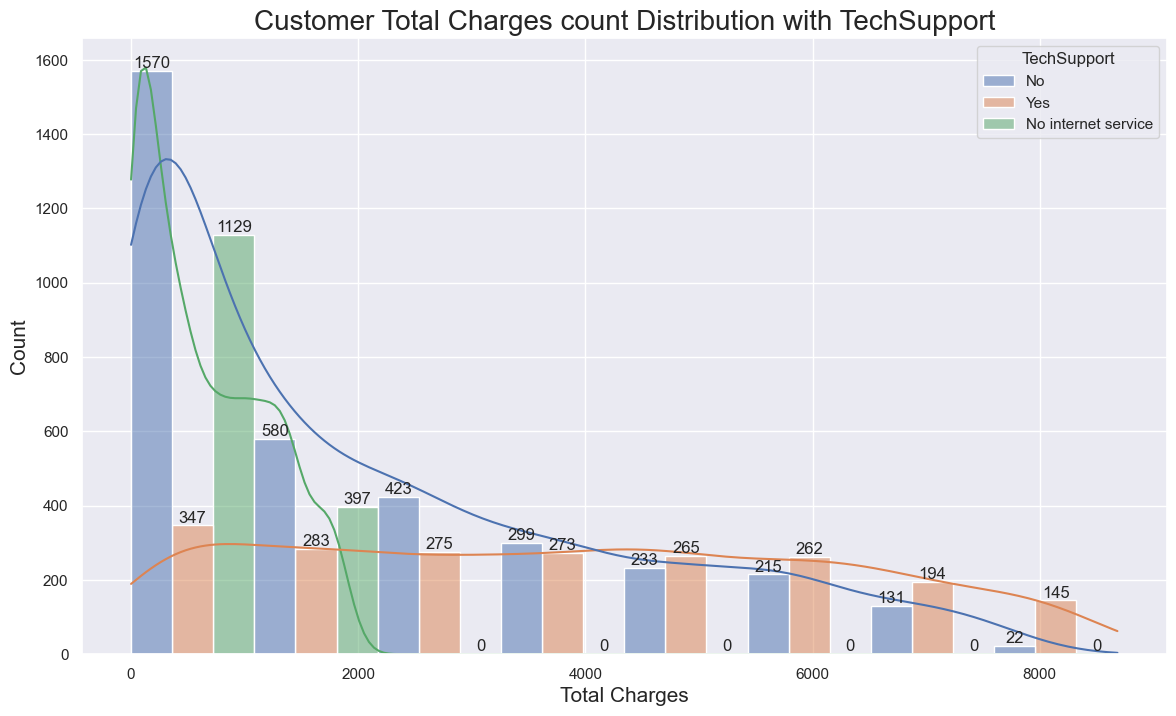

In [184]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['TechSupport'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with TechSupport', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

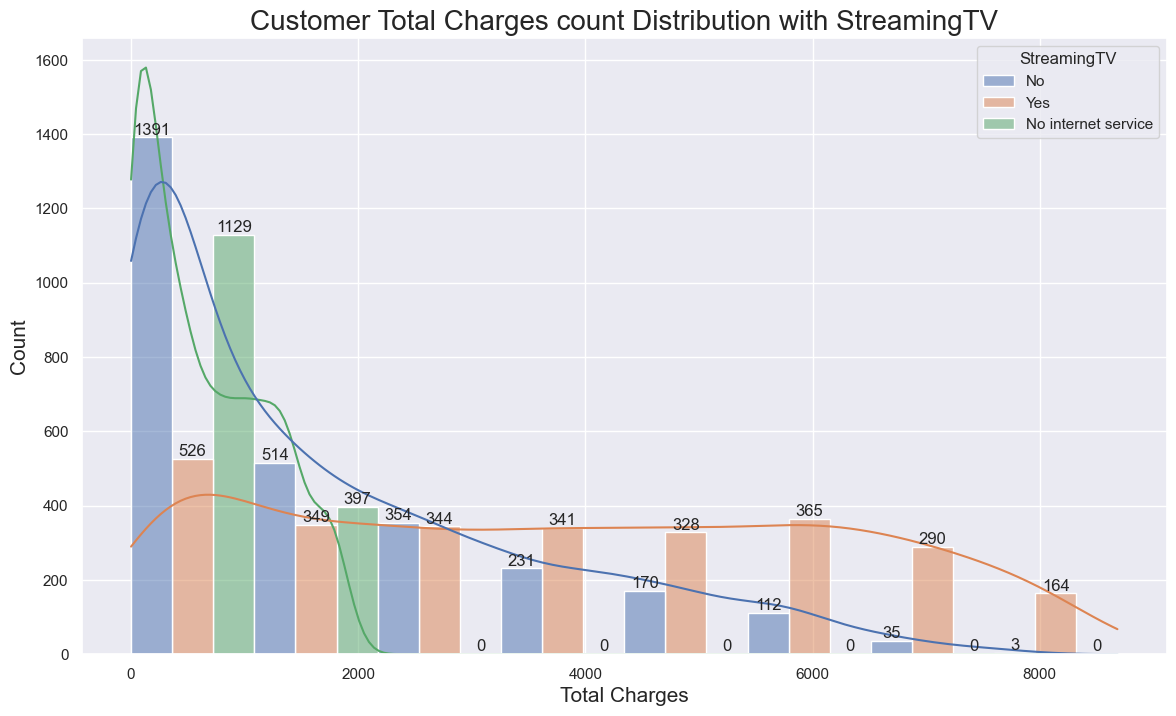

In [185]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['StreamingTV'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with StreamingTV', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

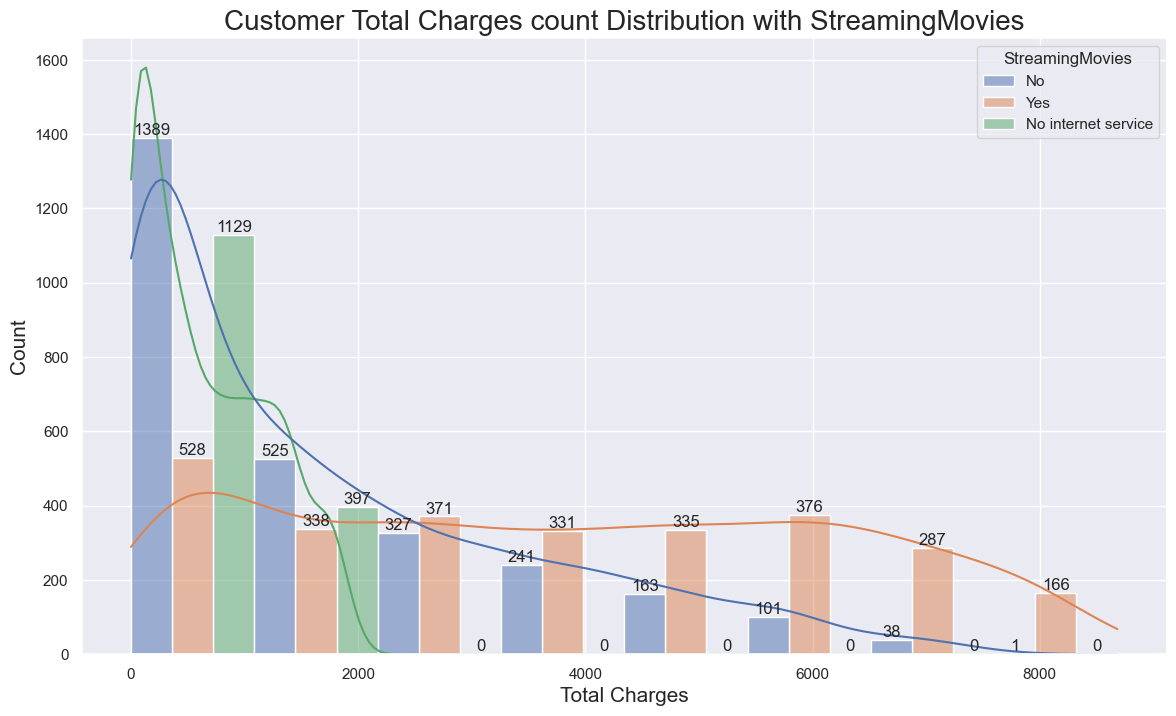

In [180]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['StreamingMovies'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with StreamingMovies', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

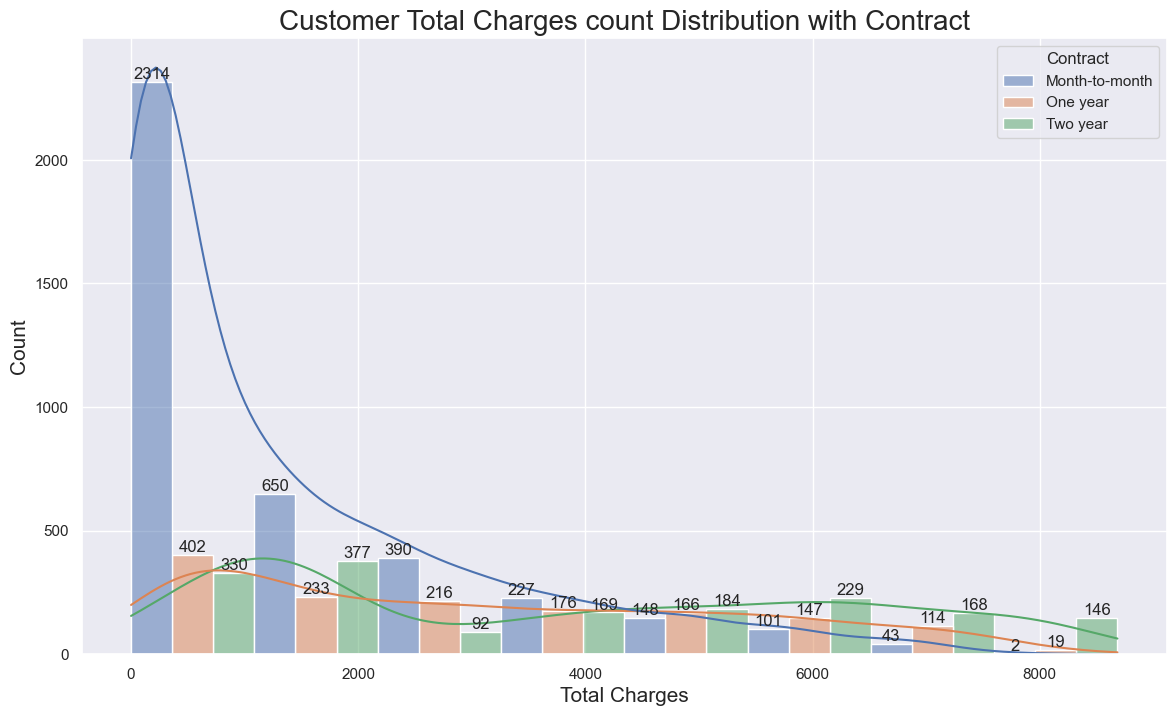

In [186]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['Contract'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Contract', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(3):
    ax.bar_label(ax.containers[i])

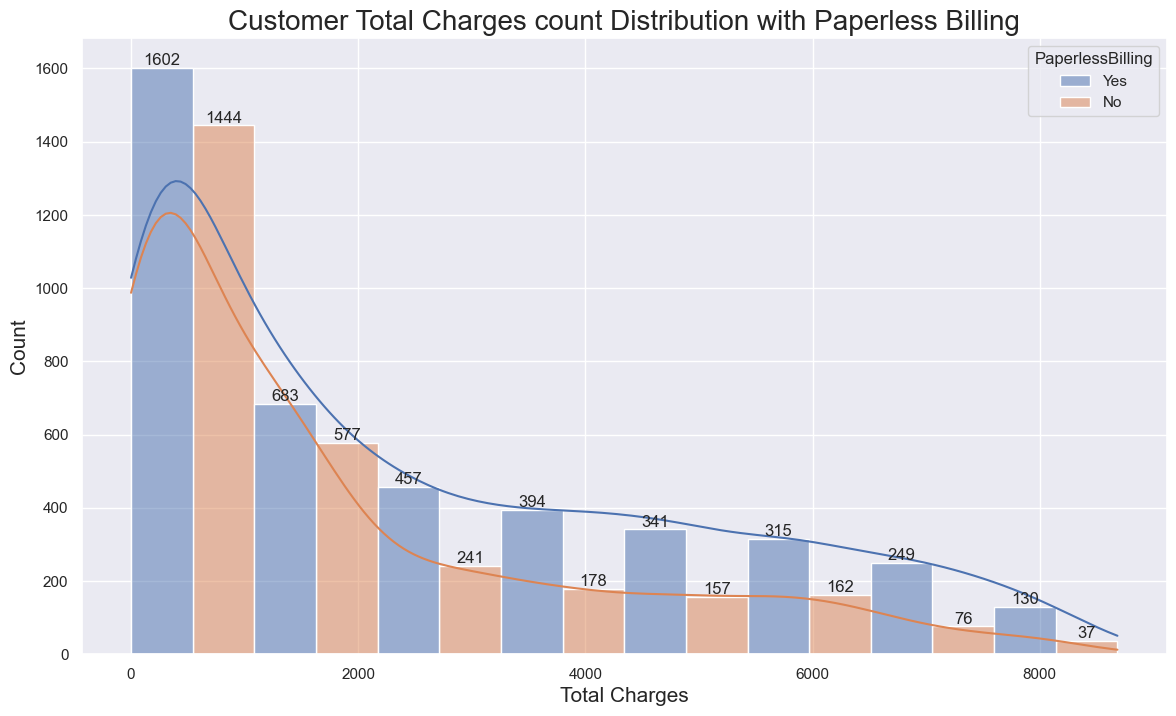

In [187]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['PaperlessBilling'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Paperless Billing', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(2):
    ax.bar_label(ax.containers[i])

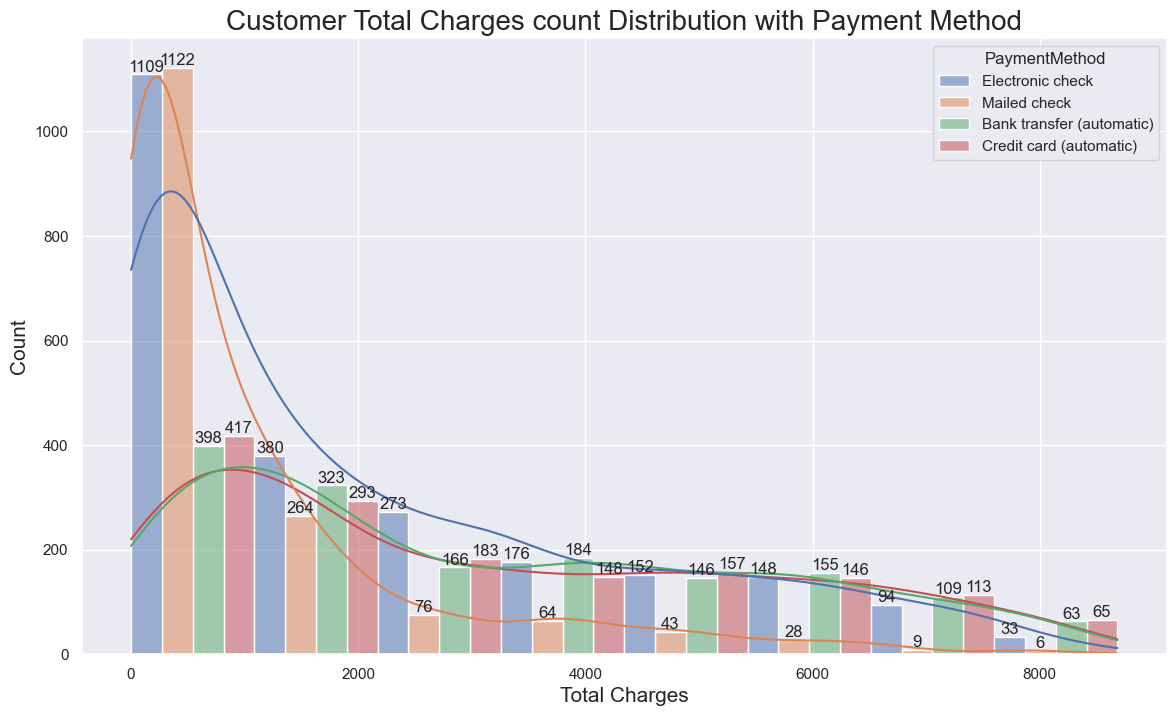

In [188]:
plt.figure(figsize = (14,8))
ax = sns.histplot(x = tcc_df['TotalCharges'], bins = 8, hue = tcc_df['PaymentMethod'], common_bins = True, multiple = 'dodge', kde = True)
plt.title('Customer Total Charges count Distribution with Payment Method', fontsize = 20)
plt.xlabel('Total Charges', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for i in range(4):
    ax.bar_label(ax.containers[i])

## Final Summarized Report for Customer Retention :


## Model Building.

In [202]:
tcc_df.drop(['customerID'], axis = 1, inplace = True)
tcc_df

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No       1           No   
1       Male            No      No         No      34          Yes   
2       Male            No      No         No       2          Yes   
3       Male            No      No         No      45           No   
4     Female            No      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male            No     Yes        Yes      24          Yes   
7039  Female            No     Yes        Yes      72          Yes   
7040  Female            No     Yes        Yes      11           No   
7041    Male           Yes     Yes         No       4          Yes   
7042    Male            No      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]

In [203]:
tcc_df['Churn'].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [205]:
tcc_df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Data Preprocessing

In [211]:
from sklearn.preprocessing import LabelEncoder
tdf = tcc_df.copy()

def obj_to_int(series_df):
    if series_df.dtypes == 'object':
        series_df = LabelEncoder().fit_transform(series_df)
    return series_df
    
tdf = tdf.apply(lambda x: obj_to_int(x))
tdf

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7043 rows x 20 columns]

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [267]:
X_data = tdf.drop(['Churn'], axis = 1)
Y = tdf['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size = 0.3, 
                                                    random_state = 10, stratify = Y)

In [248]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
bg = BaggingClassifier()
gbc = GradientBoostingClassifier()
ada = AdaBoostClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb= GaussianNB()
eec = EasyEnsembleClassifier()
lg = lgb.LGBMClassifier()

In [275]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve

In [268]:
#create a generalized function to use for all ml models
for model in [dt, rf, lr, bg, gbc, ada]:
    print('======='*6)
    print('Performance of the ', model)
    print('======='*6)
    abc = model.fit(X_train, Y_train)
    y_pred = abc.predict(X_test)
    con_mat = confusion_matrix(Y_test, y_pred)
    acc_score = accuracy_score(Y_test, y_pred)
    cl_report = classification_report(Y_test, y_pred)
    pr = precision_recall_fscore_support(Y_test, y_pred)
    roc = roc_auc_score(Y_test, y_pred)
    
    #printing the above evaluations
    print('Confusion Matrix \n', con_mat)
    print('==========')
    print('Accuracy score \n', acc_score)
    print('==========')
    print('Classification Report \n', cl_report)
    print('==========')
    print('Precision Recall F1 score \n', pr)
    print('==========')
    print('ROC value \n', roc)
    

Performance of the  DecisionTreeClassifier()
Confusion Matrix 
 [[1247  305]
 [ 289  272]]
Accuracy score 
 0.7188831045906294
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1552
           1       0.47      0.48      0.48       561

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113

Precision Recall F1 score 
 (array([0.81184896, 0.47140381]), array([0.80347938, 0.48484848]), array([0.80764249, 0.47803163]), array([1552,  561], dtype=int64))
ROC value 
 0.6441639331458919
Performance of the  RandomForestClassifier()
Confusion Matrix 
 [[1398  154]
 [ 287  274]]
Accuracy score 
 0.791292001893043
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.64      0.49      0.55       561

    accuracy   

In [269]:
#create a generalized function to use for all ml models
for model in [svc, knn, nb, eec, lg]:
    print('======='*6)
    print('Performance of the ', model)
    print('======='*6)
    abc = model.fit(X_train, Y_train)
    y_pred = abc.predict(X_test)
    con_mat = confusion_matrix(Y_test, y_pred)
    acc_score = accuracy_score(Y_test, y_pred)
    cl_report = classification_report(Y_test, y_pred)
    pr = precision_recall_fscore_support(Y_test, y_pred)
    roc = roc_auc_score(Y_test, y_pred)
    
    #printing the above evaluations
    print('Confusion Matrix \n', con_mat)
    print('==========')
    print('Accuracy score \n', acc_score)
    print('==========')
    print('Classification Report \n', cl_report)
    print('==========')
    print('Precision Recall F1 score \n', pr)
    print('==========')
    print('ROC value \n', roc)
    

Performance of the  SVC()
Confusion Matrix 
 [[1552    0]
 [ 561    0]]
Accuracy score 
 0.73450070989115
Classification Report 
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Precision Recall F1 score 
 (array([0.73450071, 0.        ]), array([1., 0.]), array([0.84693042, 0.        ]), array([1552,  561], dtype=int64))
ROC value 
 0.5
Performance of the  KNeighborsClassifier()
Confusion Matrix 
 [[1365  187]
 [ 302  259]]
Accuracy score 
 0.7685754850922859
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1552
           1       0.58      0.46      0.51       561

    accuracy                           0.77      2113
   macro avg  

## Models that perform well with highest recall values are:
- EasyEnsembleClassifier()
- GaussianNB()

- Highest accuracy: AdaBoostClassifier() and GradientBoostingClassifier()


In [270]:
##  ------------------best model-----------------------
for model in [eec]:
    print('======='*6)
    print('Performance of the ', model)
    print('======='*6)
    abc = model.fit(X_train, Y_train)
    y_pred = abc.predict(X_test)
    con_mat = confusion_matrix(Y_test, y_pred)
    acc_score = accuracy_score(Y_test, y_pred)
    cl_report = classification_report(Y_test, y_pred)
    pr = precision_recall_fscore_support(Y_test, y_pred)
    roc = roc_auc_score(Y_test, y_pred)
    
    #printing the above evaluations
    print('Confusion Matrix \n', con_mat)
    print('==========')
    print('Accuracy score \n', acc_score)
    print('==========')
    print('Classification Report \n', cl_report)
    print('==========')
    print('Precision Recall F1 score \n', pr)
    print('==========')
    print('ROC value \n', roc)

Performance of the  EasyEnsembleClassifier()
Confusion Matrix 
 [[1118  434]
 [ 108  453]]
Accuracy score 
 0.7434926644581165
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.81      0.63       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.74      0.76      2113

Precision Recall F1 score 
 (array([0.91190865, 0.51071026]), array([0.72036082, 0.80748663]), array([0.80489561, 0.62569061]), array([1552,  561], dtype=int64))
ROC value 
 0.7639237278791554


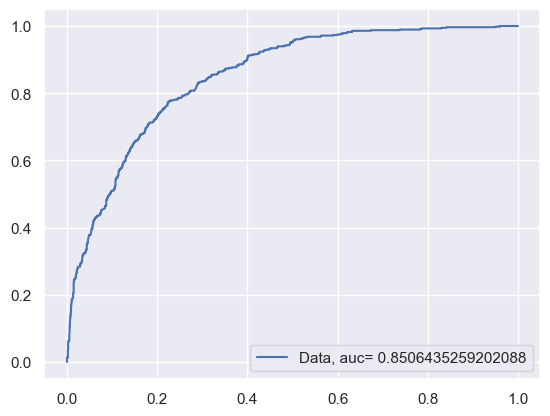

In [277]:
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr, tpr, label = 'Data, auc= ' + str(auc))
plt.legend(loc = 4)
plt.show()